In [14]:
import dlib
import cv2
import numpy as np

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [16]:
import argparse
import time

In [18]:
faceDetector = dlib.get_frontal_face_detector()
cnn_face_detector = dlib.cnn_face_detection_model_v1('C:/Users/USEUNG/Desktop/2020_kerc/mmod_human_face_detector.dat')

## <font color=yellow> Data Load </font>

In [46]:
img_dir = 'C:/Users/USEUNG/Desktop/DeepFakeCompetitions/test/leaderboard/image_00331.jpg'
img = cv2.imread(img_dir)

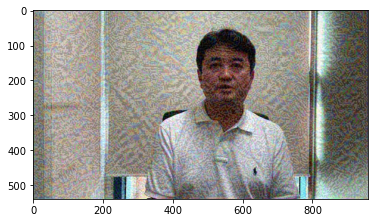

In [47]:
plt.imshow(img[:,:,::-1])
plt.show()

## <font style="color:rgb(50,120,229)">Detect landmarks for each face</font>

In [50]:
# Detect faces in the image
faceRects = faceDetector(img, 0)
faces_cnn = cnn_face_detector(img, 1)
print("Number of faces detected: ",len(faces_cnn))

Number of faces detected:  1


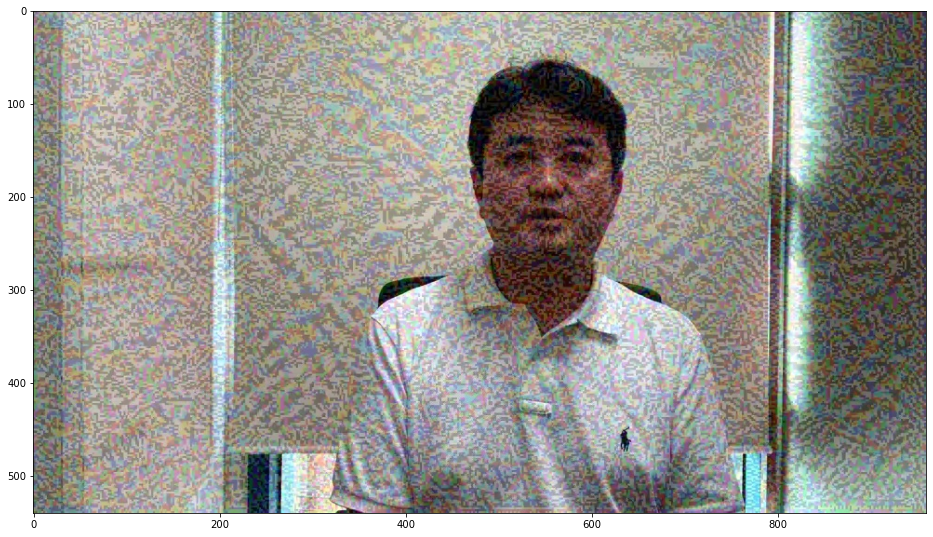

In [51]:
for i in range(0, len(faceRects)):
    # draw rect on detected face
    x1 = faceRects[i].left()
    y1 = faceRects[i].top()
    x2 = faceRects[i].right()
    y2 = faceRects[i].bottom()
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
    cropped = img[y1-35:y2+35, x1-35:x2+35]
    print('face {} : ({},{})-({},{})'.format(i, x1, y1, x2, y2))

plt.figure(figsize=(16, 16))
plt.imshow(img[:,:,::-1])

face 0 : (473,102)-(614,244)


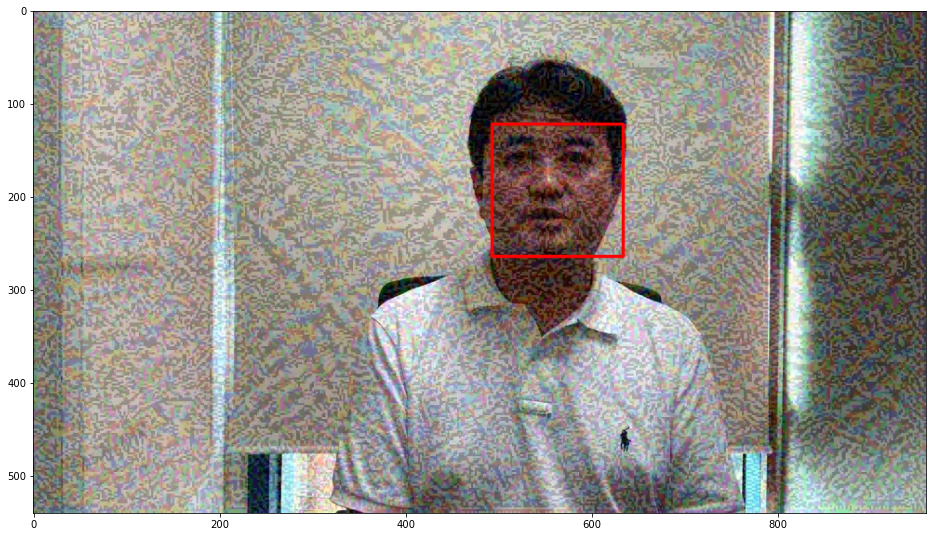

In [52]:
for i, d in enumerate(faces_cnn):
    x1, y1 = d.rect.left(), d.rect.top()
    x2, y2 = d.rect.right(), d.rect.bottom()

    cv2.rectangle(img, pt1=(x1+20, y1+20), pt2=(x2+20, y2+20), thickness=2, color=(0,0,255), lineType=cv2.LINE_AA)
    cropped = img[y1+20:y2+20, x1+20:x2+20]
    print('face {} : ({},{})-({},{})'.format(i, x1, y1, x2, y2))

plt.figure(figsize=(16, 16))
plt.imshow(img[:,:,::-1])

In [ ]:
cropped = cv2.resize(cropped, (256,256))
plt.imshow(cropped[:,:,::-1])
plt.show()

# Final Code

In [6]:
import glob
fname = glob.glob('C:/Users/USEUNG/Desktop/DeepFakeCompetitions/deepfake_1st/deepfake_1st/fake/**/*.*', recursive=True)

In [7]:
fname

['C:/Users/USEUNG/Desktop/DeepFakeCompetitions/deepfake_1st/deepfake_1st/fake\\CW\\20200819\\cw-jungyun\\dffs\\output_cw-jungyun_001_1\\image_00001.jpg',
 'C:/Users/USEUNG/Desktop/DeepFakeCompetitions/deepfake_1st/deepfake_1st/fake\\CW\\20200819\\cw-jungyun\\dffs\\output_cw-jungyun_001_1\\image_00002.jpg',
 'C:/Users/USEUNG/Desktop/DeepFakeCompetitions/deepfake_1st/deepfake_1st/fake\\CW\\20200819\\cw-jungyun\\dffs\\output_cw-jungyun_001_1\\image_00003.jpg',
 'C:/Users/USEUNG/Desktop/DeepFakeCompetitions/deepfake_1st/deepfake_1st/fake\\CW\\20200819\\cw-jungyun\\dffs\\output_cw-jungyun_001_1\\image_00004.jpg',
 'C:/Users/USEUNG/Desktop/DeepFakeCompetitions/deepfake_1st/deepfake_1st/fake\\CW\\20200819\\cw-jungyun\\dffs\\output_cw-jungyun_001_1\\image_00005.jpg',
 'C:/Users/USEUNG/Desktop/DeepFakeCompetitions/deepfake_1st/deepfake_1st/fake\\CW\\20200819\\cw-jungyun\\dffs\\output_cw-jungyun_001_1\\image_00006.jpg',
 'C:/Users/USEUNG/Desktop/DeepFakeCompetitions/deepfake_1st/deepfake_1st/fak

In [8]:
len(fname)

779825

In [9]:
fname[0]

'C:/Users/USEUNG/Desktop/DeepFakeCompetitions/deepfake_1st/deepfake_1st/fake\\CW\\20200819\\cw-jungyun\\dffs\\output_cw-jungyun_001_1\\image_00001.jpg'

In [12]:
import os
print(fname[0].split(os.path.sep))
a = fname[0].split(os.path.sep)
print(a[1])

['C:/Users/USEUNG/Desktop/DeepFakeCompetitions/deepfake_1st/deepfake_1st/fake', 'CW', '20200819', 'cw-jungyun', 'dffs', 'output_cw-jungyun_001_1', 'image_00001.jpg']
CW


In [19]:
save_path = "C:/Users/USEUNG/Desktop/DeepFakeCompetitions/train_fake_10per/"
save_name = "skill"
count = 1
idx = 1

for i in fname:
    global save_name
    global count
    idx += 1
    if(idx % 20 ==0):
        img = cv2.imread(i)
        n = i.split(os.path.sep)
        faces_cnn = cnn_face_detector(img, 1)


        if(n[4] != save_name):
            save_name = n[4]
            count = 1

        if(len(faces_cnn) == 1):
            for i, d in enumerate(faces_cnn):
                x1, y1 = d.rect.left(), d.rect.top()
                x2, y2 = d.rect.right(), d.rect.bottom()

                #cv2.rectangle(img, pt1=(x1-20, y1+20), pt2=(x2-20, y2+20), thickness=2, color=(0,0,0), lineType=cv2.LINE_AA)
                cropped = img[y1-35:y2+35, x1-35:x2+35]
                try:
                    cropped = cv2.resize(cropped, (456,456))
                    cv2.imwrite(save_path + "fake_%s_%s_%s_%05d.jpg" % (n[1], n[3], n[4], count), cropped)
                    print("Saved face_fake_%s_%s_%s_%05d.jpg" % (n[1], n[3], n[4], count))
                    count += 1
                except Exception as e:
                    print(str(e))


        else:
            height, width, channel = img.shape
            matrix = cv2.getRotationMatrix2D((width/2, height/2), 180, 1)
            img = cv2.warpAffine(img, matrix, (width, height))
            faces_cnn = cnn_face_detector(img, 1)
            if(len(faces_cnn) == 1):
                for i, d in enumerate(faces_cnn):
                    x1, y1 = d.rect.left(), d.rect.top()
                    x2, y2 = d.rect.right(), d.rect.bottom()

                    try:
                        cropped = img[y1-35:y2+35, x1-35:x2+35]
                        cropped = cv2.resize(cropped, (456,456))            
                        cv2.imwrite(save_path + "fake_%s_%s_%s_%05d.jpg" % (n[1], n[3], n[4], count), cropped)
                        print("Saved face_fake_%s_%s_%s_%05d.jpg" % (n[1], n[3], n[4], count))
                        count += 1
                    
                    except Exception as e:    # 모든 예외의 에러 메시지를 출력할 때는 Exception을 사용
                        print('예외가 발생했습니다.', e)
                        

print("Finish!")

Saved face_fake_CW_cw-jungyun_dffs_00001.jpg
Saved face_fake_CW_cw-jungyun_dffs_00002.jpg
Saved face_fake_CW_cw-jungyun_dffs_00003.jpg
Saved face_fake_CW_cw-jungyun_dffs_00004.jpg
Saved face_fake_CW_cw-jungyun_dffs_00005.jpg
Saved face_fake_CW_cw-jungyun_dffs_00006.jpg
Saved face_fake_CW_cw-jungyun_dffs_00007.jpg
Saved face_fake_CW_cw-jungyun_dffs_00008.jpg
Saved face_fake_CW_cw-jungyun_dffs_00009.jpg
Saved face_fake_CW_cw-jungyun_dffs_00010.jpg
Saved face_fake_CW_cw-jungyun_dffs_00011.jpg
Saved face_fake_CW_cw-jungyun_dffs_00012.jpg
Saved face_fake_CW_cw-jungyun_dffs_00013.jpg
Saved face_fake_CW_cw-jungyun_dffs_00014.jpg
Saved face_fake_CW_cw-jungyun_dffs_00015.jpg
Saved face_fake_CW_cw-jungyun_dffs_00016.jpg
Saved face_fake_CW_cw-jungyun_dffs_00017.jpg
Saved face_fake_CW_cw-jungyun_dffs_00018.jpg
Saved face_fake_CW_cw-jungyun_dffs_00019.jpg
Saved face_fake_CW_cw-jungyun_dffs_00020.jpg
Saved face_fake_CW_cw-jungyun_dffs_00021.jpg
Saved face_fake_CW_cw-jungyun_dffs_00022.jpg
Saved face

Saved face_fake_CW_cw-jungyun_fo_00018.jpg
Saved face_fake_CW_cw-jungyun_fo_00019.jpg
Saved face_fake_CW_cw-jungyun_fo_00020.jpg
Saved face_fake_CW_cw-jungyun_fo_00021.jpg
Saved face_fake_CW_cw-jungyun_fo_00022.jpg
Saved face_fake_CW_cw-jungyun_fo_00023.jpg
Saved face_fake_CW_cw-jungyun_fo_00024.jpg
Saved face_fake_CW_cw-jungyun_fo_00025.jpg
Saved face_fake_CW_cw-jungyun_fo_00026.jpg
Saved face_fake_CW_cw-jungyun_fo_00027.jpg
Saved face_fake_CW_cw-jungyun_fo_00028.jpg
Saved face_fake_CW_cw-jungyun_fo_00029.jpg
Saved face_fake_CW_cw-jungyun_fo_00030.jpg
Saved face_fake_CW_cw-jungyun_fo_00031.jpg
Saved face_fake_CW_cw-jungyun_fo_00032.jpg
Saved face_fake_CW_cw-jungyun_fo_00033.jpg
Saved face_fake_CW_cw-jungyun_fo_00034.jpg
Saved face_fake_CW_cw-jungyun_fo_00035.jpg
Saved face_fake_CW_cw-jungyun_fo_00036.jpg
Saved face_fake_CW_cw-jungyun_fo_00037.jpg
Saved face_fake_CW_cw-jungyun_fo_00038.jpg
Saved face_fake_CW_cw-jungyun_fo_00039.jpg
Saved face_fake_CW_cw-jungyun_fo_00040.jpg
Saved face_

Saved face_fake_CW_cw-seungwan_dffs_00025.jpg
Saved face_fake_CW_cw-seungwan_dffs_00026.jpg
Saved face_fake_CW_cw-seungwan_dffs_00027.jpg
Saved face_fake_CW_cw-seungwan_dffs_00028.jpg
Saved face_fake_CW_cw-seungwan_dffs_00029.jpg
Saved face_fake_CW_cw-seungwan_dffs_00030.jpg
Saved face_fake_CW_cw-seungwan_dffs_00031.jpg
Saved face_fake_CW_cw-seungwan_dffs_00032.jpg
Saved face_fake_CW_cw-seungwan_dffs_00033.jpg
Saved face_fake_CW_cw-seungwan_dffs_00034.jpg
Saved face_fake_CW_cw-seungwan_dffs_00035.jpg
Saved face_fake_CW_cw-seungwan_dffs_00036.jpg
Saved face_fake_CW_cw-seungwan_dffs_00037.jpg
Saved face_fake_CW_cw-seungwan_dffs_00038.jpg
Saved face_fake_CW_cw-seungwan_dffs_00039.jpg
Saved face_fake_CW_cw-seungwan_dffs_00040.jpg
Saved face_fake_CW_cw-seungwan_dffs_00041.jpg
Saved face_fake_CW_cw-seungwan_dffs_00042.jpg
Saved face_fake_CW_cw-seungwan_dffs_00043.jpg
Saved face_fake_CW_cw-seungwan_dffs_00044.jpg
Saved face_fake_CW_cw-seungwan_dffs_00045.jpg
Saved face_fake_CW_cw-seungwan_dff

Saved face_fake_CW_cw-seungwan_fo_00033.jpg
Saved face_fake_CW_cw-seungwan_fo_00034.jpg
Saved face_fake_CW_cw-seungwan_fo_00035.jpg
Saved face_fake_CW_cw-seungwan_fo_00036.jpg
Saved face_fake_CW_cw-seungwan_fo_00037.jpg
Saved face_fake_CW_cw-seungwan_fo_00038.jpg
Saved face_fake_CW_cw-seungwan_fo_00039.jpg
Saved face_fake_CW_cw-seungwan_fo_00040.jpg
Saved face_fake_CW_cw-seungwan_fo_00041.jpg
Saved face_fake_CW_cw-seungwan_fo_00042.jpg
Saved face_fake_CW_cw-seungwan_fo_00043.jpg
Saved face_fake_CW_cw-seungwan_fo_00044.jpg
Saved face_fake_CW_cw-seungwan_fo_00045.jpg
Saved face_fake_CW_cw-seungwan_fo_00046.jpg
Saved face_fake_CW_cw-seungwan_fo_00047.jpg
Saved face_fake_CW_cw-seungwan_fo_00048.jpg
Saved face_fake_CW_cw-seungwan_fo_00049.jpg
Saved face_fake_CW_cw-seungwan_fo_00050.jpg
Saved face_fake_CW_cw-seungwan_fo_00051.jpg
Saved face_fake_CW_cw-seungwan_fo_00052.jpg
Saved face_fake_CW_cw-seungwan_fo_00053.jpg
Saved face_fake_CW_cw-seungwan_fo_00054.jpg
Saved face_fake_CW_cw-seungwan_f

Saved face_fake_CW_cw-seongu_dffs_00029.jpg
Saved face_fake_CW_cw-seongu_dffs_00030.jpg
Saved face_fake_CW_cw-seongu_dffs_00031.jpg
Saved face_fake_CW_cw-seongu_dffs_00032.jpg
Saved face_fake_CW_cw-seongu_dffs_00033.jpg
Saved face_fake_CW_cw-seongu_dffs_00034.jpg
Saved face_fake_CW_cw-seongu_dffs_00035.jpg
Saved face_fake_CW_cw-seongu_dffs_00036.jpg
Saved face_fake_CW_cw-seongu_dffs_00037.jpg
Saved face_fake_CW_cw-seongu_dffs_00038.jpg
Saved face_fake_CW_cw-seongu_dffs_00039.jpg
Saved face_fake_CW_cw-seongu_dffs_00040.jpg
Saved face_fake_CW_cw-seongu_dffs_00041.jpg
Saved face_fake_CW_cw-seongu_dffs_00042.jpg
Saved face_fake_CW_cw-seongu_dffs_00043.jpg
Saved face_fake_CW_cw-seongu_dffs_00044.jpg
Saved face_fake_CW_cw-seongu_dffs_00045.jpg
Saved face_fake_CW_cw-seongu_dffs_00046.jpg
Saved face_fake_CW_cw-seongu_dffs_00047.jpg
Saved face_fake_CW_cw-seongu_dffs_00048.jpg
Saved face_fake_CW_cw-seongu_dffs_00049.jpg
Saved face_fake_CW_cw-seongu_dffs_00050.jpg
Saved face_fake_CW_cw-seongu_dff

Saved face_fake_CW_cw-seongu_fo_00047.jpg
Saved face_fake_CW_cw-seongu_fo_00048.jpg
Saved face_fake_CW_cw-seongu_fo_00049.jpg
Saved face_fake_CW_cw-seongu_fo_00050.jpg
Saved face_fake_CW_cw-seongu_fo_00051.jpg
Saved face_fake_CW_cw-seongu_fo_00052.jpg
Saved face_fake_CW_cw-seongu_fo_00053.jpg
Saved face_fake_CW_cw-seongu_fo_00054.jpg
Saved face_fake_CW_cw-seongu_fo_00055.jpg
Saved face_fake_CW_cw-seongu_fo_00056.jpg
Saved face_fake_CW_cw-seongu_fo_00057.jpg
Saved face_fake_CW_cw-seongu_fo_00058.jpg
Saved face_fake_CW_cw-seongu_fo_00059.jpg
Saved face_fake_CW_cw-seongu_fo_00060.jpg
Saved face_fake_CW_cw-seongu_fo_00061.jpg
Saved face_fake_CW_cw-seongu_fo_00062.jpg
Saved face_fake_CW_cw-seongu_fo_00063.jpg
Saved face_fake_CW_cw-seongu_fo_00064.jpg
Saved face_fake_CW_cw-seongu_fo_00065.jpg
Saved face_fake_CW_cw-seongu_fo_00066.jpg
Saved face_fake_CW_cw-seongu_fo_00067.jpg
Saved face_fake_CW_cw-seongu_fo_00068.jpg
Saved face_fake_CW_cw-seongu_fo_00069.jpg
Saved face_fake_CW_cw-seongu_fo_00

Saved face_fake_CW_cw-yuunjin_dffs_00047.jpg
Saved face_fake_CW_cw-yuunjin_dffs_00048.jpg
Saved face_fake_CW_cw-yuunjin_dffs_00049.jpg
Saved face_fake_CW_cw-yuunjin_dffs_00050.jpg
Saved face_fake_CW_cw-yuunjin_dffs_00051.jpg
Saved face_fake_CW_cw-yuunjin_dffs_00052.jpg
Saved face_fake_CW_cw-yuunjin_dffs_00053.jpg
Saved face_fake_CW_cw-yuunjin_dffs_00054.jpg
Saved face_fake_CW_cw-yuunjin_dffs_00055.jpg
Saved face_fake_CW_cw-yuunjin_dffs_00056.jpg
Saved face_fake_CW_cw-yuunjin_dffs_00057.jpg
Saved face_fake_CW_cw-yuunjin_dffs_00058.jpg
Saved face_fake_CW_cw-yuunjin_dffs_00059.jpg
Saved face_fake_CW_cw-yuunjin_dffs_00060.jpg
Saved face_fake_CW_cw-yuunjin_dffs_00061.jpg
Saved face_fake_CW_cw-yuunjin_dffs_00062.jpg
Saved face_fake_CW_cw-yuunjin_dffs_00063.jpg
Saved face_fake_CW_cw-yuunjin_dffs_00064.jpg
Saved face_fake_CW_cw-yuunjin_dffs_00065.jpg
Saved face_fake_CW_cw-yuunjin_dffs_00066.jpg
Saved face_fake_CW_cw-yuunjin_dffs_00067.jpg
Saved face_fake_CW_cw-yuunjin_dffs_00068.jpg
Saved face

Saved face_fake_CW_cw-yuunjin_fo_00063.jpg
Saved face_fake_CW_cw-yuunjin_fo_00064.jpg
Saved face_fake_CW_cw-yuunjin_fo_00065.jpg
Saved face_fake_CW_cw-yuunjin_fo_00066.jpg
Saved face_fake_CW_cw-yuunjin_fo_00067.jpg
Saved face_fake_CW_cw-yuunjin_fo_00068.jpg
Saved face_fake_CW_cw-yuunjin_fo_00069.jpg
Saved face_fake_CW_cw-yuunjin_fo_00070.jpg
Saved face_fake_CW_cw-yuunjin_fo_00071.jpg
Saved face_fake_CW_cw-yuunjin_fo_00072.jpg
Saved face_fake_CW_cw-yuunjin_fo_00073.jpg
Saved face_fake_CW_cw-yuunjin_fo_00074.jpg
Saved face_fake_CW_cw-yuunjin_fo_00075.jpg
Saved face_fake_CW_cw-yuunjin_fo_00076.jpg
Saved face_fake_CW_cw-yuunjin_fo_00077.jpg
Saved face_fake_CW_cw-yuunjin_fo_00078.jpg
Saved face_fake_CW_cw-yuunjin_fo_00079.jpg
Saved face_fake_CW_cw-yuunjin_fo_00080.jpg
Saved face_fake_CW_cw-yuunjin_fo_00081.jpg
Saved face_fake_CW_cw-yuunjin_fo_00082.jpg
Saved face_fake_CW_cw-yuunjin_fsgan_00001.jpg
Saved face_fake_CW_cw-yuunjin_fsgan_00002.jpg
Saved face_fake_CW_cw-yuunjin_fsgan_00003.jpg
Sa

Saved face_fake_CW_cw-chuuweol_dffs_00001.jpg
Saved face_fake_CW_cw-chuuweol_dffs_00002.jpg
Saved face_fake_CW_cw-chuuweol_dffs_00003.jpg
Saved face_fake_CW_cw-chuuweol_dffs_00004.jpg
Saved face_fake_CW_cw-chuuweol_dffs_00005.jpg
Saved face_fake_CW_cw-chuuweol_dffs_00006.jpg
Saved face_fake_CW_cw-chuuweol_dffs_00007.jpg
Saved face_fake_CW_cw-chuuweol_dffs_00008.jpg
Saved face_fake_CW_cw-chuuweol_dffs_00009.jpg
Saved face_fake_CW_cw-chuuweol_dffs_00010.jpg
Saved face_fake_CW_cw-chuuweol_dffs_00011.jpg
Saved face_fake_CW_cw-chuuweol_dffs_00012.jpg
Saved face_fake_CW_cw-chuuweol_dffs_00013.jpg
Saved face_fake_CW_cw-chuuweol_dffs_00014.jpg
Saved face_fake_CW_cw-chuuweol_dffs_00015.jpg
Saved face_fake_CW_cw-chuuweol_dffs_00016.jpg
Saved face_fake_CW_cw-chuuweol_dffs_00017.jpg
Saved face_fake_CW_cw-chuuweol_dffs_00018.jpg
Saved face_fake_CW_cw-chuuweol_dffs_00019.jpg
Saved face_fake_CW_cw-chuuweol_dffs_00020.jpg
Saved face_fake_CW_cw-chuuweol_dffs_00021.jpg
Saved face_fake_CW_cw-chuuweol_dff

Saved face_fake_CW_cw-chuuweol_fo_00011.jpg
Saved face_fake_CW_cw-chuuweol_fo_00012.jpg
Saved face_fake_CW_cw-chuuweol_fo_00013.jpg
Saved face_fake_CW_cw-chuuweol_fo_00014.jpg
Saved face_fake_CW_cw-chuuweol_fo_00015.jpg
Saved face_fake_CW_cw-chuuweol_fo_00016.jpg
Saved face_fake_CW_cw-chuuweol_fo_00017.jpg
Saved face_fake_CW_cw-chuuweol_fo_00018.jpg
Saved face_fake_CW_cw-chuuweol_fo_00019.jpg
Saved face_fake_CW_cw-chuuweol_fo_00020.jpg
Saved face_fake_CW_cw-chuuweol_fo_00021.jpg
Saved face_fake_CW_cw-chuuweol_fo_00022.jpg
Saved face_fake_CW_cw-chuuweol_fo_00023.jpg
Saved face_fake_CW_cw-chuuweol_fo_00024.jpg
Saved face_fake_CW_cw-chuuweol_fo_00025.jpg
Saved face_fake_CW_cw-chuuweol_fo_00026.jpg
Saved face_fake_CW_cw-chuuweol_fo_00027.jpg
Saved face_fake_CW_cw-chuuweol_fo_00028.jpg
Saved face_fake_CW_cw-chuuweol_fo_00029.jpg
Saved face_fake_CW_cw-chuuweol_fo_00030.jpg
Saved face_fake_CW_cw-chuuweol_fo_00031.jpg
Saved face_fake_CW_cw-chuuweol_fo_00032.jpg
Saved face_fake_CW_cw-chuuweol_f

Saved face_fake_CW_cw-ahnji_3dmem_00036.jpg
Saved face_fake_CW_cw-ahnji_3dmem_00037.jpg
Saved face_fake_CW_cw-ahnji_3dmem_00038.jpg
Saved face_fake_CW_cw-ahnji_3dmem_00039.jpg
Saved face_fake_CW_cw-ahnji_3dmem_00040.jpg
Saved face_fake_CW_cw-ahnji_3dmem_00041.jpg
Saved face_fake_CW_cw-ahnji_3dmem_00042.jpg
Saved face_fake_CW_cw-ahnji_3dmem_00043.jpg
Saved face_fake_CW_cw-ahnji_3dmem_00044.jpg
Saved face_fake_CW_cw-ahnji_3dmem_00045.jpg
Saved face_fake_CW_cw-ahnji_3dmem_00046.jpg
Saved face_fake_CW_cw-ahnji_3dmem_00047.jpg
Saved face_fake_CW_cw-ahnji_3dmem_00048.jpg
Saved face_fake_CW_cw-ahnji_3dmem_00049.jpg
Saved face_fake_CW_cw-ahnji_3dmem_00050.jpg
Saved face_fake_CW_cw-ahnji_3dmem_00051.jpg
Saved face_fake_CW_cw-ahnji_3dmem_00052.jpg
Saved face_fake_CW_cw-ahnji_3dmem_00053.jpg
Saved face_fake_CW_cw-ahnji_3dmem_00054.jpg
Saved face_fake_CW_cw-ahnji_3dmem_00055.jpg
Saved face_fake_CW_cw-ahnji_3dmem_00056.jpg
Saved face_fake_CW_cw-ahnji_3dmem_00057.jpg
Saved face_fake_CW_cw-ahnji_3dme

Saved face_fake_CW_cw-ahnji_dfl_00084.jpg
Saved face_fake_CW_cw-ahnji_dfl_00085.jpg
Saved face_fake_CW_cw-ahnji_dfl_00086.jpg
Saved face_fake_CW_cw-ahnji_dfl_00087.jpg
Saved face_fake_CW_cw-ahnji_fo_00001.jpg
Saved face_fake_CW_cw-ahnji_fo_00002.jpg
Saved face_fake_CW_cw-ahnji_fo_00003.jpg
Saved face_fake_CW_cw-ahnji_fo_00004.jpg
Saved face_fake_CW_cw-ahnji_fo_00005.jpg
Saved face_fake_CW_cw-ahnji_fo_00006.jpg
Saved face_fake_CW_cw-ahnji_fo_00007.jpg
Saved face_fake_CW_cw-ahnji_fo_00008.jpg
Saved face_fake_CW_cw-ahnji_fo_00009.jpg
Saved face_fake_CW_cw-ahnji_fo_00010.jpg
Saved face_fake_CW_cw-ahnji_fo_00011.jpg
Saved face_fake_CW_cw-ahnji_fo_00012.jpg
Saved face_fake_CW_cw-ahnji_fo_00013.jpg
Saved face_fake_CW_cw-ahnji_fo_00014.jpg
Saved face_fake_CW_cw-ahnji_fo_00015.jpg
Saved face_fake_CW_cw-ahnji_fo_00016.jpg
Saved face_fake_CW_cw-ahnji_fo_00017.jpg
Saved face_fake_CW_cw-ahnji_fo_00018.jpg
Saved face_fake_CW_cw-ahnji_fo_00019.jpg
Saved face_fake_CW_cw-ahnji_fo_00020.jpg
Saved face_f

Saved face_fake_CW_cw-esther_dffs_00033.jpg
Saved face_fake_CW_cw-esther_dffs_00034.jpg
Saved face_fake_CW_cw-esther_dffs_00035.jpg
Saved face_fake_CW_cw-esther_dffs_00036.jpg
Saved face_fake_CW_cw-esther_dffs_00037.jpg
Saved face_fake_CW_cw-esther_dffs_00038.jpg
Saved face_fake_CW_cw-esther_dffs_00039.jpg
Saved face_fake_CW_cw-esther_dffs_00040.jpg
Saved face_fake_CW_cw-esther_dffs_00041.jpg
Saved face_fake_CW_cw-esther_dffs_00042.jpg
Saved face_fake_CW_cw-esther_dffs_00043.jpg
Saved face_fake_CW_cw-esther_dffs_00044.jpg
Saved face_fake_CW_cw-esther_dffs_00045.jpg
Saved face_fake_CW_cw-esther_dffs_00046.jpg
Saved face_fake_CW_cw-esther_dffs_00047.jpg
Saved face_fake_CW_cw-esther_dffs_00048.jpg
Saved face_fake_CW_cw-esther_dffs_00049.jpg
Saved face_fake_CW_cw-esther_dffs_00050.jpg
Saved face_fake_CW_cw-esther_dffs_00051.jpg
Saved face_fake_CW_cw-esther_dffs_00052.jpg
Saved face_fake_CW_cw-esther_dffs_00053.jpg
Saved face_fake_CW_cw-esther_dffs_00054.jpg
Saved face_fake_CW_cw-esther_dff

Saved face_fake_CW_cw-esther_fo_00056.jpg
Saved face_fake_CW_cw-esther_fo_00057.jpg
Saved face_fake_CW_cw-esther_fo_00058.jpg
Saved face_fake_CW_cw-esther_fo_00059.jpg
Saved face_fake_CW_cw-esther_fo_00060.jpg
Saved face_fake_CW_cw-esther_fo_00061.jpg
Saved face_fake_CW_cw-esther_fo_00062.jpg
Saved face_fake_CW_cw-esther_fo_00063.jpg
Saved face_fake_CW_cw-esther_fo_00064.jpg
Saved face_fake_CW_cw-esther_fo_00065.jpg
Saved face_fake_CW_cw-esther_fo_00066.jpg
Saved face_fake_CW_cw-esther_fo_00067.jpg
Saved face_fake_CW_cw-esther_fo_00068.jpg
Saved face_fake_CW_cw-esther_fo_00069.jpg
Saved face_fake_CW_cw-esther_fo_00070.jpg
Saved face_fake_CW_cw-esther_fo_00071.jpg
Saved face_fake_CW_cw-esther_fo_00072.jpg
Saved face_fake_CW_cw-esther_fo_00073.jpg
Saved face_fake_CW_cw-esther_fo_00074.jpg
Saved face_fake_CW_cw-esther_fo_00075.jpg
Saved face_fake_CW_cw-esther_fo_00076.jpg
Saved face_fake_CW_cw-esther_fo_00077.jpg
Saved face_fake_CW_cw-esther_fo_00078.jpg
Saved face_fake_CW_cw-esther_fo_00

Saved face_fake_CW_cw-gyuulim_dffs_00009.jpg
Saved face_fake_CW_cw-gyuulim_dffs_00010.jpg
Saved face_fake_CW_cw-gyuulim_dffs_00011.jpg
Saved face_fake_CW_cw-gyuulim_dffs_00012.jpg
Saved face_fake_CW_cw-gyuulim_dffs_00013.jpg
Saved face_fake_CW_cw-gyuulim_dffs_00014.jpg
Saved face_fake_CW_cw-gyuulim_dffs_00015.jpg
Saved face_fake_CW_cw-gyuulim_dffs_00016.jpg
Saved face_fake_CW_cw-gyuulim_dffs_00017.jpg
Saved face_fake_CW_cw-gyuulim_dffs_00018.jpg
Saved face_fake_CW_cw-gyuulim_dffs_00019.jpg
Saved face_fake_CW_cw-gyuulim_dffs_00020.jpg
Saved face_fake_CW_cw-gyuulim_dffs_00021.jpg
Saved face_fake_CW_cw-gyuulim_dffs_00022.jpg
Saved face_fake_CW_cw-gyuulim_dffs_00023.jpg
Saved face_fake_CW_cw-gyuulim_dffs_00024.jpg
Saved face_fake_CW_cw-gyuulim_dffs_00025.jpg
Saved face_fake_CW_cw-gyuulim_dffs_00026.jpg
Saved face_fake_CW_cw-gyuulim_dffs_00027.jpg
Saved face_fake_CW_cw-gyuulim_dffs_00028.jpg
Saved face_fake_CW_cw-gyuulim_dffs_00029.jpg
Saved face_fake_CW_cw-gyuulim_dffs_00030.jpg
Saved face

Saved face_fake_CW_cw-gyuulim_fo_00021.jpg
Saved face_fake_CW_cw-gyuulim_fo_00022.jpg
Saved face_fake_CW_cw-gyuulim_fo_00023.jpg
Saved face_fake_CW_cw-gyuulim_fo_00024.jpg
Saved face_fake_CW_cw-gyuulim_fo_00025.jpg
Saved face_fake_CW_cw-gyuulim_fo_00026.jpg
Saved face_fake_CW_cw-gyuulim_fo_00027.jpg
Saved face_fake_CW_cw-gyuulim_fo_00028.jpg
Saved face_fake_CW_cw-gyuulim_fo_00029.jpg
Saved face_fake_CW_cw-gyuulim_fo_00030.jpg
Saved face_fake_CW_cw-gyuulim_fo_00031.jpg
Saved face_fake_CW_cw-gyuulim_fo_00032.jpg
Saved face_fake_CW_cw-gyuulim_fo_00033.jpg
Saved face_fake_CW_cw-gyuulim_fo_00034.jpg
Saved face_fake_CW_cw-gyuulim_fo_00035.jpg
Saved face_fake_CW_cw-gyuulim_fo_00036.jpg
Saved face_fake_CW_cw-gyuulim_fo_00037.jpg
Saved face_fake_CW_cw-gyuulim_fo_00038.jpg
Saved face_fake_CW_cw-gyuulim_fo_00039.jpg
Saved face_fake_CW_cw-gyuulim_fo_00040.jpg
Saved face_fake_CW_cw-gyuulim_fo_00041.jpg
Saved face_fake_CW_cw-gyuulim_fo_00042.jpg
Saved face_fake_CW_cw-gyuulim_fo_00043.jpg
Saved face_

Saved face_fake_CW_cw-haeyun_3dmem_00045.jpg
Saved face_fake_CW_cw-haeyun_3dmem_00046.jpg
Saved face_fake_CW_cw-haeyun_3dmem_00047.jpg
Saved face_fake_CW_cw-haeyun_3dmem_00048.jpg
Saved face_fake_CW_cw-haeyun_3dmem_00049.jpg
Saved face_fake_CW_cw-haeyun_3dmem_00050.jpg
Saved face_fake_CW_cw-haeyun_3dmem_00051.jpg
Saved face_fake_CW_cw-haeyun_3dmem_00052.jpg
Saved face_fake_CW_cw-haeyun_3dmem_00053.jpg
Saved face_fake_CW_cw-haeyun_3dmem_00054.jpg
Saved face_fake_CW_cw-haeyun_3dmem_00055.jpg
Saved face_fake_CW_cw-haeyun_3dmem_00056.jpg
Saved face_fake_CW_cw-haeyun_3dmem_00057.jpg
Saved face_fake_CW_cw-haeyun_3dmem_00058.jpg
Saved face_fake_CW_cw-haeyun_3dmem_00059.jpg
Saved face_fake_CW_cw-haeyun_3dmem_00060.jpg
Saved face_fake_CW_cw-haeyun_3dmem_00061.jpg
Saved face_fake_CW_cw-haeyun_3dmem_00062.jpg
Saved face_fake_CW_cw-haeyun_dffs_00001.jpg
Saved face_fake_CW_cw-haeyun_dffs_00002.jpg
Saved face_fake_CW_cw-haeyun_dffs_00003.jpg
Saved face_fake_CW_cw-haeyun_dffs_00004.jpg
Saved face_fak

Saved face_fake_CW_cw-haeyun_dfl_00087.jpg
Saved face_fake_CW_cw-haeyun_dfl_00088.jpg
Saved face_fake_CW_cw-haeyun_fo_00001.jpg
Saved face_fake_CW_cw-haeyun_fo_00002.jpg
Saved face_fake_CW_cw-haeyun_fo_00003.jpg
Saved face_fake_CW_cw-haeyun_fo_00004.jpg
Saved face_fake_CW_cw-haeyun_fo_00005.jpg
Saved face_fake_CW_cw-haeyun_fo_00006.jpg
Saved face_fake_CW_cw-haeyun_fo_00007.jpg
Saved face_fake_CW_cw-haeyun_fo_00008.jpg
Saved face_fake_CW_cw-haeyun_fo_00009.jpg
Saved face_fake_CW_cw-haeyun_fo_00010.jpg
Saved face_fake_CW_cw-haeyun_fo_00011.jpg
Saved face_fake_CW_cw-haeyun_fo_00012.jpg
Saved face_fake_CW_cw-haeyun_fo_00013.jpg
Saved face_fake_CW_cw-haeyun_fo_00014.jpg
Saved face_fake_CW_cw-haeyun_fo_00015.jpg
Saved face_fake_CW_cw-haeyun_fo_00016.jpg
Saved face_fake_CW_cw-haeyun_fo_00017.jpg
Saved face_fake_CW_cw-haeyun_fo_00018.jpg
Saved face_fake_CW_cw-haeyun_fo_00019.jpg
Saved face_fake_CW_cw-haeyun_fo_00020.jpg
Saved face_fake_CW_cw-haeyun_fo_00021.jpg
Saved face_fake_CW_cw-haeyun_fo_

Saved face_fake_CW_cw-hosuk_3dmem_00025.jpg
Saved face_fake_CW_cw-hosuk_3dmem_00026.jpg
Saved face_fake_CW_cw-hosuk_3dmem_00027.jpg
Saved face_fake_CW_cw-hosuk_3dmem_00028.jpg
Saved face_fake_CW_cw-hosuk_3dmem_00029.jpg
Saved face_fake_CW_cw-hosuk_3dmem_00030.jpg
Saved face_fake_CW_cw-hosuk_3dmem_00031.jpg
Saved face_fake_CW_cw-hosuk_3dmem_00032.jpg
Saved face_fake_CW_cw-hosuk_3dmem_00033.jpg
Saved face_fake_CW_cw-hosuk_3dmem_00034.jpg
Saved face_fake_CW_cw-hosuk_3dmem_00035.jpg
Saved face_fake_CW_cw-hosuk_3dmem_00036.jpg
Saved face_fake_CW_cw-hosuk_3dmem_00037.jpg
Saved face_fake_CW_cw-hosuk_3dmem_00038.jpg
Saved face_fake_CW_cw-hosuk_3dmem_00039.jpg
Saved face_fake_CW_cw-hosuk_3dmem_00040.jpg
Saved face_fake_CW_cw-hosuk_3dmem_00041.jpg
Saved face_fake_CW_cw-hosuk_3dmem_00042.jpg
Saved face_fake_CW_cw-hosuk_3dmem_00043.jpg
Saved face_fake_CW_cw-hosuk_3dmem_00044.jpg
Saved face_fake_CW_cw-hosuk_3dmem_00045.jpg
Saved face_fake_CW_cw-hosuk_3dmem_00046.jpg
Saved face_fake_CW_cw-hosuk_3dme

Saved face_fake_CW_cw-hosuk_dfl_00073.jpg
Saved face_fake_CW_cw-hosuk_dfl_00074.jpg
Saved face_fake_CW_cw-hosuk_dfl_00075.jpg
Saved face_fake_CW_cw-hosuk_dfl_00076.jpg
Saved face_fake_CW_cw-hosuk_dfl_00077.jpg
Saved face_fake_CW_cw-hosuk_dfl_00078.jpg
Saved face_fake_CW_cw-hosuk_dfl_00079.jpg
Saved face_fake_CW_cw-hosuk_dfl_00080.jpg
Saved face_fake_CW_cw-hosuk_dfl_00081.jpg
Saved face_fake_CW_cw-hosuk_dfl_00082.jpg
Saved face_fake_CW_cw-hosuk_dfl_00083.jpg
Saved face_fake_CW_cw-hosuk_dfl_00084.jpg
Saved face_fake_CW_cw-hosuk_dfl_00085.jpg
Saved face_fake_CW_cw-hosuk_fo_00001.jpg
Saved face_fake_CW_cw-hosuk_fo_00002.jpg
Saved face_fake_CW_cw-hosuk_fo_00003.jpg
Saved face_fake_CW_cw-hosuk_fo_00004.jpg
Saved face_fake_CW_cw-hosuk_fo_00005.jpg
Saved face_fake_CW_cw-hosuk_fo_00006.jpg
Saved face_fake_CW_cw-hosuk_fo_00007.jpg
Saved face_fake_CW_cw-hosuk_fo_00008.jpg
Saved face_fake_CW_cw-hosuk_fo_00009.jpg
Saved face_fake_CW_cw-hosuk_fo_00010.jpg
Saved face_fake_CW_cw-hosuk_fo_00011.jpg
Sav

Saved face_fake_CW_cw-ilseok_dffs_00018.jpg
Saved face_fake_CW_cw-ilseok_dffs_00019.jpg
Saved face_fake_CW_cw-ilseok_dffs_00020.jpg
Saved face_fake_CW_cw-ilseok_dffs_00021.jpg
Saved face_fake_CW_cw-ilseok_dffs_00022.jpg
Saved face_fake_CW_cw-ilseok_dffs_00023.jpg
Saved face_fake_CW_cw-ilseok_dffs_00024.jpg
Saved face_fake_CW_cw-ilseok_dffs_00025.jpg
Saved face_fake_CW_cw-ilseok_dffs_00026.jpg
Saved face_fake_CW_cw-ilseok_dffs_00027.jpg
Saved face_fake_CW_cw-ilseok_dffs_00028.jpg
Saved face_fake_CW_cw-ilseok_dffs_00029.jpg
Saved face_fake_CW_cw-ilseok_dffs_00030.jpg
Saved face_fake_CW_cw-ilseok_dffs_00031.jpg
Saved face_fake_CW_cw-ilseok_dffs_00032.jpg
Saved face_fake_CW_cw-ilseok_dffs_00033.jpg
Saved face_fake_CW_cw-ilseok_dffs_00034.jpg
Saved face_fake_CW_cw-ilseok_dffs_00035.jpg
Saved face_fake_CW_cw-ilseok_dffs_00036.jpg
Saved face_fake_CW_cw-ilseok_dffs_00037.jpg
Saved face_fake_CW_cw-ilseok_dffs_00038.jpg
Saved face_fake_CW_cw-ilseok_dffs_00039.jpg
Saved face_fake_CW_cw-ilseok_dff

Saved face_fake_CW_cw-ilseok_fo_00038.jpg
Saved face_fake_CW_cw-ilseok_fo_00039.jpg
Saved face_fake_CW_cw-ilseok_fo_00040.jpg
Saved face_fake_CW_cw-ilseok_fo_00041.jpg
Saved face_fake_CW_cw-ilseok_fo_00042.jpg
Saved face_fake_CW_cw-ilseok_fo_00043.jpg
Saved face_fake_CW_cw-ilseok_fo_00044.jpg
Saved face_fake_CW_cw-ilseok_fo_00045.jpg
Saved face_fake_CW_cw-ilseok_fo_00046.jpg
Saved face_fake_CW_cw-ilseok_fo_00047.jpg
Saved face_fake_CW_cw-ilseok_fo_00048.jpg
Saved face_fake_CW_cw-ilseok_fo_00049.jpg
Saved face_fake_CW_cw-ilseok_fo_00050.jpg
Saved face_fake_CW_cw-ilseok_fo_00051.jpg
Saved face_fake_CW_cw-ilseok_fo_00052.jpg
Saved face_fake_CW_cw-ilseok_fo_00053.jpg
Saved face_fake_CW_cw-ilseok_fo_00054.jpg
Saved face_fake_CW_cw-ilseok_fo_00055.jpg
Saved face_fake_CW_cw-ilseok_fo_00056.jpg
Saved face_fake_CW_cw-ilseok_fo_00057.jpg
Saved face_fake_CW_cw-ilseok_fo_00058.jpg
Saved face_fake_CW_cw-ilseok_fo_00059.jpg
Saved face_fake_CW_cw-ilseok_fo_00060.jpg
Saved face_fake_CW_cw-ilseok_fo_00

Saved face_fake_CW_cw-jiyeon_dffs_00074.jpg
Saved face_fake_CW_cw-jiyeon_dffs_00075.jpg
Saved face_fake_CW_cw-jiyeon_dffs_00076.jpg
Saved face_fake_CW_cw-jiyeon_dffs_00077.jpg
Saved face_fake_CW_cw-jiyeon_dffs_00078.jpg
Saved face_fake_CW_cw-jiyeon_dffs_00079.jpg
Saved face_fake_CW_cw-jiyeon_dffs_00080.jpg
Saved face_fake_CW_cw-jiyeon_dffs_00081.jpg
Saved face_fake_CW_cw-jiyeon_dffs_00082.jpg
Saved face_fake_CW_cw-jiyeon_dffs_00083.jpg
Saved face_fake_CW_cw-jiyeon_dffs_00084.jpg
Saved face_fake_CW_cw-jiyeon_dffs_00085.jpg
Saved face_fake_CW_cw-jiyeon_dfl_00001.jpg
Saved face_fake_CW_cw-jiyeon_dfl_00002.jpg
Saved face_fake_CW_cw-jiyeon_dfl_00003.jpg
Saved face_fake_CW_cw-jiyeon_dfl_00004.jpg
Saved face_fake_CW_cw-jiyeon_dfl_00005.jpg
Saved face_fake_CW_cw-jiyeon_dfl_00006.jpg
Saved face_fake_CW_cw-jiyeon_dfl_00007.jpg
Saved face_fake_CW_cw-jiyeon_dfl_00008.jpg
Saved face_fake_CW_cw-jiyeon_dfl_00009.jpg
Saved face_fake_CW_cw-jiyeon_dfl_00010.jpg
Saved face_fake_CW_cw-jiyeon_dfl_00011.jpg

Saved face_fake_CW_cw-jiyeon_fsgan_00007.jpg
Saved face_fake_CW_cw-jiyeon_fsgan_00008.jpg
Saved face_fake_CW_cw-jiyeon_fsgan_00009.jpg
Saved face_fake_CW_cw-jiyeon_fsgan_00010.jpg
Saved face_fake_CW_cw-jiyeon_fsgan_00011.jpg
Saved face_fake_CW_cw-jiyeon_fsgan_00012.jpg
Saved face_fake_CW_cw-jiyeon_fsgan_00013.jpg
Saved face_fake_CW_cw-jiyeon_fsgan_00014.jpg
Saved face_fake_CW_cw-jiyeon_fsgan_00015.jpg
Saved face_fake_CW_cw-jiyeon_fsgan_00016.jpg
Saved face_fake_CW_cw-jiyeon_fsgan_00017.jpg
Saved face_fake_CW_cw-jiyeon_fsgan_00018.jpg
Saved face_fake_CW_cw-jiyeon_fsgan_00019.jpg
Saved face_fake_CW_cw-jiyeon_fsgan_00020.jpg
Saved face_fake_CW_cw-jiyeon_fsgan_00021.jpg
Saved face_fake_CW_cw-jiyeon_fsgan_00022.jpg
Saved face_fake_CW_cw-jiyeon_fsgan_00023.jpg
Saved face_fake_CW_cw-jiyeon_fsgan_00024.jpg
Saved face_fake_CW_cw-jiyeon_fsgan_00025.jpg
Saved face_fake_CW_cw-jiyeon_fsgan_00026.jpg
Saved face_fake_CW_cw-jiyeon_fsgan_00027.jpg
Saved face_fake_CW_cw-jiyeon_fsgan_00028.jpg
Saved face

Saved face_fake_CW_cw-jungkyung_dffs_00034.jpg
Saved face_fake_CW_cw-jungkyung_dffs_00035.jpg
Saved face_fake_CW_cw-jungkyung_dffs_00036.jpg
Saved face_fake_CW_cw-jungkyung_dffs_00037.jpg
Saved face_fake_CW_cw-jungkyung_dffs_00038.jpg
Saved face_fake_CW_cw-jungkyung_dffs_00039.jpg
Saved face_fake_CW_cw-jungkyung_dffs_00040.jpg
Saved face_fake_CW_cw-jungkyung_dffs_00041.jpg
Saved face_fake_CW_cw-jungkyung_dffs_00042.jpg
Saved face_fake_CW_cw-jungkyung_dffs_00043.jpg
Saved face_fake_CW_cw-jungkyung_dffs_00044.jpg
Saved face_fake_CW_cw-jungkyung_dffs_00045.jpg
Saved face_fake_CW_cw-jungkyung_dffs_00046.jpg
Saved face_fake_CW_cw-jungkyung_dffs_00047.jpg
Saved face_fake_CW_cw-jungkyung_dffs_00048.jpg
Saved face_fake_CW_cw-jungkyung_dffs_00049.jpg
Saved face_fake_CW_cw-jungkyung_dffs_00050.jpg
Saved face_fake_CW_cw-jungkyung_dffs_00051.jpg
Saved face_fake_CW_cw-jungkyung_dffs_00052.jpg
Saved face_fake_CW_cw-jungkyung_dffs_00053.jpg
Saved face_fake_CW_cw-jungkyung_dffs_00054.jpg
Saved face_fa

Saved face_fake_CW_cw-jungkyung_fo_00043.jpg
Saved face_fake_CW_cw-jungkyung_fo_00044.jpg
Saved face_fake_CW_cw-jungkyung_fo_00045.jpg
Saved face_fake_CW_cw-jungkyung_fo_00046.jpg
Saved face_fake_CW_cw-jungkyung_fo_00047.jpg
Saved face_fake_CW_cw-jungkyung_fo_00048.jpg
Saved face_fake_CW_cw-jungkyung_fo_00049.jpg
Saved face_fake_CW_cw-jungkyung_fo_00050.jpg
Saved face_fake_CW_cw-jungkyung_fo_00051.jpg
Saved face_fake_CW_cw-jungkyung_fo_00052.jpg
Saved face_fake_CW_cw-jungkyung_fo_00053.jpg
Saved face_fake_CW_cw-jungkyung_fo_00054.jpg
Saved face_fake_CW_cw-jungkyung_fo_00055.jpg
Saved face_fake_CW_cw-jungkyung_fo_00056.jpg
Saved face_fake_CW_cw-jungkyung_fo_00057.jpg
Saved face_fake_CW_cw-jungkyung_fo_00058.jpg
Saved face_fake_CW_cw-jungkyung_fo_00059.jpg
Saved face_fake_CW_cw-jungkyung_fo_00060.jpg
Saved face_fake_CW_cw-jungkyung_fo_00061.jpg
Saved face_fake_CW_cw-jungkyung_fo_00062.jpg
Saved face_fake_CW_cw-jungkyung_fo_00063.jpg
Saved face_fake_CW_cw-jungkyung_fo_00064.jpg
Saved face

Saved face_fake_CW_cw-kimjin_dffs_00063.jpg
Saved face_fake_CW_cw-kimjin_dffs_00064.jpg
Saved face_fake_CW_cw-kimjin_dffs_00065.jpg
Saved face_fake_CW_cw-kimjin_dffs_00066.jpg
Saved face_fake_CW_cw-kimjin_dffs_00067.jpg
Saved face_fake_CW_cw-kimjin_dffs_00068.jpg
Saved face_fake_CW_cw-kimjin_dffs_00069.jpg
Saved face_fake_CW_cw-kimjin_dffs_00070.jpg
Saved face_fake_CW_cw-kimjin_dffs_00071.jpg
Saved face_fake_CW_cw-kimjin_dffs_00072.jpg
Saved face_fake_CW_cw-kimjin_dffs_00073.jpg
Saved face_fake_CW_cw-kimjin_dffs_00074.jpg
Saved face_fake_CW_cw-kimjin_dffs_00075.jpg
Saved face_fake_CW_cw-kimjin_dffs_00076.jpg
Saved face_fake_CW_cw-kimjin_dffs_00077.jpg
Saved face_fake_CW_cw-kimjin_dffs_00078.jpg
Saved face_fake_CW_cw-kimjin_dffs_00079.jpg
Saved face_fake_CW_cw-kimjin_dffs_00080.jpg
Saved face_fake_CW_cw-kimjin_dffs_00081.jpg
Saved face_fake_CW_cw-kimjin_dffs_00082.jpg
Saved face_fake_CW_cw-kimjin_dffs_00083.jpg
Saved face_fake_CW_cw-kimjin_dffs_00084.jpg
Saved face_fake_CW_cw-kimjin_dfl

Saved face_fake_CW_cw-kimjin_fo_00086.jpg
Saved face_fake_CW_cw-kimjin_fo_00087.jpg
Saved face_fake_CW_cw-kimjin_fo_00088.jpg
Saved face_fake_CW_cw-kimjin_fsgan_00001.jpg
Saved face_fake_CW_cw-kimjin_fsgan_00002.jpg
Saved face_fake_CW_cw-kimjin_fsgan_00003.jpg
Saved face_fake_CW_cw-kimjin_fsgan_00004.jpg
Saved face_fake_CW_cw-kimjin_fsgan_00005.jpg
Saved face_fake_CW_cw-kimjin_fsgan_00006.jpg
Saved face_fake_CW_cw-kimjin_fsgan_00007.jpg
Saved face_fake_CW_cw-kimjin_fsgan_00008.jpg
Saved face_fake_CW_cw-kimjin_fsgan_00009.jpg
Saved face_fake_CW_cw-kimjin_fsgan_00010.jpg
Saved face_fake_CW_cw-kimjin_fsgan_00011.jpg
Saved face_fake_CW_cw-kimjin_fsgan_00012.jpg
Saved face_fake_CW_cw-kimjin_fsgan_00013.jpg
Saved face_fake_CW_cw-kimjin_fsgan_00014.jpg
Saved face_fake_CW_cw-kimjin_fsgan_00015.jpg
Saved face_fake_CW_cw-kimjin_fsgan_00016.jpg
Saved face_fake_CW_cw-kimjin_fsgan_00017.jpg
Saved face_fake_CW_cw-kimjin_fsgan_00018.jpg
Saved face_fake_CW_cw-kimjin_fsgan_00019.jpg
Saved face_fake_CW_

Saved face_fake_CW_cw-taehwan_dfl_00015.jpg
Saved face_fake_CW_cw-taehwan_dfl_00016.jpg
Saved face_fake_CW_cw-taehwan_dfl_00017.jpg
Saved face_fake_CW_cw-taehwan_dfl_00018.jpg
Saved face_fake_CW_cw-taehwan_dfl_00019.jpg
Saved face_fake_CW_cw-taehwan_dfl_00020.jpg
Saved face_fake_CW_cw-taehwan_dfl_00021.jpg
Saved face_fake_CW_cw-taehwan_dfl_00022.jpg
Saved face_fake_CW_cw-taehwan_dfl_00023.jpg
Saved face_fake_CW_cw-taehwan_dfl_00024.jpg
Saved face_fake_CW_cw-taehwan_dfl_00025.jpg
Saved face_fake_CW_cw-taehwan_dfl_00026.jpg
Saved face_fake_CW_cw-taehwan_dfl_00027.jpg
Saved face_fake_CW_cw-taehwan_dfl_00028.jpg
Saved face_fake_CW_cw-taehwan_dfl_00029.jpg
Saved face_fake_CW_cw-taehwan_dfl_00030.jpg
Saved face_fake_CW_cw-taehwan_dfl_00031.jpg
Saved face_fake_CW_cw-taehwan_dfl_00032.jpg
Saved face_fake_CW_cw-taehwan_dfl_00033.jpg
Saved face_fake_CW_cw-taehwan_dfl_00034.jpg
Saved face_fake_CW_cw-taehwan_dfl_00035.jpg
Saved face_fake_CW_cw-taehwan_dfl_00036.jpg
Saved face_fake_CW_cw-taehwan_df

Saved face_fake_CW_cw-taehwan_fsgan_00029.jpg
Saved face_fake_CW_cw-taehwan_fsgan_00030.jpg
Saved face_fake_CW_cw-taehwan_fsgan_00031.jpg
Saved face_fake_CW_cw-taehwan_fsgan_00032.jpg
Saved face_fake_CW_cw-taehwan_fsgan_00033.jpg
Saved face_fake_CW_cw-taehwan_fsgan_00034.jpg
Saved face_fake_CW_cw-taehwan_fsgan_00035.jpg
Saved face_fake_CW_cw-taehwan_fsgan_00036.jpg
Saved face_fake_CW_cw-taehwan_fsgan_00037.jpg
Saved face_fake_CW_cw-taehwan_fsgan_00038.jpg
Saved face_fake_CW_cw-taehwan_fsgan_00039.jpg
Saved face_fake_CW_cw-taehwan_fsgan_00040.jpg
Saved face_fake_CW_cw-taehwan_fsgan_00041.jpg
Saved face_fake_CW_cw-taehwan_fsgan_00042.jpg
Saved face_fake_CW_cw-taehwan_fsgan_00043.jpg
Saved face_fake_CW_cw-taehwan_fsgan_00044.jpg
Saved face_fake_CW_cw-taehwan_fsgan_00045.jpg
Saved face_fake_CW_cw-taehwan_fsgan_00046.jpg
Saved face_fake_CW_cw-taehwan_fsgan_00047.jpg
Saved face_fake_CW_cw-taehwan_fsgan_00048.jpg
Saved face_fake_CW_cw-taehwan_fsgan_00049.jpg
Saved face_fake_CW_cw-taehwan_fsga

Saved face_fake_CW_cw-yongdeok_dfl_00048.jpg
Saved face_fake_CW_cw-yongdeok_dfl_00049.jpg
Saved face_fake_CW_cw-yongdeok_dfl_00050.jpg
Saved face_fake_CW_cw-yongdeok_dfl_00051.jpg
Saved face_fake_CW_cw-yongdeok_dfl_00052.jpg
Saved face_fake_CW_cw-yongdeok_dfl_00053.jpg
Saved face_fake_CW_cw-yongdeok_dfl_00054.jpg
Saved face_fake_CW_cw-yongdeok_dfl_00055.jpg
Saved face_fake_CW_cw-yongdeok_dfl_00056.jpg
Saved face_fake_CW_cw-yongdeok_dfl_00057.jpg
Saved face_fake_CW_cw-yongdeok_dfl_00058.jpg
Saved face_fake_CW_cw-yongdeok_dfl_00059.jpg
Saved face_fake_CW_cw-yongdeok_dfl_00060.jpg
Saved face_fake_CW_cw-yongdeok_dfl_00061.jpg
Saved face_fake_CW_cw-yongdeok_dfl_00062.jpg
Saved face_fake_CW_cw-yongdeok_dfl_00063.jpg
Saved face_fake_CW_cw-yongdeok_dfl_00064.jpg
Saved face_fake_CW_cw-yongdeok_dfl_00065.jpg
Saved face_fake_CW_cw-yongdeok_dfl_00066.jpg
Saved face_fake_CW_cw-yongdeok_dfl_00067.jpg
Saved face_fake_CW_cw-yongdeok_dfl_00068.jpg
Saved face_fake_CW_cw-yongdeok_dfl_00069.jpg
Saved face

Saved face_fake_CW_cw-yongdeok_fsgan_00065.jpg
Saved face_fake_CW_cw-yongdeok_fsgan_00066.jpg
Saved face_fake_CW_cw-yongdeok_fsgan_00067.jpg
Saved face_fake_CW_cw-yongdeok_fsgan_00068.jpg
Saved face_fake_CW_cw-yongdeok_fsgan_00069.jpg
Saved face_fake_CW_cw-yongdeok_fsgan_00070.jpg
Saved face_fake_CW_cw-yongdeok_fsgan_00071.jpg
Saved face_fake_CW_cw-yongdeok_fsgan_00072.jpg
Saved face_fake_CW_cw-yongdeok_fsgan_00073.jpg
Saved face_fake_CW_cw-yongdeok_fsgan_00074.jpg
Saved face_fake_CW_cw-yongdeok_fsgan_00075.jpg
Saved face_fake_CW_cw-yongdeok_fsgan_00076.jpg
Saved face_fake_CW_cw-yongdeok_fsgan_00077.jpg
Saved face_fake_CW_cw-donghee_dffs_00001.jpg
Saved face_fake_CW_cw-donghee_dffs_00002.jpg
Saved face_fake_CW_cw-donghee_dffs_00003.jpg
Saved face_fake_CW_cw-donghee_dffs_00004.jpg
Saved face_fake_CW_cw-donghee_dffs_00005.jpg
Saved face_fake_CW_cw-donghee_dffs_00006.jpg
Saved face_fake_CW_cw-donghee_dffs_00007.jpg
Saved face_fake_CW_cw-donghee_dffs_00008.jpg
Saved face_fake_CW_cw-donghee

Saved face_fake_CW_cw-donghee_dfl_00089.jpg
Saved face_fake_CW_cw-donghee_fo_00001.jpg
Saved face_fake_CW_cw-donghee_fo_00002.jpg
Saved face_fake_CW_cw-donghee_fo_00003.jpg
Saved face_fake_CW_cw-donghee_fo_00004.jpg
Saved face_fake_CW_cw-donghee_fo_00005.jpg
Saved face_fake_CW_cw-donghee_fo_00006.jpg
Saved face_fake_CW_cw-donghee_fo_00007.jpg
Saved face_fake_CW_cw-donghee_fo_00008.jpg
Saved face_fake_CW_cw-donghee_fo_00009.jpg
Saved face_fake_CW_cw-donghee_fo_00010.jpg
Saved face_fake_CW_cw-donghee_fo_00011.jpg
Saved face_fake_CW_cw-donghee_fo_00012.jpg
Saved face_fake_CW_cw-donghee_fo_00013.jpg
Saved face_fake_CW_cw-donghee_fo_00014.jpg
Saved face_fake_CW_cw-donghee_fo_00015.jpg
Saved face_fake_CW_cw-donghee_fo_00016.jpg
Saved face_fake_CW_cw-donghee_fo_00017.jpg
Saved face_fake_CW_cw-donghee_fo_00018.jpg
Saved face_fake_CW_cw-donghee_fo_00019.jpg
Saved face_fake_CW_cw-donghee_fo_00020.jpg
Saved face_fake_CW_cw-donghee_fo_00021.jpg
Saved face_fake_CW_cw-donghee_fo_00022.jpg
Saved face

Saved face_fake_CW_cw-pillyun_dffs_00020.jpg
Saved face_fake_CW_cw-pillyun_dffs_00021.jpg
Saved face_fake_CW_cw-pillyun_dffs_00022.jpg
Saved face_fake_CW_cw-pillyun_dffs_00023.jpg
Saved face_fake_CW_cw-pillyun_dffs_00024.jpg
Saved face_fake_CW_cw-pillyun_dffs_00025.jpg
Saved face_fake_CW_cw-pillyun_dffs_00026.jpg
Saved face_fake_CW_cw-pillyun_dffs_00027.jpg
Saved face_fake_CW_cw-pillyun_dffs_00028.jpg
Saved face_fake_CW_cw-pillyun_dffs_00029.jpg
Saved face_fake_CW_cw-pillyun_dffs_00030.jpg
Saved face_fake_CW_cw-pillyun_dffs_00031.jpg
Saved face_fake_CW_cw-pillyun_dffs_00032.jpg
Saved face_fake_CW_cw-pillyun_dffs_00033.jpg
Saved face_fake_CW_cw-pillyun_dffs_00034.jpg
Saved face_fake_CW_cw-pillyun_dffs_00035.jpg
Saved face_fake_CW_cw-pillyun_dffs_00036.jpg
Saved face_fake_CW_cw-pillyun_dffs_00037.jpg
Saved face_fake_CW_cw-pillyun_dffs_00038.jpg
Saved face_fake_CW_cw-pillyun_dffs_00039.jpg
Saved face_fake_CW_cw-pillyun_dffs_00040.jpg
Saved face_fake_CW_cw-pillyun_dffs_00041.jpg
Saved face

Saved face_fake_CW_cw-pillyun_fo_00034.jpg
Saved face_fake_CW_cw-pillyun_fo_00035.jpg
Saved face_fake_CW_cw-pillyun_fo_00036.jpg
Saved face_fake_CW_cw-pillyun_fo_00037.jpg
Saved face_fake_CW_cw-pillyun_fo_00038.jpg
Saved face_fake_CW_cw-pillyun_fo_00039.jpg
Saved face_fake_CW_cw-pillyun_fo_00040.jpg
Saved face_fake_CW_cw-pillyun_fo_00041.jpg
Saved face_fake_CW_cw-pillyun_fo_00042.jpg
Saved face_fake_CW_cw-pillyun_fo_00043.jpg
Saved face_fake_CW_cw-pillyun_fo_00044.jpg
Saved face_fake_CW_cw-pillyun_fo_00045.jpg
Saved face_fake_CW_cw-pillyun_fo_00046.jpg
Saved face_fake_CW_cw-pillyun_fo_00047.jpg
Saved face_fake_CW_cw-pillyun_fo_00048.jpg
Saved face_fake_CW_cw-pillyun_fo_00049.jpg
Saved face_fake_CW_cw-pillyun_fo_00050.jpg
Saved face_fake_CW_cw-pillyun_fo_00051.jpg
Saved face_fake_CW_cw-pillyun_fo_00052.jpg
Saved face_fake_CW_cw-pillyun_fo_00053.jpg
Saved face_fake_CW_cw-pillyun_fo_00054.jpg
Saved face_fake_CW_cw-pillyun_fo_00055.jpg
Saved face_fake_CW_cw-pillyun_fo_00056.jpg
Saved face_

Saved face_fake_CW_cw-eunseoh_dffs_00059.jpg
Saved face_fake_CW_cw-eunseoh_dffs_00060.jpg
Saved face_fake_CW_cw-eunseoh_dffs_00061.jpg
Saved face_fake_CW_cw-eunseoh_dffs_00062.jpg
Saved face_fake_CW_cw-eunseoh_dffs_00063.jpg
Saved face_fake_CW_cw-eunseoh_dffs_00064.jpg
Saved face_fake_CW_cw-eunseoh_dffs_00065.jpg
Saved face_fake_CW_cw-eunseoh_dffs_00066.jpg
Saved face_fake_CW_cw-eunseoh_dffs_00067.jpg
Saved face_fake_CW_cw-eunseoh_dffs_00068.jpg
Saved face_fake_CW_cw-eunseoh_dffs_00069.jpg
Saved face_fake_CW_cw-eunseoh_dffs_00070.jpg
Saved face_fake_CW_cw-eunseoh_dffs_00071.jpg
Saved face_fake_CW_cw-eunseoh_dffs_00072.jpg
Saved face_fake_CW_cw-eunseoh_dffs_00073.jpg
Saved face_fake_CW_cw-eunseoh_dffs_00074.jpg
Saved face_fake_CW_cw-eunseoh_dffs_00075.jpg
Saved face_fake_CW_cw-eunseoh_dffs_00076.jpg
Saved face_fake_CW_cw-eunseoh_dffs_00077.jpg
Saved face_fake_CW_cw-eunseoh_dffs_00078.jpg
Saved face_fake_CW_cw-eunseoh_dffs_00079.jpg
Saved face_fake_CW_cw-eunseoh_dffs_00080.jpg
Saved face

Saved face_fake_CW_cw-eunseoh_fo_00072.jpg
Saved face_fake_CW_cw-eunseoh_fo_00073.jpg
Saved face_fake_CW_cw-eunseoh_fo_00074.jpg
Saved face_fake_CW_cw-eunseoh_fo_00075.jpg
Saved face_fake_CW_cw-eunseoh_fo_00076.jpg
Saved face_fake_CW_cw-eunseoh_fo_00077.jpg
Saved face_fake_CW_cw-eunseoh_fo_00078.jpg
Saved face_fake_CW_cw-eunseoh_fo_00079.jpg
Saved face_fake_CW_cw-eunseoh_fo_00080.jpg
Saved face_fake_CW_cw-eunseoh_fo_00081.jpg
Saved face_fake_CW_cw-eunseoh_fo_00082.jpg
Saved face_fake_CW_cw-eunseoh_fo_00083.jpg
Saved face_fake_CW_cw-eunseoh_fo_00084.jpg
Saved face_fake_CW_cw-eunseoh_fo_00085.jpg
Saved face_fake_CW_cw-eunseoh_fo_00086.jpg
Saved face_fake_CW_cw-eunseoh_fo_00087.jpg
Saved face_fake_CW_cw-eunseoh_fo_00088.jpg
Saved face_fake_CW_cw-eunseoh_fo_00089.jpg
Saved face_fake_CW_cw-eunseoh_fsgan_00001.jpg
Saved face_fake_CW_cw-eunseoh_fsgan_00002.jpg
Saved face_fake_CW_cw-eunseoh_fsgan_00003.jpg
Saved face_fake_CW_cw-eunseoh_fsgan_00004.jpg
Saved face_fake_CW_cw-eunseoh_fsgan_00005.

Saved face_fake_CW_cw-hyunjae_dfl_00002.jpg
Saved face_fake_CW_cw-hyunjae_dfl_00003.jpg
Saved face_fake_CW_cw-hyunjae_dfl_00004.jpg
Saved face_fake_CW_cw-hyunjae_dfl_00005.jpg
Saved face_fake_CW_cw-hyunjae_dfl_00006.jpg
Saved face_fake_CW_cw-hyunjae_dfl_00007.jpg
Saved face_fake_CW_cw-hyunjae_dfl_00008.jpg
Saved face_fake_CW_cw-hyunjae_dfl_00009.jpg
Saved face_fake_CW_cw-hyunjae_dfl_00010.jpg
Saved face_fake_CW_cw-hyunjae_dfl_00011.jpg
Saved face_fake_CW_cw-hyunjae_dfl_00012.jpg
Saved face_fake_CW_cw-hyunjae_dfl_00013.jpg
Saved face_fake_CW_cw-hyunjae_dfl_00014.jpg
Saved face_fake_CW_cw-hyunjae_dfl_00015.jpg
Saved face_fake_CW_cw-hyunjae_dfl_00016.jpg
Saved face_fake_CW_cw-hyunjae_dfl_00017.jpg
Saved face_fake_CW_cw-hyunjae_dfl_00018.jpg
Saved face_fake_CW_cw-hyunjae_dfl_00019.jpg
Saved face_fake_CW_cw-hyunjae_dfl_00020.jpg
Saved face_fake_CW_cw-hyunjae_dfl_00021.jpg
Saved face_fake_CW_cw-hyunjae_dfl_00022.jpg
Saved face_fake_CW_cw-hyunjae_dfl_00023.jpg
Saved face_fake_CW_cw-hyunjae_df

Saved face_fake_CW_cw-hyunjae_fsgan_00013.jpg
Saved face_fake_CW_cw-hyunjae_fsgan_00014.jpg
Saved face_fake_CW_cw-hyunjae_fsgan_00015.jpg
Saved face_fake_CW_cw-hyunjae_fsgan_00016.jpg
Saved face_fake_CW_cw-hyunjae_fsgan_00017.jpg
Saved face_fake_CW_cw-hyunjae_fsgan_00018.jpg
Saved face_fake_CW_cw-hyunjae_fsgan_00019.jpg
Saved face_fake_CW_cw-hyunjae_fsgan_00020.jpg
Saved face_fake_CW_cw-hyunjae_fsgan_00021.jpg
Saved face_fake_CW_cw-hyunjae_fsgan_00022.jpg
Saved face_fake_CW_cw-hyunjae_fsgan_00023.jpg
Saved face_fake_CW_cw-hyunjae_fsgan_00024.jpg
Saved face_fake_CW_cw-hyunjae_fsgan_00025.jpg
Saved face_fake_CW_cw-hyunjae_fsgan_00026.jpg
Saved face_fake_CW_cw-hyunjae_fsgan_00027.jpg
Saved face_fake_CW_cw-hyunjae_fsgan_00028.jpg
Saved face_fake_CW_cw-hyunjae_fsgan_00029.jpg
Saved face_fake_CW_cw-hyunjae_fsgan_00030.jpg
Saved face_fake_CW_cw-hyunjae_fsgan_00031.jpg
Saved face_fake_CW_cw-hyunjae_fsgan_00032.jpg
Saved face_fake_CW_cw-hyunjae_fsgan_00033.jpg
Saved face_fake_CW_cw-hyunjae_fsga

Saved face_fake_CW_cw-jihyeon_dfl_00049.jpg
Saved face_fake_CW_cw-jihyeon_dfl_00050.jpg
Saved face_fake_CW_cw-jihyeon_dfl_00051.jpg
Saved face_fake_CW_cw-jihyeon_dfl_00052.jpg
Saved face_fake_CW_cw-jihyeon_dfl_00053.jpg
Saved face_fake_CW_cw-jihyeon_dfl_00054.jpg
Saved face_fake_CW_cw-jihyeon_dfl_00055.jpg
Saved face_fake_CW_cw-jihyeon_dfl_00056.jpg
Saved face_fake_CW_cw-jihyeon_dfl_00057.jpg
Saved face_fake_CW_cw-jihyeon_dfl_00058.jpg
Saved face_fake_CW_cw-jihyeon_dfl_00059.jpg
Saved face_fake_CW_cw-jihyeon_dfl_00060.jpg
Saved face_fake_CW_cw-jihyeon_dfl_00061.jpg
Saved face_fake_CW_cw-jihyeon_dfl_00062.jpg
Saved face_fake_CW_cw-jihyeon_dfl_00063.jpg
Saved face_fake_CW_cw-jihyeon_dfl_00064.jpg
Saved face_fake_CW_cw-jihyeon_dfl_00065.jpg
Saved face_fake_CW_cw-jihyeon_dfl_00066.jpg
Saved face_fake_CW_cw-jihyeon_dfl_00067.jpg
Saved face_fake_CW_cw-jihyeon_dfl_00068.jpg
Saved face_fake_CW_cw-jihyeon_dfl_00069.jpg
Saved face_fake_CW_cw-jihyeon_dfl_00070.jpg
Saved face_fake_CW_cw-jihyeon_df

Saved face_fake_CW_cw-jihyeon_fsgan_00059.jpg
Saved face_fake_CW_cw-jihyeon_fsgan_00060.jpg
Saved face_fake_CW_cw-jihyeon_fsgan_00061.jpg
Saved face_fake_CW_cw-jihyeon_fsgan_00062.jpg
Saved face_fake_CW_cw-jihyeon_fsgan_00063.jpg
Saved face_fake_CW_cw-jihyeon_fsgan_00064.jpg
Saved face_fake_CW_cw-jihyeon_fsgan_00065.jpg
Saved face_fake_CW_cw-jihyeon_fsgan_00066.jpg
Saved face_fake_CW_cw-jihyeon_fsgan_00067.jpg
Saved face_fake_CW_cw-jihyeon_fsgan_00068.jpg
Saved face_fake_CW_cw-jihyeon_fsgan_00069.jpg
Saved face_fake_CW_cw-jihyeon_fsgan_00070.jpg
Saved face_fake_CW_cw-jihyeon_fsgan_00071.jpg
Saved face_fake_CW_cw-jihyeon_fsgan_00072.jpg
Saved face_fake_CW_cw-jihyeon_fsgan_00073.jpg
Saved face_fake_CW_cw-jihyeon_fsgan_00074.jpg
Saved face_fake_CW_cw-jihyeon_fsgan_00075.jpg
Saved face_fake_CW_cw-jihyeon_fsgan_00076.jpg
Saved face_fake_CW_cw-jihyeon_fsgan_00077.jpg
Saved face_fake_CW_cw-jihyeon_fsgan_00078.jpg
Saved face_fake_CW_cw-jihyeon_fsgan_00079.jpg
Saved face_fake_CW_cw-jihyeon_fsga

Saved face_fake_CW_cw-seongjin_dfl_00067.jpg
Saved face_fake_CW_cw-seongjin_dfl_00068.jpg
Saved face_fake_CW_cw-seongjin_dfl_00069.jpg
Saved face_fake_CW_cw-seongjin_dfl_00070.jpg
Saved face_fake_CW_cw-seongjin_dfl_00071.jpg
Saved face_fake_CW_cw-seongjin_dfl_00072.jpg
Saved face_fake_CW_cw-seongjin_dfl_00073.jpg
Saved face_fake_CW_cw-seongjin_dfl_00074.jpg
Saved face_fake_CW_cw-seongjin_dfl_00075.jpg
Saved face_fake_CW_cw-seongjin_dfl_00076.jpg
Saved face_fake_CW_cw-seongjin_dfl_00077.jpg
Saved face_fake_CW_cw-seongjin_dfl_00078.jpg
Saved face_fake_CW_cw-seongjin_dfl_00079.jpg
Saved face_fake_CW_cw-seongjin_dfl_00080.jpg
Saved face_fake_CW_cw-seongjin_dfl_00081.jpg
Saved face_fake_CW_cw-seongjin_dfl_00082.jpg
Saved face_fake_CW_cw-seongjin_dfl_00083.jpg
Saved face_fake_CW_cw-seongjin_dfl_00084.jpg
Saved face_fake_CW_cw-seongjin_dfl_00085.jpg
Saved face_fake_CW_cw-seongjin_dfl_00086.jpg
Saved face_fake_CW_cw-seongjin_dfl_00087.jpg
Saved face_fake_CW_cw-seongjin_dfl_00088.jpg
Saved face

Saved face_fake_CW_cw-seongjin_fsgan_00072.jpg
Saved face_fake_CW_cw-seongjin_fsgan_00073.jpg
Saved face_fake_CW_cw-soyeon_dffs_00001.jpg
Saved face_fake_CW_cw-soyeon_dffs_00002.jpg
Saved face_fake_CW_cw-soyeon_dffs_00003.jpg
Saved face_fake_CW_cw-soyeon_dffs_00004.jpg
Saved face_fake_CW_cw-soyeon_dffs_00005.jpg
Saved face_fake_CW_cw-soyeon_dffs_00006.jpg
Saved face_fake_CW_cw-soyeon_dffs_00007.jpg
Saved face_fake_CW_cw-soyeon_dffs_00008.jpg
Saved face_fake_CW_cw-soyeon_dffs_00009.jpg
Saved face_fake_CW_cw-soyeon_dffs_00010.jpg
Saved face_fake_CW_cw-soyeon_dffs_00011.jpg
Saved face_fake_CW_cw-soyeon_dffs_00012.jpg
Saved face_fake_CW_cw-soyeon_dffs_00013.jpg
Saved face_fake_CW_cw-soyeon_dffs_00014.jpg
Saved face_fake_CW_cw-soyeon_dffs_00015.jpg
Saved face_fake_CW_cw-soyeon_dffs_00016.jpg
Saved face_fake_CW_cw-soyeon_dffs_00017.jpg
Saved face_fake_CW_cw-soyeon_dffs_00018.jpg
Saved face_fake_CW_cw-soyeon_dffs_00019.jpg
Saved face_fake_CW_cw-soyeon_dffs_00020.jpg
Saved face_fake_CW_cw-soye

Saved face_fake_CW_cw-soyeon_fo_00017.jpg
Saved face_fake_CW_cw-soyeon_fo_00018.jpg
Saved face_fake_CW_cw-soyeon_fo_00019.jpg
Saved face_fake_CW_cw-soyeon_fo_00020.jpg
Saved face_fake_CW_cw-soyeon_fo_00021.jpg
Saved face_fake_CW_cw-soyeon_fo_00022.jpg
Saved face_fake_CW_cw-soyeon_fo_00023.jpg
Saved face_fake_CW_cw-soyeon_fo_00024.jpg
Saved face_fake_CW_cw-soyeon_fo_00025.jpg
Saved face_fake_CW_cw-soyeon_fo_00026.jpg
Saved face_fake_CW_cw-soyeon_fo_00027.jpg
Saved face_fake_CW_cw-soyeon_fo_00028.jpg
Saved face_fake_CW_cw-soyeon_fo_00029.jpg
Saved face_fake_CW_cw-soyeon_fo_00030.jpg
Saved face_fake_CW_cw-soyeon_fo_00031.jpg
Saved face_fake_CW_cw-soyeon_fo_00032.jpg
Saved face_fake_CW_cw-soyeon_fo_00033.jpg
Saved face_fake_CW_cw-soyeon_fo_00034.jpg
Saved face_fake_CW_cw-soyeon_fo_00035.jpg
Saved face_fake_CW_cw-soyeon_fo_00036.jpg
Saved face_fake_CW_cw-soyeon_fo_00037.jpg
Saved face_fake_CW_cw-soyeon_fo_00038.jpg
Saved face_fake_CW_cw-soyeon_fo_00039.jpg
Saved face_fake_CW_cw-soyeon_fo_00

Saved face_fake_CW_cw-suji_dffs_00027.jpg
Saved face_fake_CW_cw-suji_dffs_00028.jpg
Saved face_fake_CW_cw-suji_dffs_00029.jpg
Saved face_fake_CW_cw-suji_dffs_00030.jpg
Saved face_fake_CW_cw-suji_dffs_00031.jpg
Saved face_fake_CW_cw-suji_dffs_00032.jpg
Saved face_fake_CW_cw-suji_dffs_00033.jpg
Saved face_fake_CW_cw-suji_dffs_00034.jpg
Saved face_fake_CW_cw-suji_dffs_00035.jpg
Saved face_fake_CW_cw-suji_dffs_00036.jpg
Saved face_fake_CW_cw-suji_dffs_00037.jpg
Saved face_fake_CW_cw-suji_dffs_00038.jpg
Saved face_fake_CW_cw-suji_dffs_00039.jpg
Saved face_fake_CW_cw-suji_dffs_00040.jpg
Saved face_fake_CW_cw-suji_dffs_00041.jpg
Saved face_fake_CW_cw-suji_dffs_00042.jpg
Saved face_fake_CW_cw-suji_dffs_00043.jpg
Saved face_fake_CW_cw-suji_dffs_00044.jpg
Saved face_fake_CW_cw-suji_dffs_00045.jpg
Saved face_fake_CW_cw-suji_dffs_00046.jpg
Saved face_fake_CW_cw-suji_dffs_00047.jpg
Saved face_fake_CW_cw-suji_dffs_00048.jpg
Saved face_fake_CW_cw-suji_dffs_00049.jpg
Saved face_fake_CW_cw-suji_dffs_00

Saved face_fake_CW_cw-suji_fo_00055.jpg
Saved face_fake_CW_cw-suji_fo_00056.jpg
Saved face_fake_CW_cw-suji_fo_00057.jpg
Saved face_fake_CW_cw-suji_fo_00058.jpg
Saved face_fake_CW_cw-suji_fo_00059.jpg
Saved face_fake_CW_cw-suji_fo_00060.jpg
Saved face_fake_CW_cw-suji_fo_00061.jpg
Saved face_fake_CW_cw-suji_fo_00062.jpg
Saved face_fake_CW_cw-suji_fo_00063.jpg
Saved face_fake_CW_cw-suji_fo_00064.jpg
Saved face_fake_CW_cw-suji_fo_00065.jpg
Saved face_fake_CW_cw-suji_fo_00066.jpg
Saved face_fake_CW_cw-suji_fo_00067.jpg
Saved face_fake_CW_cw-suji_fo_00068.jpg
Saved face_fake_CW_cw-suji_fo_00069.jpg
Saved face_fake_CW_cw-suji_fo_00070.jpg
Saved face_fake_CW_cw-suji_fo_00071.jpg
Saved face_fake_CW_cw-suji_fo_00072.jpg
Saved face_fake_CW_cw-suji_fo_00073.jpg
Saved face_fake_CW_cw-suji_fo_00074.jpg
Saved face_fake_CW_cw-suji_fo_00075.jpg
Saved face_fake_CW_cw-suji_fo_00076.jpg
Saved face_fake_CW_cw-suji_fo_00077.jpg
Saved face_fake_CW_cw-suji_fo_00078.jpg
Saved face_fake_CW_cw-suji_fo_00079.jpg


Saved face_fake_CW_cw-suu_dffs_00062.jpg
Saved face_fake_CW_cw-suu_dffs_00063.jpg
Saved face_fake_CW_cw-suu_dffs_00064.jpg
Saved face_fake_CW_cw-suu_dffs_00065.jpg
Saved face_fake_CW_cw-suu_dffs_00066.jpg
Saved face_fake_CW_cw-suu_dffs_00067.jpg
Saved face_fake_CW_cw-suu_dffs_00068.jpg
Saved face_fake_CW_cw-suu_dffs_00069.jpg
Saved face_fake_CW_cw-suu_dffs_00070.jpg
Saved face_fake_CW_cw-suu_dffs_00071.jpg
Saved face_fake_CW_cw-suu_dffs_00072.jpg
Saved face_fake_CW_cw-suu_dffs_00073.jpg
Saved face_fake_CW_cw-suu_dffs_00074.jpg
Saved face_fake_CW_cw-suu_dffs_00075.jpg
Saved face_fake_CW_cw-suu_dffs_00076.jpg
Saved face_fake_CW_cw-suu_dffs_00077.jpg
Saved face_fake_CW_cw-suu_dffs_00078.jpg
Saved face_fake_CW_cw-suu_dffs_00079.jpg
Saved face_fake_CW_cw-suu_dffs_00080.jpg
Saved face_fake_CW_cw-suu_dffs_00081.jpg
Saved face_fake_CW_cw-suu_dffs_00082.jpg
Saved face_fake_CW_cw-suu_dffs_00083.jpg
Saved face_fake_CW_cw-suu_dffs_00084.jpg
Saved face_fake_CW_cw-suu_dffs_00085.jpg
Saved face_fake_

Saved face_fake_CW_cw-suu_fsgan_00008.jpg
Saved face_fake_CW_cw-suu_fsgan_00009.jpg
Saved face_fake_CW_cw-suu_fsgan_00010.jpg
Saved face_fake_CW_cw-suu_fsgan_00011.jpg
Saved face_fake_CW_cw-suu_fsgan_00012.jpg
Saved face_fake_CW_cw-suu_fsgan_00013.jpg
Saved face_fake_CW_cw-suu_fsgan_00014.jpg
Saved face_fake_CW_cw-suu_fsgan_00015.jpg
Saved face_fake_CW_cw-suu_fsgan_00016.jpg
Saved face_fake_CW_cw-suu_fsgan_00017.jpg
Saved face_fake_CW_cw-suu_fsgan_00018.jpg
Saved face_fake_CW_cw-suu_fsgan_00019.jpg
Saved face_fake_CW_cw-suu_fsgan_00020.jpg
Saved face_fake_CW_cw-suu_fsgan_00021.jpg
Saved face_fake_CW_cw-suu_fsgan_00022.jpg
Saved face_fake_CW_cw-suu_fsgan_00023.jpg
Saved face_fake_CW_cw-suu_fsgan_00024.jpg
Saved face_fake_CW_cw-suu_fsgan_00025.jpg
Saved face_fake_CW_cw-suu_fsgan_00026.jpg
Saved face_fake_CW_cw-suu_fsgan_00027.jpg
Saved face_fake_CW_cw-suu_fsgan_00028.jpg
Saved face_fake_CW_cw-suu_fsgan_00029.jpg
Saved face_fake_CW_cw-suu_fsgan_00030.jpg
Saved face_fake_CW_cw-suu_fsgan_00

Saved face_fake_CW_cw-suuyeon_dfl_00029.jpg
Saved face_fake_CW_cw-suuyeon_dfl_00030.jpg
Saved face_fake_CW_cw-suuyeon_dfl_00031.jpg
Saved face_fake_CW_cw-suuyeon_dfl_00032.jpg
Saved face_fake_CW_cw-suuyeon_dfl_00033.jpg
Saved face_fake_CW_cw-suuyeon_dfl_00034.jpg
Saved face_fake_CW_cw-suuyeon_dfl_00035.jpg
Saved face_fake_CW_cw-suuyeon_dfl_00036.jpg
Saved face_fake_CW_cw-suuyeon_dfl_00037.jpg
Saved face_fake_CW_cw-suuyeon_dfl_00038.jpg
Saved face_fake_CW_cw-suuyeon_dfl_00039.jpg
Saved face_fake_CW_cw-suuyeon_dfl_00040.jpg
Saved face_fake_CW_cw-suuyeon_dfl_00041.jpg
Saved face_fake_CW_cw-suuyeon_dfl_00042.jpg
Saved face_fake_CW_cw-suuyeon_dfl_00043.jpg
Saved face_fake_CW_cw-suuyeon_dfl_00044.jpg
Saved face_fake_CW_cw-suuyeon_dfl_00045.jpg
Saved face_fake_CW_cw-suuyeon_dfl_00046.jpg
Saved face_fake_CW_cw-suuyeon_dfl_00047.jpg
Saved face_fake_CW_cw-suuyeon_dfl_00048.jpg
Saved face_fake_CW_cw-suuyeon_dfl_00049.jpg
Saved face_fake_CW_cw-suuyeon_dfl_00050.jpg
Saved face_fake_CW_cw-suuyeon_df

Saved face_fake_CW_cw-suuyeon_fsgan_00045.jpg
Saved face_fake_CW_cw-suuyeon_fsgan_00046.jpg
Saved face_fake_CW_cw-suuyeon_fsgan_00047.jpg
Saved face_fake_CW_cw-suuyeon_fsgan_00048.jpg
Saved face_fake_CW_cw-suuyeon_fsgan_00049.jpg
Saved face_fake_CW_cw-suuyeon_fsgan_00050.jpg
Saved face_fake_CW_cw-suuyeon_fsgan_00051.jpg
Saved face_fake_CW_cw-suuyeon_fsgan_00052.jpg
Saved face_fake_CW_cw-suuyeon_fsgan_00053.jpg
Saved face_fake_CW_cw-suuyeon_fsgan_00054.jpg
Saved face_fake_CW_cw-suuyeon_fsgan_00055.jpg
Saved face_fake_CW_cw-suuyeon_fsgan_00056.jpg
Saved face_fake_CW_cw-suuyeon_fsgan_00057.jpg
Saved face_fake_CW_cw-suuyeon_fsgan_00058.jpg
Saved face_fake_CW_cw-suuyeon_fsgan_00059.jpg
Saved face_fake_CW_cw-suuyeon_fsgan_00060.jpg
Saved face_fake_CW_cw-suuyeon_fsgan_00061.jpg
Saved face_fake_CW_cw-suuyeon_fsgan_00062.jpg
Saved face_fake_CW_cw-suuyeon_fsgan_00063.jpg
Saved face_fake_CW_cw-suuyeon_fsgan_00064.jpg
Saved face_fake_CW_cw-suuyeon_fsgan_00065.jpg
Saved face_fake_CW_cw-suuyeon_fsga

Saved face_fake_CW_cw-younghee_dfl_00045.jpg
Saved face_fake_CW_cw-younghee_dfl_00046.jpg
Saved face_fake_CW_cw-younghee_dfl_00047.jpg
Saved face_fake_CW_cw-younghee_dfl_00048.jpg
Saved face_fake_CW_cw-younghee_dfl_00049.jpg
Saved face_fake_CW_cw-younghee_dfl_00050.jpg
Saved face_fake_CW_cw-younghee_dfl_00051.jpg
Saved face_fake_CW_cw-younghee_dfl_00052.jpg
Saved face_fake_CW_cw-younghee_dfl_00053.jpg
Saved face_fake_CW_cw-younghee_dfl_00054.jpg
Saved face_fake_CW_cw-younghee_dfl_00055.jpg
Saved face_fake_CW_cw-younghee_dfl_00056.jpg
Saved face_fake_CW_cw-younghee_dfl_00057.jpg
Saved face_fake_CW_cw-younghee_dfl_00058.jpg
Saved face_fake_CW_cw-younghee_dfl_00059.jpg
Saved face_fake_CW_cw-younghee_dfl_00060.jpg
Saved face_fake_CW_cw-younghee_dfl_00061.jpg
Saved face_fake_CW_cw-younghee_dfl_00062.jpg
Saved face_fake_CW_cw-younghee_dfl_00063.jpg
Saved face_fake_CW_cw-younghee_dfl_00064.jpg
Saved face_fake_CW_cw-younghee_dfl_00065.jpg
Saved face_fake_CW_cw-younghee_dfl_00066.jpg
Saved face

Saved face_fake_CW_cw-younghee_fsgan_00052.jpg
Saved face_fake_CW_cw-younghee_fsgan_00053.jpg
Saved face_fake_CW_cw-younghee_fsgan_00054.jpg
Saved face_fake_CW_cw-younghee_fsgan_00055.jpg
Saved face_fake_CW_cw-younghee_fsgan_00056.jpg
Saved face_fake_CW_cw-younghee_fsgan_00057.jpg
Saved face_fake_CW_cw-younghee_fsgan_00058.jpg
Saved face_fake_CW_cw-younghee_fsgan_00059.jpg
Saved face_fake_CW_cw-younghee_fsgan_00060.jpg
Saved face_fake_CW_cw-hyeongmin_dffs_00001.jpg
Saved face_fake_CW_cw-hyeongmin_dffs_00002.jpg
Saved face_fake_CW_cw-hyeongmin_dffs_00003.jpg
Saved face_fake_CW_cw-hyeongmin_dffs_00004.jpg
Saved face_fake_CW_cw-hyeongmin_dffs_00005.jpg
Saved face_fake_CW_cw-hyeongmin_dffs_00006.jpg
Saved face_fake_CW_cw-hyeongmin_dffs_00007.jpg
Saved face_fake_CW_cw-hyeongmin_dffs_00008.jpg
Saved face_fake_CW_cw-hyeongmin_dffs_00009.jpg
Saved face_fake_CW_cw-hyeongmin_dffs_00010.jpg
Saved face_fake_CW_cw-hyeongmin_dffs_00011.jpg
Saved face_fake_CW_cw-hyeongmin_dffs_00012.jpg
Saved face_fa

Saved face_fake_CW_cw-hyeongmin_dfl_00086.jpg
Saved face_fake_CW_cw-hyeongmin_dfl_00087.jpg
Saved face_fake_CW_cw-hyeongmin_dfl_00088.jpg
Saved face_fake_CW_cw-hyeongmin_fo_00001.jpg
Saved face_fake_CW_cw-hyeongmin_fo_00002.jpg
Saved face_fake_CW_cw-hyeongmin_fo_00003.jpg
Saved face_fake_CW_cw-hyeongmin_fo_00004.jpg
Saved face_fake_CW_cw-hyeongmin_fo_00005.jpg
Saved face_fake_CW_cw-hyeongmin_fo_00006.jpg
Saved face_fake_CW_cw-hyeongmin_fo_00007.jpg
Saved face_fake_CW_cw-hyeongmin_fo_00008.jpg
Saved face_fake_CW_cw-hyeongmin_fo_00009.jpg
Saved face_fake_CW_cw-hyeongmin_fo_00010.jpg
Saved face_fake_CW_cw-hyeongmin_fo_00011.jpg
Saved face_fake_CW_cw-hyeongmin_fo_00012.jpg
Saved face_fake_CW_cw-hyeongmin_fo_00013.jpg
Saved face_fake_CW_cw-hyeongmin_fo_00014.jpg
Saved face_fake_CW_cw-hyeongmin_fo_00015.jpg
Saved face_fake_CW_cw-hyeongmin_fo_00016.jpg
Saved face_fake_CW_cw-hyeongmin_fo_00017.jpg
Saved face_fake_CW_cw-hyeongmin_fo_00018.jpg
Saved face_fake_CW_cw-hyeongmin_fo_00019.jpg
Saved f

Saved face_fake_CW_cw-jinkyung_3dmem_00037.jpg
Saved face_fake_CW_cw-jinkyung_3dmem_00038.jpg
Saved face_fake_CW_cw-jinkyung_3dmem_00039.jpg
Saved face_fake_CW_cw-jinkyung_3dmem_00040.jpg
Saved face_fake_CW_cw-jinkyung_3dmem_00041.jpg
Saved face_fake_CW_cw-jinkyung_3dmem_00042.jpg
Saved face_fake_CW_cw-jinkyung_3dmem_00043.jpg
Saved face_fake_CW_cw-jinkyung_3dmem_00044.jpg
Saved face_fake_CW_cw-jinkyung_3dmem_00045.jpg
Saved face_fake_CW_cw-jinkyung_3dmem_00046.jpg
Saved face_fake_CW_cw-jinkyung_3dmem_00047.jpg
Saved face_fake_CW_cw-jinkyung_3dmem_00048.jpg
Saved face_fake_CW_cw-jinkyung_3dmem_00049.jpg
Saved face_fake_CW_cw-jinkyung_3dmem_00050.jpg
Saved face_fake_CW_cw-jinkyung_3dmem_00051.jpg
Saved face_fake_CW_cw-jinkyung_3dmem_00052.jpg
Saved face_fake_CW_cw-jinkyung_3dmem_00053.jpg
Saved face_fake_CW_cw-jinkyung_3dmem_00054.jpg
Saved face_fake_CW_cw-jinkyung_3dmem_00055.jpg
Saved face_fake_CW_cw-jinkyung_3dmem_00056.jpg
Saved face_fake_CW_cw-jinkyung_3dmem_00057.jpg
Saved face_fa

Saved face_fake_CW_cw-jinkyung_dfl_00070.jpg
Saved face_fake_CW_cw-jinkyung_dfl_00071.jpg
Saved face_fake_CW_cw-jinkyung_dfl_00072.jpg
Saved face_fake_CW_cw-jinkyung_dfl_00073.jpg
Saved face_fake_CW_cw-jinkyung_dfl_00074.jpg
Saved face_fake_CW_cw-jinkyung_dfl_00075.jpg
Saved face_fake_CW_cw-jinkyung_dfl_00076.jpg
Saved face_fake_CW_cw-jinkyung_dfl_00077.jpg
Saved face_fake_CW_cw-jinkyung_dfl_00078.jpg
Saved face_fake_CW_cw-jinkyung_dfl_00079.jpg
Saved face_fake_CW_cw-jinkyung_dfl_00080.jpg
Saved face_fake_CW_cw-jinkyung_dfl_00081.jpg
Saved face_fake_CW_cw-jinkyung_dfl_00082.jpg
Saved face_fake_CW_cw-jinkyung_dfl_00083.jpg
Saved face_fake_CW_cw-jinkyung_dfl_00084.jpg
Saved face_fake_CW_cw-jinkyung_dfl_00085.jpg
Saved face_fake_CW_cw-jinkyung_dfl_00086.jpg
Saved face_fake_CW_cw-jinkyung_dfl_00087.jpg
Saved face_fake_CW_cw-jinkyung_dfl_00088.jpg
Saved face_fake_CW_cw-jinkyung_dfl_00089.jpg
Saved face_fake_CW_cw-jinkyung_fo_00001.jpg
Saved face_fake_CW_cw-jinkyung_fo_00002.jpg
Saved face_f

Saved face_fake_CW_cw-jinkyung_fsgan_00074.jpg
Saved face_fake_CW_cw-jinkyung_fsgan_00075.jpg
Saved face_fake_CW_cw-jinkyung_fsgan_00076.jpg
Saved face_fake_CW_cw-jinkyung_fsgan_00077.jpg
Saved face_fake_CW_cw-jinkyung_fsgan_00078.jpg
Saved face_fake_CW_cw-jinkyung_fsgan_00079.jpg
Saved face_fake_CW_cw-jinkyung_fsgan_00080.jpg
Saved face_fake_CW_cw-jinkyung_fsgan_00081.jpg
Saved face_fake_CW_cw-jinkyung_fsgan_00082.jpg
Saved face_fake_CW_cw-jinkyung_fsgan_00083.jpg
Saved face_fake_CW_cw-jinkyung_fsgan_00084.jpg
Saved face_fake_CW_cw-jinkyung_fsgan_00085.jpg
Saved face_fake_CW_cw-jinkyung_fsgan_00086.jpg
Saved face_fake_CW_cw-jinkyung_fsgan_00087.jpg
Saved face_fake_CW_cw-jinkyung_fsgan_00088.jpg
Saved face_fake_CW_cw-jinkyung_fsgan_00089.jpg
Saved face_fake_CW_cw-jinkyung_fsgan_00090.jpg
Saved face_fake_CW_cw-jinkyung_fsgan_00091.jpg
Saved face_fake_CW_cw-jinkyung_fsgan_00092.jpg
Saved face_fake_CW_cw-jinkyung_fsgan_00093.jpg
Saved face_fake_CW_cw-jinkyung_fsgan_00094.jpg
Saved face_fa

Saved face_fake_CW_cw-jongsuu_dfl_00080.jpg
Saved face_fake_CW_cw-jongsuu_dfl_00081.jpg
Saved face_fake_CW_cw-jongsuu_dfl_00082.jpg
Saved face_fake_CW_cw-jongsuu_dfl_00083.jpg
Saved face_fake_CW_cw-jongsuu_dfl_00084.jpg
Saved face_fake_CW_cw-jongsuu_dfl_00085.jpg
Saved face_fake_CW_cw-jongsuu_dfl_00086.jpg
Saved face_fake_CW_cw-jongsuu_dfl_00087.jpg
Saved face_fake_CW_cw-jongsuu_dfl_00088.jpg
Saved face_fake_CW_cw-jongsuu_dfl_00089.jpg
Saved face_fake_CW_cw-jongsuu_fo_00001.jpg
Saved face_fake_CW_cw-jongsuu_fo_00002.jpg
Saved face_fake_CW_cw-jongsuu_fo_00003.jpg
Saved face_fake_CW_cw-jongsuu_fo_00004.jpg
Saved face_fake_CW_cw-jongsuu_fo_00005.jpg
Saved face_fake_CW_cw-jongsuu_fo_00006.jpg
Saved face_fake_CW_cw-jongsuu_fo_00007.jpg
Saved face_fake_CW_cw-jongsuu_fo_00008.jpg
Saved face_fake_CW_cw-jongsuu_fo_00009.jpg
Saved face_fake_CW_cw-jongsuu_fo_00010.jpg
Saved face_fake_CW_cw-jongsuu_fo_00011.jpg
Saved face_fake_CW_cw-jongsuu_fo_00012.jpg
Saved face_fake_CW_cw-jongsuu_fo_00013.jpg
S

Saved face_fake_CW_cw-miae_dffs_00005.jpg
Saved face_fake_CW_cw-miae_dffs_00006.jpg
Saved face_fake_CW_cw-miae_dffs_00007.jpg
Saved face_fake_CW_cw-miae_dffs_00008.jpg
Saved face_fake_CW_cw-miae_dffs_00009.jpg
Saved face_fake_CW_cw-miae_dffs_00010.jpg
Saved face_fake_CW_cw-miae_dffs_00011.jpg
Saved face_fake_CW_cw-miae_dffs_00012.jpg
Saved face_fake_CW_cw-miae_dffs_00013.jpg
Saved face_fake_CW_cw-miae_dffs_00014.jpg
Saved face_fake_CW_cw-miae_dffs_00015.jpg
Saved face_fake_CW_cw-miae_dffs_00016.jpg
Saved face_fake_CW_cw-miae_dffs_00017.jpg
Saved face_fake_CW_cw-miae_dffs_00018.jpg
Saved face_fake_CW_cw-miae_dffs_00019.jpg
Saved face_fake_CW_cw-miae_dffs_00020.jpg
Saved face_fake_CW_cw-miae_dffs_00021.jpg
Saved face_fake_CW_cw-miae_dffs_00022.jpg
Saved face_fake_CW_cw-miae_dffs_00023.jpg
Saved face_fake_CW_cw-miae_dffs_00024.jpg
Saved face_fake_CW_cw-miae_dffs_00025.jpg
Saved face_fake_CW_cw-miae_dffs_00026.jpg
Saved face_fake_CW_cw-miae_dffs_00027.jpg
Saved face_fake_CW_cw-miae_dffs_00

Saved face_fake_CW_cw-miae_fo_00025.jpg
Saved face_fake_CW_cw-miae_fo_00026.jpg
Saved face_fake_CW_cw-miae_fo_00027.jpg
Saved face_fake_CW_cw-miae_fo_00028.jpg
Saved face_fake_CW_cw-miae_fo_00029.jpg
Saved face_fake_CW_cw-miae_fo_00030.jpg
Saved face_fake_CW_cw-miae_fo_00031.jpg
Saved face_fake_CW_cw-miae_fo_00032.jpg
Saved face_fake_CW_cw-miae_fo_00033.jpg
Saved face_fake_CW_cw-miae_fo_00034.jpg
Saved face_fake_CW_cw-miae_fo_00035.jpg
Saved face_fake_CW_cw-miae_fo_00036.jpg
Saved face_fake_CW_cw-miae_fo_00037.jpg
Saved face_fake_CW_cw-miae_fo_00038.jpg
Saved face_fake_CW_cw-miae_fo_00039.jpg
Saved face_fake_CW_cw-miae_fo_00040.jpg
Saved face_fake_CW_cw-miae_fo_00041.jpg
Saved face_fake_CW_cw-miae_fo_00042.jpg
Saved face_fake_CW_cw-miae_fo_00043.jpg
Saved face_fake_CW_cw-miae_fo_00044.jpg
Saved face_fake_CW_cw-miae_fo_00045.jpg
Saved face_fake_CW_cw-miae_fo_00046.jpg
Saved face_fake_CW_cw-miae_fo_00047.jpg
Saved face_fake_CW_cw-miae_fo_00048.jpg
Saved face_fake_CW_cw-miae_fo_00049.jpg


Saved face_fake_CW_cw-yuunu_dffs_00041.jpg
Saved face_fake_CW_cw-yuunu_dffs_00042.jpg
Saved face_fake_CW_cw-yuunu_dffs_00043.jpg
Saved face_fake_CW_cw-yuunu_dffs_00044.jpg
Saved face_fake_CW_cw-yuunu_dffs_00045.jpg
Saved face_fake_CW_cw-yuunu_dffs_00046.jpg
Saved face_fake_CW_cw-yuunu_dffs_00047.jpg
Saved face_fake_CW_cw-yuunu_dffs_00048.jpg
Saved face_fake_CW_cw-yuunu_dffs_00049.jpg
Saved face_fake_CW_cw-yuunu_dffs_00050.jpg
Saved face_fake_CW_cw-yuunu_dffs_00051.jpg
Saved face_fake_CW_cw-yuunu_dffs_00052.jpg
Saved face_fake_CW_cw-yuunu_dffs_00053.jpg
Saved face_fake_CW_cw-yuunu_dffs_00054.jpg
Saved face_fake_CW_cw-yuunu_dffs_00055.jpg
Saved face_fake_CW_cw-yuunu_dffs_00056.jpg
Saved face_fake_CW_cw-yuunu_dffs_00057.jpg
Saved face_fake_CW_cw-yuunu_dffs_00058.jpg
Saved face_fake_CW_cw-yuunu_dffs_00059.jpg
Saved face_fake_CW_cw-yuunu_dffs_00060.jpg
Saved face_fake_CW_cw-yuunu_dffs_00061.jpg
Saved face_fake_CW_cw-yuunu_dffs_00062.jpg
Saved face_fake_CW_cw-yuunu_dffs_00063.jpg
Saved face_

Saved face_fake_CW_cw-yuunu_fo_00059.jpg
Saved face_fake_CW_cw-yuunu_fo_00060.jpg
Saved face_fake_CW_cw-yuunu_fo_00061.jpg
Saved face_fake_CW_cw-yuunu_fo_00062.jpg
Saved face_fake_CW_cw-yuunu_fo_00063.jpg
Saved face_fake_CW_cw-yuunu_fo_00064.jpg
Saved face_fake_CW_cw-yuunu_fo_00065.jpg
Saved face_fake_CW_cw-yuunu_fo_00066.jpg
Saved face_fake_CW_cw-yuunu_fo_00067.jpg
Saved face_fake_CW_cw-yuunu_fo_00068.jpg
Saved face_fake_CW_cw-yuunu_fo_00069.jpg
Saved face_fake_CW_cw-yuunu_fo_00070.jpg
Saved face_fake_CW_cw-yuunu_fo_00071.jpg
Saved face_fake_CW_cw-yuunu_fo_00072.jpg
Saved face_fake_CW_cw-yuunu_fo_00073.jpg
Saved face_fake_CW_cw-yuunu_fo_00074.jpg
Saved face_fake_CW_cw-yuunu_fo_00075.jpg
Saved face_fake_CW_cw-yuunu_fo_00076.jpg
Saved face_fake_CW_cw-yuunu_fo_00077.jpg
Saved face_fake_CW_cw-yuunu_fo_00078.jpg
Saved face_fake_CW_cw-yuunu_fo_00079.jpg
Saved face_fake_CW_cw-yuunu_fo_00080.jpg
Saved face_fake_CW_cw-yuunu_fo_00081.jpg
Saved face_fake_CW_cw-yuunu_fo_00082.jpg
Saved face_fake_

Saved face_fake_CW_cw-euna_dfl_00003.jpg
Saved face_fake_CW_cw-euna_dfl_00004.jpg
Saved face_fake_CW_cw-euna_dfl_00005.jpg
Saved face_fake_CW_cw-euna_dfl_00006.jpg
Saved face_fake_CW_cw-euna_dfl_00007.jpg
Saved face_fake_CW_cw-euna_dfl_00008.jpg
Saved face_fake_CW_cw-euna_dfl_00009.jpg
Saved face_fake_CW_cw-euna_dfl_00010.jpg
Saved face_fake_CW_cw-euna_dfl_00011.jpg
Saved face_fake_CW_cw-euna_dfl_00012.jpg
Saved face_fake_CW_cw-euna_dfl_00013.jpg
Saved face_fake_CW_cw-euna_dfl_00014.jpg
Saved face_fake_CW_cw-euna_dfl_00015.jpg
Saved face_fake_CW_cw-euna_dfl_00016.jpg
Saved face_fake_CW_cw-euna_dfl_00017.jpg
Saved face_fake_CW_cw-euna_dfl_00018.jpg
Saved face_fake_CW_cw-euna_dfl_00019.jpg
Saved face_fake_CW_cw-euna_dfl_00020.jpg
Saved face_fake_CW_cw-euna_dfl_00021.jpg
Saved face_fake_CW_cw-euna_dfl_00022.jpg
Saved face_fake_CW_cw-euna_dfl_00023.jpg
Saved face_fake_CW_cw-euna_dfl_00024.jpg
Saved face_fake_CW_cw-euna_dfl_00025.jpg
Saved face_fake_CW_cw-euna_dfl_00026.jpg
Saved face_fake_

Saved face_fake_CW_cw-euna_fsgan_00032.jpg
Saved face_fake_CW_cw-euna_fsgan_00033.jpg
Saved face_fake_CW_cw-euna_fsgan_00034.jpg
Saved face_fake_CW_cw-euna_fsgan_00035.jpg
Saved face_fake_CW_cw-euna_fsgan_00036.jpg
Saved face_fake_CW_cw-euna_fsgan_00037.jpg
Saved face_fake_CW_cw-euna_fsgan_00038.jpg
Saved face_fake_CW_cw-euna_fsgan_00039.jpg
Saved face_fake_CW_cw-euna_fsgan_00040.jpg
Saved face_fake_CW_cw-euna_fsgan_00041.jpg
Saved face_fake_CW_cw-euna_fsgan_00042.jpg
Saved face_fake_CW_cw-euna_fsgan_00043.jpg
Saved face_fake_CW_cw-euna_fsgan_00044.jpg
Saved face_fake_CW_cw-euna_fsgan_00045.jpg
Saved face_fake_CW_cw-euna_fsgan_00046.jpg
Saved face_fake_CW_cw-euna_fsgan_00047.jpg
Saved face_fake_CW_cw-euna_fsgan_00048.jpg
Saved face_fake_CW_cw-euna_fsgan_00049.jpg
Saved face_fake_CW_cw-euna_fsgan_00050.jpg
Saved face_fake_CW_cw-euna_fsgan_00051.jpg
Saved face_fake_CW_cw-euna_fsgan_00052.jpg
Saved face_fake_CW_cw-euna_fsgan_00053.jpg
Saved face_fake_CW_cw-euna_fsgan_00054.jpg
Saved face_

Saved face_fake_CW_cw-hyunkyung_dfl_00036.jpg
Saved face_fake_CW_cw-hyunkyung_dfl_00037.jpg
Saved face_fake_CW_cw-hyunkyung_dfl_00038.jpg
Saved face_fake_CW_cw-hyunkyung_dfl_00039.jpg
Saved face_fake_CW_cw-hyunkyung_dfl_00040.jpg
Saved face_fake_CW_cw-hyunkyung_dfl_00041.jpg
Saved face_fake_CW_cw-hyunkyung_dfl_00042.jpg
Saved face_fake_CW_cw-hyunkyung_dfl_00043.jpg
Saved face_fake_CW_cw-hyunkyung_dfl_00044.jpg
Saved face_fake_CW_cw-hyunkyung_dfl_00045.jpg
Saved face_fake_CW_cw-hyunkyung_dfl_00046.jpg
Saved face_fake_CW_cw-hyunkyung_dfl_00047.jpg
Saved face_fake_CW_cw-hyunkyung_dfl_00048.jpg
Saved face_fake_CW_cw-hyunkyung_dfl_00049.jpg
Saved face_fake_CW_cw-hyunkyung_dfl_00050.jpg
Saved face_fake_CW_cw-hyunkyung_dfl_00051.jpg
Saved face_fake_CW_cw-hyunkyung_dfl_00052.jpg
Saved face_fake_CW_cw-hyunkyung_dfl_00053.jpg
Saved face_fake_CW_cw-hyunkyung_dfl_00054.jpg
Saved face_fake_CW_cw-hyunkyung_dfl_00055.jpg
Saved face_fake_CW_cw-hyunkyung_dfl_00056.jpg
Saved face_fake_CW_cw-hyunkyung_df

Saved face_fake_CW_cw-hyunkyung_fsgan_00038.jpg
Saved face_fake_CW_cw-hyunkyung_fsgan_00039.jpg
Saved face_fake_CW_cw-hyunkyung_fsgan_00040.jpg
Saved face_fake_CW_cw-hyunkyung_fsgan_00041.jpg
Saved face_fake_CW_cw-hyunkyung_fsgan_00042.jpg
Saved face_fake_CW_cw-hyunkyung_fsgan_00043.jpg
Saved face_fake_CW_cw-hyunkyung_fsgan_00044.jpg
Saved face_fake_CW_cw-hyunkyung_fsgan_00045.jpg
Saved face_fake_CW_cw-hyunkyung_fsgan_00046.jpg
Saved face_fake_CW_cw-hyunkyung_fsgan_00047.jpg
Saved face_fake_CW_cw-hyunkyung_fsgan_00048.jpg
Saved face_fake_CW_cw-hyunkyung_fsgan_00049.jpg
Saved face_fake_CW_cw-hyunkyung_fsgan_00050.jpg
Saved face_fake_CW_cw-hyunkyung_fsgan_00051.jpg
Saved face_fake_CW_cw-hyunkyung_fsgan_00052.jpg
Saved face_fake_CW_cw-hyunkyung_fsgan_00053.jpg
Saved face_fake_CW_cw-hyunkyung_fsgan_00054.jpg
Saved face_fake_CW_cw-hyunkyung_fsgan_00055.jpg
Saved face_fake_CW_cw-hyunkyung_fsgan_00056.jpg
Saved face_fake_CW_cw-hyunkyung_fsgan_00057.jpg
Saved face_fake_CW_cw-hyunkyung_fsgan_00

Saved face_fake_CW_cw-junhyun_dfl_00047.jpg
Saved face_fake_CW_cw-junhyun_dfl_00048.jpg
Saved face_fake_CW_cw-junhyun_dfl_00049.jpg
Saved face_fake_CW_cw-junhyun_dfl_00050.jpg
Saved face_fake_CW_cw-junhyun_dfl_00051.jpg
Saved face_fake_CW_cw-junhyun_dfl_00052.jpg
Saved face_fake_CW_cw-junhyun_dfl_00053.jpg
Saved face_fake_CW_cw-junhyun_dfl_00054.jpg
Saved face_fake_CW_cw-junhyun_dfl_00055.jpg
Saved face_fake_CW_cw-junhyun_dfl_00056.jpg
Saved face_fake_CW_cw-junhyun_dfl_00057.jpg
Saved face_fake_CW_cw-junhyun_dfl_00058.jpg
Saved face_fake_CW_cw-junhyun_dfl_00059.jpg
Saved face_fake_CW_cw-junhyun_dfl_00060.jpg
Saved face_fake_CW_cw-junhyun_dfl_00061.jpg
Saved face_fake_CW_cw-junhyun_dfl_00062.jpg
Saved face_fake_CW_cw-junhyun_dfl_00063.jpg
Saved face_fake_CW_cw-junhyun_dfl_00064.jpg
Saved face_fake_CW_cw-junhyun_dfl_00065.jpg
Saved face_fake_CW_cw-junhyun_dfl_00066.jpg
Saved face_fake_CW_cw-junhyun_dfl_00067.jpg
Saved face_fake_CW_cw-junhyun_dfl_00068.jpg
Saved face_fake_CW_cw-junhyun_df

Saved face_fake_CW_cw-junhyun_fsgan_00058.jpg
Saved face_fake_CW_cw-junhyun_fsgan_00059.jpg
Saved face_fake_CW_cw-junhyun_fsgan_00060.jpg
Saved face_fake_CW_cw-junhyun_fsgan_00061.jpg
Saved face_fake_CW_cw-junhyun_fsgan_00062.jpg
Saved face_fake_CW_cw-junhyun_fsgan_00063.jpg
Saved face_fake_CW_cw-junhyun_fsgan_00064.jpg
Saved face_fake_CW_cw-junhyun_fsgan_00065.jpg
Saved face_fake_CW_cw-junhyun_fsgan_00066.jpg
Saved face_fake_CW_cw-junhyun_fsgan_00067.jpg
Saved face_fake_CW_cw-junhyun_fsgan_00068.jpg
Saved face_fake_CW_cw-junhyun_fsgan_00069.jpg
Saved face_fake_CW_cw-junhyun_fsgan_00070.jpg
Saved face_fake_CW_cw-junhyun_fsgan_00071.jpg
Saved face_fake_CW_cw-junhyun_fsgan_00072.jpg
Saved face_fake_CW_cw-junhyun_fsgan_00073.jpg
Saved face_fake_CW_cw-junhyun_fsgan_00074.jpg
Saved face_fake_CW_cw-junhyun_fsgan_00075.jpg
Saved face_fake_CW_cw-junhyun_fsgan_00076.jpg
Saved face_fake_CW_cw-junhyun_fsgan_00077.jpg
Saved face_fake_CW_cw-junhyun_fsgan_00078.jpg
Saved face_fake_CW_cw-junhyun_fsga

Saved face_fake_CW_cw-hyaejin_dfl_00064.jpg
Saved face_fake_CW_cw-hyaejin_dfl_00065.jpg
Saved face_fake_CW_cw-hyaejin_dfl_00066.jpg
Saved face_fake_CW_cw-hyaejin_dfl_00067.jpg
Saved face_fake_CW_cw-hyaejin_dfl_00068.jpg
Saved face_fake_CW_cw-hyaejin_dfl_00069.jpg
Saved face_fake_CW_cw-hyaejin_dfl_00070.jpg
Saved face_fake_CW_cw-hyaejin_dfl_00071.jpg
Saved face_fake_CW_cw-hyaejin_dfl_00072.jpg
Saved face_fake_CW_cw-hyaejin_dfl_00073.jpg
Saved face_fake_CW_cw-hyaejin_dfl_00074.jpg
Saved face_fake_CW_cw-hyaejin_dfl_00075.jpg
Saved face_fake_CW_cw-hyaejin_dfl_00076.jpg
Saved face_fake_CW_cw-hyaejin_dfl_00077.jpg
Saved face_fake_CW_cw-hyaejin_dfl_00078.jpg
Saved face_fake_CW_cw-hyaejin_dfl_00079.jpg
Saved face_fake_CW_cw-hyaejin_dfl_00080.jpg
Saved face_fake_CW_cw-hyaejin_dfl_00081.jpg
Saved face_fake_CW_cw-hyaejin_dfl_00082.jpg
Saved face_fake_CW_cw-hyaejin_dfl_00083.jpg
Saved face_fake_CW_cw-hyaejin_dfl_00084.jpg
Saved face_fake_CW_cw-hyaejin_dfl_00085.jpg
Saved face_fake_CW_cw-hyaejin_df

Saved face_fake_CW_cw-hyaejin_fsgan_00079.jpg
Saved face_fake_CW_cw-hyaejin_fsgan_00080.jpg
Saved face_fake_CW_cw-hyaejin_fsgan_00081.jpg
Saved face_fake_CW_cw-hyaejin_fsgan_00082.jpg
Saved face_fake_CW_cw-hyaejin_fsgan_00083.jpg
Saved face_fake_CW_cw-hyaejin_fsgan_00084.jpg
Saved face_fake_CW_cw-hyaejin_fsgan_00085.jpg
Saved face_fake_CW_cw-hyaejin_fsgan_00086.jpg
Saved face_fake_CW_cw-hyaejin_fsgan_00087.jpg
Saved face_fake_CW_cw-hyaejin_fsgan_00088.jpg
Saved face_fake_CW_cw-hyaejin_fsgan_00089.jpg
Saved face_fake_CW_cw-hyaejin_fsgan_00090.jpg
Saved face_fake_CW_cw-hyaejin_fsgan_00091.jpg
Saved face_fake_CW_cw-hyaejin_fsgan_00092.jpg
Saved face_fake_CW_cw-hyaejin_fsgan_00093.jpg
Saved face_fake_CW_cw-hyaejin_fsgan_00094.jpg
Saved face_fake_CW_cw-hyaejin_fsgan_00095.jpg
Saved face_fake_CW_cw-hyeonjung_dffs_00001.jpg
Saved face_fake_CW_cw-hyeonjung_dffs_00002.jpg
Saved face_fake_CW_cw-hyeonjung_dffs_00003.jpg
Saved face_fake_CW_cw-hyeonjung_dffs_00004.jpg
Saved face_fake_CW_cw-hyeonjun

Saved face_fake_CW_cw-hyeonjung_dfl_00078.jpg
Saved face_fake_CW_cw-hyeonjung_dfl_00079.jpg
Saved face_fake_CW_cw-hyeonjung_dfl_00080.jpg
Saved face_fake_CW_cw-hyeonjung_dfl_00081.jpg
Saved face_fake_CW_cw-hyeonjung_dfl_00082.jpg
Saved face_fake_CW_cw-hyeonjung_dfl_00083.jpg
Saved face_fake_CW_cw-hyeonjung_dfl_00084.jpg
Saved face_fake_CW_cw-hyeonjung_dfl_00085.jpg
Saved face_fake_CW_cw-hyeonjung_dfl_00086.jpg
Saved face_fake_CW_cw-hyeonjung_dfl_00087.jpg
Saved face_fake_CW_cw-hyeonjung_dfl_00088.jpg
Saved face_fake_CW_cw-hyeonjung_dfl_00089.jpg
Saved face_fake_CW_cw-hyeonjung_fo_00001.jpg
Saved face_fake_CW_cw-hyeonjung_fo_00002.jpg
Saved face_fake_CW_cw-hyeonjung_fo_00003.jpg
Saved face_fake_CW_cw-hyeonjung_fo_00004.jpg
Saved face_fake_CW_cw-hyeonjung_fo_00005.jpg
Saved face_fake_CW_cw-hyeonjung_fo_00006.jpg
Saved face_fake_CW_cw-hyeonjung_fo_00007.jpg
Saved face_fake_CW_cw-hyeonjung_fo_00008.jpg
Saved face_fake_CW_cw-hyeonjung_fo_00009.jpg
Saved face_fake_CW_cw-hyeonjung_fo_00010.jp

Saved face_fake_CW_cw-hyeonjung_fsgan_00083.jpg
Saved face_fake_CW_cw-hyeonjung_fsgan_00084.jpg
Saved face_fake_CW_cw-hyeonjung_fsgan_00085.jpg
Saved face_fake_CW_cw-hyeonjung_fsgan_00086.jpg
Saved face_fake_CW_cw-hyeonjung_fsgan_00087.jpg
Saved face_fake_CW_cw-hyeonjung_fsgan_00088.jpg
Saved face_fake_CW_cw-hyeonjung_fsgan_00089.jpg
Saved face_fake_CW_cw-hyeonjung_fsgan_00090.jpg
Saved face_fake_CW_cw-hyeonjung_fsgan_00091.jpg
Saved face_fake_CW_cw-hyeonjung_fsgan_00092.jpg
Saved face_fake_CW_cw-hyeonjung_fsgan_00093.jpg
Saved face_fake_CW_cw-hyeonjung_fsgan_00094.jpg
Saved face_fake_CW_cw-hyeonjung_fsgan_00095.jpg
Saved face_fake_CW_cw-yangyeong_dffs_00001.jpg
Saved face_fake_CW_cw-yangyeong_dffs_00002.jpg
Saved face_fake_CW_cw-yangyeong_dffs_00003.jpg
Saved face_fake_CW_cw-yangyeong_dffs_00004.jpg
Saved face_fake_CW_cw-yangyeong_dffs_00005.jpg
Saved face_fake_CW_cw-yangyeong_dffs_00006.jpg
Saved face_fake_CW_cw-yangyeong_dffs_00007.jpg
Saved face_fake_CW_cw-yangyeong_dffs_00008.jpg


Saved face_fake_CW_cw-yangyeong_dfl_00083.jpg
Saved face_fake_CW_cw-yangyeong_dfl_00084.jpg
Saved face_fake_CW_cw-yangyeong_dfl_00085.jpg
Saved face_fake_CW_cw-yangyeong_dfl_00086.jpg
Saved face_fake_CW_cw-yangyeong_fo_00001.jpg
Saved face_fake_CW_cw-yangyeong_fo_00002.jpg
Saved face_fake_CW_cw-yangyeong_fo_00003.jpg
Saved face_fake_CW_cw-yangyeong_fo_00004.jpg
Saved face_fake_CW_cw-yangyeong_fo_00005.jpg
Saved face_fake_CW_cw-yangyeong_fo_00006.jpg
Saved face_fake_CW_cw-yangyeong_fo_00007.jpg
Saved face_fake_CW_cw-yangyeong_fo_00008.jpg
Saved face_fake_CW_cw-yangyeong_fo_00009.jpg
Saved face_fake_CW_cw-yangyeong_fo_00010.jpg
Saved face_fake_CW_cw-yangyeong_fo_00011.jpg
Saved face_fake_CW_cw-yangyeong_fo_00012.jpg
Saved face_fake_CW_cw-yangyeong_fo_00013.jpg
Saved face_fake_CW_cw-yangyeong_fo_00014.jpg
Saved face_fake_CW_cw-yangyeong_fo_00015.jpg
Saved face_fake_CW_cw-yangyeong_fo_00016.jpg
Saved face_fake_CW_cw-yangyeong_fo_00017.jpg
Saved face_fake_CW_cw-yangyeong_fo_00018.jpg
Saved 

Saved face_fake_CW_cw-yangyeong_fsgan_00093.jpg
Saved face_fake_CW_cw-yangyeong_fsgan_00094.jpg
Saved face_fake_CW_cw-yangyeong_fsgan_00095.jpg
Saved face_fake_CW_cw-yangyeong_fsgan_00096.jpg
Saved face_fake_CW_cw-yunme_dffs_00001.jpg
Saved face_fake_CW_cw-yunme_dffs_00002.jpg
Saved face_fake_CW_cw-yunme_dffs_00003.jpg
Saved face_fake_CW_cw-yunme_dffs_00004.jpg
Saved face_fake_CW_cw-yunme_dffs_00005.jpg
Saved face_fake_CW_cw-yunme_dffs_00006.jpg
Saved face_fake_CW_cw-yunme_dffs_00007.jpg
Saved face_fake_CW_cw-yunme_dffs_00008.jpg
Saved face_fake_CW_cw-yunme_dffs_00009.jpg
Saved face_fake_CW_cw-yunme_dffs_00010.jpg
Saved face_fake_CW_cw-yunme_dffs_00011.jpg
Saved face_fake_CW_cw-yunme_dffs_00012.jpg
Saved face_fake_CW_cw-yunme_dffs_00013.jpg
Saved face_fake_CW_cw-yunme_dffs_00014.jpg
Saved face_fake_CW_cw-yunme_dffs_00015.jpg
Saved face_fake_CW_cw-yunme_dffs_00016.jpg
Saved face_fake_CW_cw-yunme_dffs_00017.jpg
Saved face_fake_CW_cw-yunme_dffs_00018.jpg
Saved face_fake_CW_cw-yunme_dffs_0

Saved face_fake_CW_cw-yunme_fo_00016.jpg
Saved face_fake_CW_cw-yunme_fo_00017.jpg
Saved face_fake_CW_cw-yunme_fo_00018.jpg
Saved face_fake_CW_cw-yunme_fo_00019.jpg
Saved face_fake_CW_cw-yunme_fo_00020.jpg
Saved face_fake_CW_cw-yunme_fo_00021.jpg
Saved face_fake_CW_cw-yunme_fo_00022.jpg
Saved face_fake_CW_cw-yunme_fo_00023.jpg
Saved face_fake_CW_cw-yunme_fo_00024.jpg
Saved face_fake_CW_cw-yunme_fo_00025.jpg
Saved face_fake_CW_cw-yunme_fo_00026.jpg
Saved face_fake_CW_cw-yunme_fo_00027.jpg
Saved face_fake_CW_cw-yunme_fo_00028.jpg
Saved face_fake_CW_cw-yunme_fo_00029.jpg
Saved face_fake_CW_cw-yunme_fo_00030.jpg
Saved face_fake_CW_cw-yunme_fo_00031.jpg
Saved face_fake_CW_cw-yunme_fo_00032.jpg
Saved face_fake_CW_cw-yunme_fo_00033.jpg
Saved face_fake_CW_cw-yunme_fo_00034.jpg
Saved face_fake_CW_cw-yunme_fo_00035.jpg
Saved face_fake_CW_cw-yunme_fo_00036.jpg
Saved face_fake_CW_cw-yunme_fo_00037.jpg
Saved face_fake_CW_cw-yunme_fo_00038.jpg
Saved face_fake_CW_cw-yunme_fo_00039.jpg
Saved face_fake_

Saved face_fake_CW_cw-hyaelin_dffs_00024.jpg
Saved face_fake_CW_cw-hyaelin_dffs_00025.jpg
Saved face_fake_CW_cw-hyaelin_dffs_00026.jpg
Saved face_fake_CW_cw-hyaelin_dffs_00027.jpg
Saved face_fake_CW_cw-hyaelin_dffs_00028.jpg
Saved face_fake_CW_cw-hyaelin_dffs_00029.jpg
Saved face_fake_CW_cw-hyaelin_dffs_00030.jpg
Saved face_fake_CW_cw-hyaelin_dffs_00031.jpg
Saved face_fake_CW_cw-hyaelin_dffs_00032.jpg
Saved face_fake_CW_cw-hyaelin_dffs_00033.jpg
Saved face_fake_CW_cw-hyaelin_dffs_00034.jpg
Saved face_fake_CW_cw-hyaelin_dffs_00035.jpg
Saved face_fake_CW_cw-hyaelin_dffs_00036.jpg
Saved face_fake_CW_cw-hyaelin_dffs_00037.jpg
Saved face_fake_CW_cw-hyaelin_dffs_00038.jpg
Saved face_fake_CW_cw-hyaelin_dffs_00039.jpg
Saved face_fake_CW_cw-hyaelin_dffs_00040.jpg
Saved face_fake_CW_cw-hyaelin_dffs_00041.jpg
Saved face_fake_CW_cw-hyaelin_dffs_00042.jpg
Saved face_fake_CW_cw-hyaelin_dffs_00043.jpg
Saved face_fake_CW_cw-hyaelin_dffs_00044.jpg
Saved face_fake_CW_cw-hyaelin_dffs_00045.jpg
Saved face

Saved face_fake_CW_cw-hyaelin_fo_00037.jpg
Saved face_fake_CW_cw-hyaelin_fo_00038.jpg
Saved face_fake_CW_cw-hyaelin_fo_00039.jpg
Saved face_fake_CW_cw-hyaelin_fo_00040.jpg
Saved face_fake_CW_cw-hyaelin_fo_00041.jpg
Saved face_fake_CW_cw-hyaelin_fo_00042.jpg
Saved face_fake_CW_cw-hyaelin_fo_00043.jpg
Saved face_fake_CW_cw-hyaelin_fo_00044.jpg
Saved face_fake_CW_cw-hyaelin_fo_00045.jpg
Saved face_fake_CW_cw-hyaelin_fo_00046.jpg
Saved face_fake_CW_cw-hyaelin_fo_00047.jpg
Saved face_fake_CW_cw-hyaelin_fo_00048.jpg
Saved face_fake_CW_cw-hyaelin_fo_00049.jpg
Saved face_fake_CW_cw-hyaelin_fo_00050.jpg
Saved face_fake_CW_cw-hyaelin_fo_00051.jpg
Saved face_fake_CW_cw-hyaelin_fo_00052.jpg
Saved face_fake_CW_cw-hyaelin_fo_00053.jpg
Saved face_fake_CW_cw-hyaelin_fo_00054.jpg
Saved face_fake_CW_cw-hyaelin_fo_00055.jpg
Saved face_fake_CW_cw-hyaelin_fo_00056.jpg
Saved face_fake_CW_cw-hyaelin_fo_00057.jpg
Saved face_fake_CW_cw-hyaelin_fo_00058.jpg
Saved face_fake_CW_cw-hyaelin_fo_00059.jpg
Saved face_

Saved face_fake_CW_cw-seungyi_dffs_00038.jpg
Saved face_fake_CW_cw-seungyi_dffs_00039.jpg
Saved face_fake_CW_cw-seungyi_dffs_00040.jpg
Saved face_fake_CW_cw-seungyi_dffs_00041.jpg
Saved face_fake_CW_cw-seungyi_dffs_00042.jpg
Saved face_fake_CW_cw-seungyi_dffs_00043.jpg
Saved face_fake_CW_cw-seungyi_dffs_00044.jpg
Saved face_fake_CW_cw-seungyi_dffs_00045.jpg
Saved face_fake_CW_cw-seungyi_dffs_00046.jpg
Saved face_fake_CW_cw-seungyi_dffs_00047.jpg
Saved face_fake_CW_cw-seungyi_dffs_00048.jpg
Saved face_fake_CW_cw-seungyi_dffs_00049.jpg
Saved face_fake_CW_cw-seungyi_dffs_00050.jpg
Saved face_fake_CW_cw-seungyi_dffs_00051.jpg
Saved face_fake_CW_cw-seungyi_dffs_00052.jpg
Saved face_fake_CW_cw-seungyi_dffs_00053.jpg
Saved face_fake_CW_cw-seungyi_dffs_00054.jpg
Saved face_fake_CW_cw-seungyi_dffs_00055.jpg
Saved face_fake_CW_cw-seungyi_dffs_00056.jpg
Saved face_fake_CW_cw-seungyi_dffs_00057.jpg
Saved face_fake_CW_cw-seungyi_dffs_00058.jpg
Saved face_fake_CW_cw-seungyi_dffs_00059.jpg
Saved face

Saved face_fake_CW_cw-seungyi_fo_00055.jpg
Saved face_fake_CW_cw-seungyi_fo_00056.jpg
Saved face_fake_CW_cw-seungyi_fo_00057.jpg
Saved face_fake_CW_cw-seungyi_fo_00058.jpg
Saved face_fake_CW_cw-seungyi_fo_00059.jpg
Saved face_fake_CW_cw-seungyi_fo_00060.jpg
Saved face_fake_CW_cw-seungyi_fo_00061.jpg
Saved face_fake_CW_cw-seungyi_fo_00062.jpg
Saved face_fake_CW_cw-seungyi_fo_00063.jpg
Saved face_fake_CW_cw-seungyi_fo_00064.jpg
Saved face_fake_CW_cw-seungyi_fo_00065.jpg
Saved face_fake_CW_cw-seungyi_fo_00066.jpg
Saved face_fake_CW_cw-seungyi_fo_00067.jpg
Saved face_fake_CW_cw-seungyi_fo_00068.jpg
Saved face_fake_CW_cw-seungyi_fo_00069.jpg
Saved face_fake_CW_cw-seungyi_fo_00070.jpg
Saved face_fake_CW_cw-seungyi_fo_00071.jpg
Saved face_fake_CW_cw-seungyi_fo_00072.jpg
Saved face_fake_CW_cw-seungyi_fo_00073.jpg
Saved face_fake_CW_cw-seungyi_fo_00074.jpg
Saved face_fake_CW_cw-seungyi_fo_00075.jpg
Saved face_fake_CW_cw-seungyi_fo_00076.jpg
Saved face_fake_CW_cw-seungyi_fo_00077.jpg
Saved face_

Saved face_fake_CW_cw-sunmyeong_dffs_00053.jpg
Saved face_fake_CW_cw-sunmyeong_dffs_00054.jpg
Saved face_fake_CW_cw-sunmyeong_dffs_00055.jpg
Saved face_fake_CW_cw-sunmyeong_dffs_00056.jpg
Saved face_fake_CW_cw-sunmyeong_dffs_00057.jpg
Saved face_fake_CW_cw-sunmyeong_dffs_00058.jpg
Saved face_fake_CW_cw-sunmyeong_dffs_00059.jpg
Saved face_fake_CW_cw-sunmyeong_dffs_00060.jpg
Saved face_fake_CW_cw-sunmyeong_dffs_00061.jpg
Saved face_fake_CW_cw-sunmyeong_dffs_00062.jpg
Saved face_fake_CW_cw-sunmyeong_dffs_00063.jpg
Saved face_fake_CW_cw-sunmyeong_dffs_00064.jpg
Saved face_fake_CW_cw-sunmyeong_dffs_00065.jpg
Saved face_fake_CW_cw-sunmyeong_dffs_00066.jpg
Saved face_fake_CW_cw-sunmyeong_dffs_00067.jpg
Saved face_fake_CW_cw-sunmyeong_dffs_00068.jpg
Saved face_fake_CW_cw-sunmyeong_dffs_00069.jpg
Saved face_fake_CW_cw-sunmyeong_dffs_00070.jpg
Saved face_fake_CW_cw-sunmyeong_dffs_00071.jpg
Saved face_fake_CW_cw-sunmyeong_dffs_00072.jpg
Saved face_fake_CW_cw-sunmyeong_dffs_00073.jpg
Saved face_fa

Saved face_fake_CW_cw-sunmyeong_fo_00065.jpg
Saved face_fake_CW_cw-sunmyeong_fo_00066.jpg
Saved face_fake_CW_cw-sunmyeong_fo_00067.jpg
Saved face_fake_CW_cw-sunmyeong_fo_00068.jpg
Saved face_fake_CW_cw-sunmyeong_fo_00069.jpg
Saved face_fake_CW_cw-sunmyeong_fo_00070.jpg
Saved face_fake_CW_cw-sunmyeong_fo_00071.jpg
Saved face_fake_CW_cw-sunmyeong_fo_00072.jpg
Saved face_fake_CW_cw-sunmyeong_fo_00073.jpg
Saved face_fake_CW_cw-sunmyeong_fo_00074.jpg
Saved face_fake_CW_cw-sunmyeong_fo_00075.jpg
Saved face_fake_CW_cw-sunmyeong_fo_00076.jpg
Saved face_fake_CW_cw-sunmyeong_fo_00077.jpg
Saved face_fake_CW_cw-sunmyeong_fo_00078.jpg
Saved face_fake_CW_cw-sunmyeong_fo_00079.jpg
Saved face_fake_CW_cw-sunmyeong_fo_00080.jpg
Saved face_fake_CW_cw-sunmyeong_fo_00081.jpg
Saved face_fake_CW_cw-sunmyeong_fo_00082.jpg
Saved face_fake_CW_cw-sunmyeong_fo_00083.jpg
Saved face_fake_CW_cw-sunmyeong_fo_00084.jpg
Saved face_fake_CW_cw-sunmyeong_fo_00085.jpg
Saved face_fake_CW_cw-sunmyeong_fo_00086.jpg
Saved face

Saved face_fake_CW_cw-minkyung_dffs_00060.jpg
Saved face_fake_CW_cw-minkyung_dffs_00061.jpg
Saved face_fake_CW_cw-minkyung_dffs_00062.jpg
Saved face_fake_CW_cw-minkyung_dffs_00063.jpg
Saved face_fake_CW_cw-minkyung_dffs_00064.jpg
Saved face_fake_CW_cw-minkyung_dffs_00065.jpg
Saved face_fake_CW_cw-minkyung_dffs_00066.jpg
Saved face_fake_CW_cw-minkyung_dffs_00067.jpg
Saved face_fake_CW_cw-minkyung_dffs_00068.jpg
Saved face_fake_CW_cw-minkyung_dffs_00069.jpg
Saved face_fake_CW_cw-minkyung_dffs_00070.jpg
Saved face_fake_CW_cw-minkyung_dffs_00071.jpg
Saved face_fake_CW_cw-minkyung_dffs_00072.jpg
Saved face_fake_CW_cw-minkyung_dffs_00073.jpg
Saved face_fake_CW_cw-minkyung_dffs_00074.jpg
Saved face_fake_CW_cw-minkyung_dffs_00075.jpg
Saved face_fake_CW_cw-minkyung_dffs_00076.jpg
Saved face_fake_CW_cw-minkyung_dffs_00077.jpg
Saved face_fake_CW_cw-minkyung_dffs_00078.jpg
Saved face_fake_CW_cw-minkyung_dffs_00079.jpg
Saved face_fake_CW_cw-minkyung_dffs_00080.jpg
Saved face_fake_CW_cw-minkyung_dff

Saved face_fake_CW_cw-minkyung_fo_00072.jpg
Saved face_fake_CW_cw-minkyung_fo_00073.jpg
Saved face_fake_CW_cw-minkyung_fo_00074.jpg
Saved face_fake_CW_cw-minkyung_fo_00075.jpg
Saved face_fake_CW_cw-minkyung_fo_00076.jpg
Saved face_fake_CW_cw-minkyung_fo_00077.jpg
Saved face_fake_CW_cw-minkyung_fo_00078.jpg
Saved face_fake_CW_cw-minkyung_fo_00079.jpg
Saved face_fake_CW_cw-minkyung_fo_00080.jpg
Saved face_fake_CW_cw-minkyung_fo_00081.jpg
Saved face_fake_CW_cw-minkyung_fo_00082.jpg
Saved face_fake_CW_cw-minkyung_fo_00083.jpg
Saved face_fake_CW_cw-minkyung_fsgan_00001.jpg
Saved face_fake_CW_cw-minkyung_fsgan_00002.jpg
Saved face_fake_CW_cw-minkyung_fsgan_00003.jpg
Saved face_fake_CW_cw-minkyung_fsgan_00004.jpg
Saved face_fake_CW_cw-minkyung_fsgan_00005.jpg
Saved face_fake_CW_cw-minkyung_fsgan_00006.jpg
Saved face_fake_CW_cw-minkyung_fsgan_00007.jpg
Saved face_fake_CW_cw-minkyung_fsgan_00008.jpg
Saved face_fake_CW_cw-minkyung_fsgan_00009.jpg
Saved face_fake_CW_cw-minkyung_fsgan_00010.jpg
Sa

Saved face_fake_CW_cw-minseok_dffs_00073.jpg
Saved face_fake_CW_cw-minseok_dffs_00074.jpg
Saved face_fake_CW_cw-minseok_dffs_00075.jpg
Saved face_fake_CW_cw-minseok_dffs_00076.jpg
Saved face_fake_CW_cw-minseok_dffs_00077.jpg
Saved face_fake_CW_cw-minseok_dffs_00078.jpg
Saved face_fake_CW_cw-minseok_dffs_00079.jpg
Saved face_fake_CW_cw-minseok_dffs_00080.jpg
Saved face_fake_CW_cw-minseok_dffs_00081.jpg
Saved face_fake_CW_cw-minseok_dffs_00082.jpg
Saved face_fake_CW_cw-minseok_dffs_00083.jpg
Saved face_fake_CW_cw-minseok_dffs_00084.jpg
Saved face_fake_CW_cw-minseok_dffs_00085.jpg
Saved face_fake_CW_cw-minseok_dfl_00001.jpg
Saved face_fake_CW_cw-minseok_dfl_00002.jpg
Saved face_fake_CW_cw-minseok_dfl_00003.jpg
Saved face_fake_CW_cw-minseok_dfl_00004.jpg
Saved face_fake_CW_cw-minseok_dfl_00005.jpg
Saved face_fake_CW_cw-minseok_dfl_00006.jpg
Saved face_fake_CW_cw-minseok_dfl_00007.jpg
Saved face_fake_CW_cw-minseok_dfl_00008.jpg
Saved face_fake_CW_cw-minseok_dfl_00009.jpg
Saved face_fake_CW_

Saved face_fake_CW_cw-minseok_fsgan_00020.jpg
Saved face_fake_CW_cw-minseok_fsgan_00021.jpg
Saved face_fake_CW_cw-minseok_fsgan_00022.jpg
Saved face_fake_CW_cw-minseok_fsgan_00023.jpg
Saved face_fake_CW_cw-minseok_fsgan_00024.jpg
Saved face_fake_CW_cw-minseok_fsgan_00025.jpg
Saved face_fake_CW_cw-minseok_fsgan_00026.jpg
Saved face_fake_CW_cw-minseok_fsgan_00027.jpg
Saved face_fake_CW_cw-minseok_fsgan_00028.jpg
Saved face_fake_CW_cw-minseok_fsgan_00029.jpg
Saved face_fake_CW_cw-minseok_fsgan_00030.jpg
Saved face_fake_CW_cw-minseok_fsgan_00031.jpg
Saved face_fake_CW_cw-minseok_fsgan_00032.jpg
Saved face_fake_CW_cw-minseok_fsgan_00033.jpg
Saved face_fake_CW_cw-minseok_fsgan_00034.jpg
Saved face_fake_CW_cw-minseok_fsgan_00035.jpg
Saved face_fake_CW_cw-minseok_fsgan_00036.jpg
Saved face_fake_CW_cw-minseok_fsgan_00037.jpg
Saved face_fake_CW_cw-minseok_fsgan_00038.jpg
Saved face_fake_CW_cw-minseok_fsgan_00039.jpg
Saved face_fake_CW_cw-minseok_fsgan_00040.jpg
Saved face_fake_CW_cw-minseok_fsga

Saved face_fake_CW_cw-jaeseok_dfl_00030.jpg
Saved face_fake_CW_cw-jaeseok_dfl_00031.jpg
Saved face_fake_CW_cw-jaeseok_dfl_00032.jpg
Saved face_fake_CW_cw-jaeseok_dfl_00033.jpg
Saved face_fake_CW_cw-jaeseok_dfl_00034.jpg
Saved face_fake_CW_cw-jaeseok_dfl_00035.jpg
Saved face_fake_CW_cw-jaeseok_dfl_00036.jpg
Saved face_fake_CW_cw-jaeseok_dfl_00037.jpg
Saved face_fake_CW_cw-jaeseok_dfl_00038.jpg
Saved face_fake_CW_cw-jaeseok_dfl_00039.jpg
Saved face_fake_CW_cw-jaeseok_dfl_00040.jpg
Saved face_fake_CW_cw-jaeseok_dfl_00041.jpg
Saved face_fake_CW_cw-jaeseok_dfl_00042.jpg
Saved face_fake_CW_cw-jaeseok_dfl_00043.jpg
Saved face_fake_CW_cw-jaeseok_dfl_00044.jpg
Saved face_fake_CW_cw-jaeseok_dfl_00045.jpg
Saved face_fake_CW_cw-jaeseok_dfl_00046.jpg
Saved face_fake_CW_cw-jaeseok_dfl_00047.jpg
Saved face_fake_CW_cw-jaeseok_dfl_00048.jpg
Saved face_fake_CW_cw-jaeseok_dfl_00049.jpg
Saved face_fake_CW_cw-jaeseok_dfl_00050.jpg
Saved face_fake_CW_cw-jaeseok_dfl_00051.jpg
Saved face_fake_CW_cw-jaeseok_df

Saved face_fake_CW_cw-jaeseok_fsgan_00045.jpg
Saved face_fake_CW_cw-jaeseok_fsgan_00046.jpg
Saved face_fake_CW_cw-jaeseok_fsgan_00047.jpg
Saved face_fake_CW_cw-jaeseok_fsgan_00048.jpg
Saved face_fake_CW_cw-jaeseok_fsgan_00049.jpg
Saved face_fake_CW_cw-jaeseok_fsgan_00050.jpg
Saved face_fake_CW_cw-jaeseok_fsgan_00051.jpg
Saved face_fake_CW_cw-jaeseok_fsgan_00052.jpg
Saved face_fake_CW_cw-jaeseok_fsgan_00053.jpg
Saved face_fake_CW_cw-jaeseok_fsgan_00054.jpg
Saved face_fake_CW_cw-jaeseok_fsgan_00055.jpg
Saved face_fake_CW_cw-jaeseok_fsgan_00056.jpg
Saved face_fake_CW_cw-jaeseok_fsgan_00057.jpg
Saved face_fake_CW_cw-jaeseok_fsgan_00058.jpg
Saved face_fake_CW_cw-jaeseok_fsgan_00059.jpg
Saved face_fake_CW_cw-jaeseok_fsgan_00060.jpg
Saved face_fake_CW_cw-jaeseok_fsgan_00061.jpg
Saved face_fake_CW_cw-jaeseok_fsgan_00062.jpg
Saved face_fake_CW_cw-jaeseok_fsgan_00063.jpg
Saved face_fake_CW_cw-jaeseok_fsgan_00064.jpg
Saved face_fake_CW_cw-jaeseok_fsgan_00065.jpg
Saved face_fake_CW_cw-jaeseok_fsga

Saved face_fake_CW_cw-seunguk_dfl_00046.jpg
Saved face_fake_CW_cw-seunguk_dfl_00047.jpg
Saved face_fake_CW_cw-seunguk_dfl_00048.jpg
Saved face_fake_CW_cw-seunguk_dfl_00049.jpg
Saved face_fake_CW_cw-seunguk_dfl_00050.jpg
Saved face_fake_CW_cw-seunguk_dfl_00051.jpg
Saved face_fake_CW_cw-seunguk_dfl_00052.jpg
Saved face_fake_CW_cw-seunguk_dfl_00053.jpg
Saved face_fake_CW_cw-seunguk_dfl_00054.jpg
Saved face_fake_CW_cw-seunguk_dfl_00055.jpg
Saved face_fake_CW_cw-seunguk_dfl_00056.jpg
Saved face_fake_CW_cw-seunguk_dfl_00057.jpg
Saved face_fake_CW_cw-seunguk_dfl_00058.jpg
Saved face_fake_CW_cw-seunguk_dfl_00059.jpg
Saved face_fake_CW_cw-seunguk_dfl_00060.jpg
Saved face_fake_CW_cw-seunguk_dfl_00061.jpg
Saved face_fake_CW_cw-seunguk_dfl_00062.jpg
Saved face_fake_CW_cw-seunguk_dfl_00063.jpg
Saved face_fake_CW_cw-seunguk_dfl_00064.jpg
Saved face_fake_CW_cw-seunguk_dfl_00065.jpg
Saved face_fake_CW_cw-seunguk_dfl_00066.jpg
Saved face_fake_CW_cw-seunguk_dfl_00067.jpg
Saved face_fake_CW_cw-seunguk_df

Saved face_fake_CW_cw-seunguk_fsgan_00057.jpg
Saved face_fake_CW_cw-seunguk_fsgan_00058.jpg
Saved face_fake_CW_cw-seunguk_fsgan_00059.jpg
Saved face_fake_CW_cw-seunguk_fsgan_00060.jpg
Saved face_fake_CW_cw-seunguk_fsgan_00061.jpg
Saved face_fake_CW_cw-seunguk_fsgan_00062.jpg
Saved face_fake_CW_cw-seunguk_fsgan_00063.jpg
Saved face_fake_CW_cw-seunguk_fsgan_00064.jpg
Saved face_fake_CW_cw-seunguk_fsgan_00065.jpg
Saved face_fake_CW_cw-seunguk_fsgan_00066.jpg
Saved face_fake_CW_cw-seunguk_fsgan_00067.jpg
Saved face_fake_CW_cw-seunguk_fsgan_00068.jpg
Saved face_fake_CW_cw-seunguk_fsgan_00069.jpg
Saved face_fake_CW_cw-seunguk_fsgan_00070.jpg
Saved face_fake_CW_cw-seunguk_fsgan_00071.jpg
Saved face_fake_CW_cw-seunguk_fsgan_00072.jpg
Saved face_fake_CW_cw-seunguk_fsgan_00073.jpg
Saved face_fake_CW_cw-seunguk_fsgan_00074.jpg
Saved face_fake_CW_cw-seunguk_fsgan_00075.jpg
Saved face_fake_CW_cw-seunguk_fsgan_00076.jpg
Saved face_fake_CW_cw-seunguk_fsgan_00077.jpg
Saved face_fake_CW_cw-seunguk_fsga

Saved face_fake_CW_cw-yeongjin_dfl_00058.jpg
Saved face_fake_CW_cw-yeongjin_dfl_00059.jpg
Saved face_fake_CW_cw-yeongjin_dfl_00060.jpg
Saved face_fake_CW_cw-yeongjin_dfl_00061.jpg
Saved face_fake_CW_cw-yeongjin_dfl_00062.jpg
Saved face_fake_CW_cw-yeongjin_dfl_00063.jpg
Saved face_fake_CW_cw-yeongjin_dfl_00064.jpg
Saved face_fake_CW_cw-yeongjin_dfl_00065.jpg
Saved face_fake_CW_cw-yeongjin_dfl_00066.jpg
Saved face_fake_CW_cw-yeongjin_dfl_00067.jpg
Saved face_fake_CW_cw-yeongjin_dfl_00068.jpg
Saved face_fake_CW_cw-yeongjin_dfl_00069.jpg
Saved face_fake_CW_cw-yeongjin_dfl_00070.jpg
Saved face_fake_CW_cw-yeongjin_dfl_00071.jpg
Saved face_fake_CW_cw-yeongjin_dfl_00072.jpg
Saved face_fake_CW_cw-yeongjin_dfl_00073.jpg
Saved face_fake_CW_cw-yeongjin_dfl_00074.jpg
Saved face_fake_CW_cw-yeongjin_dfl_00075.jpg
Saved face_fake_CW_cw-yeongjin_dfl_00076.jpg
Saved face_fake_CW_cw-yeongjin_dfl_00077.jpg
Saved face_fake_CW_cw-yeongjin_dfl_00078.jpg
Saved face_fake_CW_cw-yeongjin_dfl_00079.jpg
Saved face

Saved face_fake_CW_cw-yeongjin_fsgan_00065.jpg
Saved face_fake_CW_cw-yeongjin_fsgan_00066.jpg
Saved face_fake_CW_cw-yeongjin_fsgan_00067.jpg
Saved face_fake_CW_cw-yeongjin_fsgan_00068.jpg
Saved face_fake_CW_cw-yeongjin_fsgan_00069.jpg
Saved face_fake_CW_cw-yeongjin_fsgan_00070.jpg
Saved face_fake_CW_cw-yeongjin_fsgan_00071.jpg
Saved face_fake_CW_cw-yeongjin_fsgan_00072.jpg
Saved face_fake_CW_cw-yeongjin_fsgan_00073.jpg
Saved face_fake_CW_cw-yeongjin_fsgan_00074.jpg
Saved face_fake_CW_cw-yeongjin_fsgan_00075.jpg
Saved face_fake_CW_cw-yeongjin_fsgan_00076.jpg
Saved face_fake_CW_cw-yeongjin_fsgan_00077.jpg
Saved face_fake_CW_cw-yeongjin_fsgan_00078.jpg
Saved face_fake_CW_cw-yeongjin_fsgan_00079.jpg
Saved face_fake_CW_cw-yeongjin_fsgan_00080.jpg
Saved face_fake_CW_cw-yeongjin_fsgan_00081.jpg
Saved face_fake_CW_cw-yeongjin_fsgan_00082.jpg
Saved face_fake_CW_cw-yeongjin_fsgan_00083.jpg
Saved face_fake_CW_cw-yeongjin_fsgan_00084.jpg
Saved face_fake_CW_cw-yeongjin_fsgan_00085.jpg
Saved face_fa

Saved face_fake_CW_cw-kimjyung_dfl_00066.jpg
Saved face_fake_CW_cw-kimjyung_dfl_00067.jpg
Saved face_fake_CW_cw-kimjyung_dfl_00068.jpg
Saved face_fake_CW_cw-kimjyung_dfl_00069.jpg
Saved face_fake_CW_cw-kimjyung_dfl_00070.jpg
Saved face_fake_CW_cw-kimjyung_dfl_00071.jpg
Saved face_fake_CW_cw-kimjyung_dfl_00072.jpg
Saved face_fake_CW_cw-kimjyung_dfl_00073.jpg
Saved face_fake_CW_cw-kimjyung_dfl_00074.jpg
Saved face_fake_CW_cw-kimjyung_dfl_00075.jpg
Saved face_fake_CW_cw-kimjyung_dfl_00076.jpg
Saved face_fake_CW_cw-kimjyung_dfl_00077.jpg
Saved face_fake_CW_cw-kimjyung_dfl_00078.jpg
Saved face_fake_CW_cw-kimjyung_fo_00001.jpg
Saved face_fake_CW_cw-kimjyung_fo_00002.jpg
Saved face_fake_CW_cw-kimjyung_fo_00003.jpg
Saved face_fake_CW_cw-kimjyung_fo_00004.jpg
Saved face_fake_CW_cw-kimjyung_fo_00005.jpg
Saved face_fake_CW_cw-kimjyung_fo_00006.jpg
Saved face_fake_CW_cw-kimjyung_fo_00007.jpg
Saved face_fake_CW_cw-kimjyung_fo_00008.jpg
Saved face_fake_CW_cw-kimjyung_fo_00009.jpg
Saved face_fake_CW_

Saved face_fake_CW_cw-kimjyung_fsgan_00092.jpg
Saved face_fake_CW_cw-kimjyung_fsgan_00093.jpg
Saved face_fake_CW_cw-kimjyung_fsgan_00094.jpg
Saved face_fake_CW_cw-kimjyung_fsgan_00095.jpg
Saved face_fake_CW_cw-kimjyung_fsgan_00096.jpg
Saved face_fake_CW_cw-seongun_dffs_00001.jpg
Saved face_fake_CW_cw-seongun_dffs_00002.jpg
Saved face_fake_CW_cw-seongun_dffs_00003.jpg
Saved face_fake_CW_cw-seongun_dffs_00004.jpg
Saved face_fake_CW_cw-seongun_dffs_00005.jpg
Saved face_fake_CW_cw-seongun_dffs_00006.jpg
Saved face_fake_CW_cw-seongun_dffs_00007.jpg
Saved face_fake_CW_cw-seongun_dffs_00008.jpg
Saved face_fake_CW_cw-seongun_dffs_00009.jpg
Saved face_fake_CW_cw-seongun_dffs_00010.jpg
Saved face_fake_CW_cw-seongun_dffs_00011.jpg
Saved face_fake_CW_cw-seongun_dffs_00012.jpg
Saved face_fake_CW_cw-seongun_dffs_00013.jpg
Saved face_fake_CW_cw-seongun_dffs_00014.jpg
Saved face_fake_CW_cw-seongun_dffs_00015.jpg
Saved face_fake_CW_cw-seongun_dffs_00016.jpg
Saved face_fake_CW_cw-seongun_dffs_00017.jpg


Saved face_fake_CW_cw-seongun_fo_00012.jpg
Saved face_fake_CW_cw-seongun_fo_00013.jpg
Saved face_fake_CW_cw-seongun_fo_00014.jpg
Saved face_fake_CW_cw-seongun_fo_00015.jpg
Saved face_fake_CW_cw-seongun_fo_00016.jpg
Saved face_fake_CW_cw-seongun_fo_00017.jpg
Saved face_fake_CW_cw-seongun_fo_00018.jpg
Saved face_fake_CW_cw-seongun_fo_00019.jpg
Saved face_fake_CW_cw-seongun_fo_00020.jpg
Saved face_fake_CW_cw-seongun_fo_00021.jpg
Saved face_fake_CW_cw-seongun_fo_00022.jpg
Saved face_fake_CW_cw-seongun_fo_00023.jpg
Saved face_fake_CW_cw-seongun_fo_00024.jpg
Saved face_fake_CW_cw-seongun_fo_00025.jpg
Saved face_fake_CW_cw-seongun_fo_00026.jpg
Saved face_fake_CW_cw-seongun_fo_00027.jpg
Saved face_fake_CW_cw-seongun_fo_00028.jpg
Saved face_fake_CW_cw-seongun_fo_00029.jpg
Saved face_fake_CW_cw-seongun_fo_00030.jpg
Saved face_fake_CW_cw-seongun_fo_00031.jpg
Saved face_fake_CW_cw-seongun_fo_00032.jpg
Saved face_fake_CW_cw-seongun_fo_00033.jpg
Saved face_fake_CW_cw-seongun_fo_00034.jpg
Saved face_

Saved face_fake_CW_cw-jeongseok_dffs_00027.jpg
Saved face_fake_CW_cw-jeongseok_dffs_00028.jpg
Saved face_fake_CW_cw-jeongseok_dffs_00029.jpg
Saved face_fake_CW_cw-jeongseok_dffs_00030.jpg
Saved face_fake_CW_cw-jeongseok_dffs_00031.jpg
Saved face_fake_CW_cw-jeongseok_dffs_00032.jpg
Saved face_fake_CW_cw-jeongseok_dffs_00033.jpg
Saved face_fake_CW_cw-jeongseok_dffs_00034.jpg
Saved face_fake_CW_cw-jeongseok_dffs_00035.jpg
Saved face_fake_CW_cw-jeongseok_dffs_00036.jpg
Saved face_fake_CW_cw-jeongseok_dffs_00037.jpg
Saved face_fake_CW_cw-jeongseok_dffs_00038.jpg
Saved face_fake_CW_cw-jeongseok_dffs_00039.jpg
Saved face_fake_CW_cw-jeongseok_dffs_00040.jpg
Saved face_fake_CW_cw-jeongseok_dffs_00041.jpg
Saved face_fake_CW_cw-jeongseok_dffs_00042.jpg
Saved face_fake_CW_cw-jeongseok_dffs_00043.jpg
Saved face_fake_CW_cw-jeongseok_dffs_00044.jpg
Saved face_fake_CW_cw-jeongseok_dffs_00045.jpg
Saved face_fake_CW_cw-jeongseok_dffs_00046.jpg
Saved face_fake_CW_cw-jeongseok_dffs_00047.jpg
Saved face_fa

Saved face_fake_CW_cw-jeongseok_fo_00036.jpg
Saved face_fake_CW_cw-jeongseok_fo_00037.jpg
Saved face_fake_CW_cw-jeongseok_fo_00038.jpg
Saved face_fake_CW_cw-jeongseok_fo_00039.jpg
Saved face_fake_CW_cw-jeongseok_fo_00040.jpg
Saved face_fake_CW_cw-jeongseok_fo_00041.jpg
Saved face_fake_CW_cw-jeongseok_fo_00042.jpg
Saved face_fake_CW_cw-jeongseok_fo_00043.jpg
Saved face_fake_CW_cw-jeongseok_fo_00044.jpg
Saved face_fake_CW_cw-jeongseok_fo_00045.jpg
Saved face_fake_CW_cw-jeongseok_fo_00046.jpg
Saved face_fake_CW_cw-jeongseok_fo_00047.jpg
Saved face_fake_CW_cw-jeongseok_fo_00048.jpg
Saved face_fake_CW_cw-jeongseok_fo_00049.jpg
Saved face_fake_CW_cw-jeongseok_fo_00050.jpg
Saved face_fake_CW_cw-jeongseok_fo_00051.jpg
Saved face_fake_CW_cw-jeongseok_fo_00052.jpg
Saved face_fake_CW_cw-jeongseok_fo_00053.jpg
Saved face_fake_CW_cw-jeongseok_fo_00054.jpg
Saved face_fake_CW_cw-jeongseok_fo_00055.jpg
Saved face_fake_CW_cw-jeongseok_fo_00056.jpg
Saved face_fake_CW_cw-jeongseok_fo_00057.jpg
Saved face

Saved face_fake_CW_cw-yeonga_dffs_00034.jpg
Saved face_fake_CW_cw-yeonga_dffs_00035.jpg
Saved face_fake_CW_cw-yeonga_dffs_00036.jpg
Saved face_fake_CW_cw-yeonga_dffs_00037.jpg
Saved face_fake_CW_cw-yeonga_dffs_00038.jpg
Saved face_fake_CW_cw-yeonga_dffs_00039.jpg
Saved face_fake_CW_cw-yeonga_dffs_00040.jpg
Saved face_fake_CW_cw-yeonga_dffs_00041.jpg
Saved face_fake_CW_cw-yeonga_dffs_00042.jpg
Saved face_fake_CW_cw-yeonga_dffs_00043.jpg
Saved face_fake_CW_cw-yeonga_dffs_00044.jpg
Saved face_fake_CW_cw-yeonga_dffs_00045.jpg
Saved face_fake_CW_cw-yeonga_dffs_00046.jpg
Saved face_fake_CW_cw-yeonga_dffs_00047.jpg
Saved face_fake_CW_cw-yeonga_dffs_00048.jpg
Saved face_fake_CW_cw-yeonga_dffs_00049.jpg
Saved face_fake_CW_cw-yeonga_dffs_00050.jpg
Saved face_fake_CW_cw-yeonga_dffs_00051.jpg
Saved face_fake_CW_cw-yeonga_dffs_00052.jpg
Saved face_fake_CW_cw-yeonga_dffs_00053.jpg
Saved face_fake_CW_cw-yeonga_dffs_00054.jpg
Saved face_fake_CW_cw-yeonga_dffs_00055.jpg
Saved face_fake_CW_cw-yeonga_dff

Saved face_fake_CW_cw-yeonga_fo_00054.jpg
Saved face_fake_CW_cw-yeonga_fo_00055.jpg
Saved face_fake_CW_cw-yeonga_fo_00056.jpg
Saved face_fake_CW_cw-yeonga_fo_00057.jpg
Saved face_fake_CW_cw-yeonga_fo_00058.jpg
Saved face_fake_CW_cw-yeonga_fo_00059.jpg
Saved face_fake_CW_cw-yeonga_fo_00060.jpg
Saved face_fake_CW_cw-yeonga_fo_00061.jpg
Saved face_fake_CW_cw-yeonga_fo_00062.jpg
Saved face_fake_CW_cw-yeonga_fo_00063.jpg
Saved face_fake_CW_cw-yeonga_fo_00064.jpg
Saved face_fake_CW_cw-yeonga_fo_00065.jpg
Saved face_fake_CW_cw-yeonga_fo_00066.jpg
Saved face_fake_CW_cw-yeonga_fo_00067.jpg
Saved face_fake_CW_cw-yeonga_fo_00068.jpg
Saved face_fake_CW_cw-yeonga_fo_00069.jpg
Saved face_fake_CW_cw-yeonga_fo_00070.jpg
Saved face_fake_CW_cw-yeonga_fo_00071.jpg
Saved face_fake_CW_cw-yeonga_fo_00072.jpg
Saved face_fake_CW_cw-yeonga_fo_00073.jpg
Saved face_fake_CW_cw-yeonga_fo_00074.jpg
Saved face_fake_CW_cw-yeonga_fo_00075.jpg
Saved face_fake_CW_cw-yeonga_fo_00076.jpg
Saved face_fake_CW_cw-yeonga_fo_00

Saved face_fake_CW_cw-suubin_dffs_00059.jpg
Saved face_fake_CW_cw-suubin_dffs_00060.jpg
Saved face_fake_CW_cw-suubin_dffs_00061.jpg
Saved face_fake_CW_cw-suubin_dffs_00062.jpg
Saved face_fake_CW_cw-suubin_dffs_00063.jpg
Saved face_fake_CW_cw-suubin_dffs_00064.jpg
Saved face_fake_CW_cw-suubin_dffs_00065.jpg
Saved face_fake_CW_cw-suubin_dffs_00066.jpg
Saved face_fake_CW_cw-suubin_dffs_00067.jpg
Saved face_fake_CW_cw-suubin_dffs_00068.jpg
Saved face_fake_CW_cw-suubin_dffs_00069.jpg
Saved face_fake_CW_cw-suubin_dffs_00070.jpg
Saved face_fake_CW_cw-suubin_dffs_00071.jpg
Saved face_fake_CW_cw-suubin_dffs_00072.jpg
Saved face_fake_CW_cw-suubin_dffs_00073.jpg
Saved face_fake_CW_cw-suubin_dffs_00074.jpg
Saved face_fake_CW_cw-suubin_dffs_00075.jpg
Saved face_fake_CW_cw-suubin_dffs_00076.jpg
Saved face_fake_CW_cw-suubin_dffs_00077.jpg
Saved face_fake_CW_cw-suubin_dffs_00078.jpg
Saved face_fake_CW_cw-suubin_dffs_00079.jpg
Saved face_fake_CW_cw-suubin_dffs_00080.jpg
Saved face_fake_CW_cw-suubin_dff

Saved face_fake_CW_cw-suubin_fo_00083.jpg
Saved face_fake_CW_cw-suubin_fo_00084.jpg
Saved face_fake_CW_cw-suubin_fo_00085.jpg
Saved face_fake_CW_cw-suubin_fo_00086.jpg
Saved face_fake_CW_cw-suubin_fo_00087.jpg
Saved face_fake_CW_cw-suubin_fsgan_00001.jpg
Saved face_fake_CW_cw-suubin_fsgan_00002.jpg
Saved face_fake_CW_cw-suubin_fsgan_00003.jpg
Saved face_fake_CW_cw-suubin_fsgan_00004.jpg
Saved face_fake_CW_cw-suubin_fsgan_00005.jpg
Saved face_fake_CW_cw-suubin_fsgan_00006.jpg
Saved face_fake_CW_cw-suubin_fsgan_00007.jpg
Saved face_fake_CW_cw-suubin_fsgan_00008.jpg
Saved face_fake_CW_cw-suubin_fsgan_00009.jpg
Saved face_fake_CW_cw-suubin_fsgan_00010.jpg
Saved face_fake_CW_cw-suubin_fsgan_00011.jpg
Saved face_fake_CW_cw-suubin_fsgan_00012.jpg
Saved face_fake_CW_cw-suubin_fsgan_00013.jpg
Saved face_fake_CW_cw-suubin_fsgan_00014.jpg
Saved face_fake_CW_cw-suubin_fsgan_00015.jpg
Saved face_fake_CW_cw-suubin_fsgan_00016.jpg
Saved face_fake_CW_cw-suubin_fsgan_00017.jpg
Saved face_fake_CW_cw-suu

Saved face_fake_CW_cw-minhee_dfl_00001.jpg
Saved face_fake_CW_cw-minhee_dfl_00002.jpg
Saved face_fake_CW_cw-minhee_dfl_00003.jpg
Saved face_fake_CW_cw-minhee_dfl_00004.jpg
Saved face_fake_CW_cw-minhee_dfl_00005.jpg
Saved face_fake_CW_cw-minhee_dfl_00006.jpg
Saved face_fake_CW_cw-minhee_dfl_00007.jpg
Saved face_fake_CW_cw-minhee_dfl_00008.jpg
Saved face_fake_CW_cw-minhee_dfl_00009.jpg
Saved face_fake_CW_cw-minhee_dfl_00010.jpg
Saved face_fake_CW_cw-minhee_dfl_00011.jpg
Saved face_fake_CW_cw-minhee_dfl_00012.jpg
Saved face_fake_CW_cw-minhee_dfl_00013.jpg
Saved face_fake_CW_cw-minhee_dfl_00014.jpg
Saved face_fake_CW_cw-minhee_dfl_00015.jpg
Saved face_fake_CW_cw-minhee_dfl_00016.jpg
Saved face_fake_CW_cw-minhee_dfl_00017.jpg
Saved face_fake_CW_cw-minhee_dfl_00018.jpg
Saved face_fake_CW_cw-minhee_dfl_00019.jpg
Saved face_fake_CW_cw-minhee_dfl_00020.jpg
Saved face_fake_CW_cw-minhee_dfl_00021.jpg
Saved face_fake_CW_cw-minhee_dfl_00022.jpg
Saved face_fake_CW_cw-minhee_dfl_00023.jpg
Saved face_

Saved face_fake_CW_cw-minhee_fsgan_00020.jpg
Saved face_fake_CW_cw-minhee_fsgan_00021.jpg
Saved face_fake_CW_cw-minhee_fsgan_00022.jpg
Saved face_fake_CW_cw-minhee_fsgan_00023.jpg
Saved face_fake_CW_cw-minhee_fsgan_00024.jpg
Saved face_fake_CW_cw-minhee_fsgan_00025.jpg
Saved face_fake_CW_cw-minhee_fsgan_00026.jpg
Saved face_fake_CW_cw-minhee_fsgan_00027.jpg
Saved face_fake_CW_cw-minhee_fsgan_00028.jpg
Saved face_fake_CW_cw-minhee_fsgan_00029.jpg
Saved face_fake_CW_cw-minhee_fsgan_00030.jpg
Saved face_fake_CW_cw-minhee_fsgan_00031.jpg
Saved face_fake_CW_cw-minhee_fsgan_00032.jpg
Saved face_fake_CW_cw-minhee_fsgan_00033.jpg
Saved face_fake_CW_cw-minhee_fsgan_00034.jpg
Saved face_fake_CW_cw-minhee_fsgan_00035.jpg
Saved face_fake_CW_cw-minhee_fsgan_00036.jpg
Saved face_fake_CW_cw-minhee_fsgan_00037.jpg
Saved face_fake_CW_cw-minhee_fsgan_00038.jpg
Saved face_fake_CW_cw-minhee_fsgan_00039.jpg
Saved face_fake_CW_cw-minhee_fsgan_00040.jpg
Saved face_fake_CW_cw-minhee_fsgan_00041.jpg
Saved face

Saved face_fake_CW_cw-seok_dfl_00034.jpg
Saved face_fake_CW_cw-seok_dfl_00035.jpg
Saved face_fake_CW_cw-seok_dfl_00036.jpg
Saved face_fake_CW_cw-seok_dfl_00037.jpg
Saved face_fake_CW_cw-seok_dfl_00038.jpg
Saved face_fake_CW_cw-seok_dfl_00039.jpg
Saved face_fake_CW_cw-seok_dfl_00040.jpg
Saved face_fake_CW_cw-seok_dfl_00041.jpg
Saved face_fake_CW_cw-seok_dfl_00042.jpg
Saved face_fake_CW_cw-seok_dfl_00043.jpg
Saved face_fake_CW_cw-seok_dfl_00044.jpg
Saved face_fake_CW_cw-seok_dfl_00045.jpg
Saved face_fake_CW_cw-seok_dfl_00046.jpg
Saved face_fake_CW_cw-seok_dfl_00047.jpg
Saved face_fake_CW_cw-seok_dfl_00048.jpg
Saved face_fake_CW_cw-seok_dfl_00049.jpg
Saved face_fake_CW_cw-seok_dfl_00050.jpg
Saved face_fake_CW_cw-seok_dfl_00051.jpg
Saved face_fake_CW_cw-seok_dfl_00052.jpg
Saved face_fake_CW_cw-seok_dfl_00053.jpg
Saved face_fake_CW_cw-seok_dfl_00054.jpg
Saved face_fake_CW_cw-seok_dfl_00055.jpg
Saved face_fake_CW_cw-seok_dfl_00056.jpg
Saved face_fake_CW_cw-seok_dfl_00057.jpg
Saved face_fake_

Saved face_fake_CW_cw-seok_fsgan_00063.jpg
Saved face_fake_CW_cw-seok_fsgan_00064.jpg
Saved face_fake_CW_cw-seok_fsgan_00065.jpg
Saved face_fake_CW_cw-seok_fsgan_00066.jpg
Saved face_fake_CW_cw-seok_fsgan_00067.jpg
Saved face_fake_CW_cw-seok_fsgan_00068.jpg
Saved face_fake_CW_cw-seok_fsgan_00069.jpg
Saved face_fake_CW_cw-seok_fsgan_00070.jpg
Saved face_fake_CW_cw-seok_fsgan_00071.jpg
Saved face_fake_CW_cw-seok_fsgan_00072.jpg
Saved face_fake_CW_cw-seok_fsgan_00073.jpg
Saved face_fake_CW_cw-seok_fsgan_00074.jpg
Saved face_fake_CW_cw-seok_fsgan_00075.jpg
Saved face_fake_CW_cw-seok_fsgan_00076.jpg
Saved face_fake_CW_cw-seok_fsgan_00077.jpg
Saved face_fake_CW_cw-seok_fsgan_00078.jpg
Saved face_fake_CW_cw-seok_fsgan_00079.jpg
Saved face_fake_CW_cw-seok_fsgan_00080.jpg
Saved face_fake_CW_cw-seok_fsgan_00081.jpg
Saved face_fake_CW_cw-seok_fsgan_00082.jpg
Saved face_fake_CW_cw-seok_fsgan_00083.jpg
Saved face_fake_CW_cw-seok_fsgan_00084.jpg
Saved face_fake_CW_cw-seok_fsgan_00085.jpg
Saved face_

Saved face_fake_CW_cw-kyuuli_dfl_00073.jpg
Saved face_fake_CW_cw-kyuuli_dfl_00074.jpg
Saved face_fake_CW_cw-kyuuli_dfl_00075.jpg
Saved face_fake_CW_cw-kyuuli_dfl_00076.jpg
Saved face_fake_CW_cw-kyuuli_dfl_00077.jpg
Saved face_fake_CW_cw-kyuuli_dfl_00078.jpg
Saved face_fake_CW_cw-kyuuli_dfl_00079.jpg
Saved face_fake_CW_cw-kyuuli_dfl_00080.jpg
Saved face_fake_CW_cw-kyuuli_dfl_00081.jpg
Saved face_fake_CW_cw-kyuuli_dfl_00082.jpg
Saved face_fake_CW_cw-kyuuli_dfl_00083.jpg
Saved face_fake_CW_cw-kyuuli_dfl_00084.jpg
Saved face_fake_CW_cw-kyuuli_dfl_00085.jpg
Saved face_fake_CW_cw-kyuuli_dfl_00086.jpg
Saved face_fake_CW_cw-kyuuli_fo_00001.jpg
Saved face_fake_CW_cw-kyuuli_fo_00002.jpg
Saved face_fake_CW_cw-kyuuli_fo_00003.jpg
Saved face_fake_CW_cw-kyuuli_fo_00004.jpg
Saved face_fake_CW_cw-kyuuli_fo_00005.jpg
Saved face_fake_CW_cw-kyuuli_fo_00006.jpg
Saved face_fake_CW_cw-kyuuli_fo_00007.jpg
Saved face_fake_CW_cw-kyuuli_fo_00008.jpg
Saved face_fake_CW_cw-kyuuli_fo_00009.jpg
Saved face_fake_CW_c

Saved face_fake_CW_cw-kyuuli_fsgan_00089.jpg
Saved face_fake_CW_cw-kyuuli_fsgan_00090.jpg
Saved face_fake_CW_cw-kyuuli_fsgan_00091.jpg
Saved face_fake_CW_cw-kyuuli_fsgan_00092.jpg
Saved face_fake_CW_cw-kyuuli_fsgan_00093.jpg
Saved face_fake_CW_cw-kyuuli_fsgan_00094.jpg
Saved face_fake_CW_cw-kyuuli_fsgan_00095.jpg
Saved face_fake_CW_cw-yeonji_dffs_00001.jpg
Saved face_fake_CW_cw-yeonji_dffs_00002.jpg
Saved face_fake_CW_cw-yeonji_dffs_00003.jpg
Saved face_fake_CW_cw-yeonji_dffs_00004.jpg
Saved face_fake_CW_cw-yeonji_dffs_00005.jpg
Saved face_fake_CW_cw-yeonji_dffs_00006.jpg
Saved face_fake_CW_cw-yeonji_dffs_00007.jpg
Saved face_fake_CW_cw-yeonji_dffs_00008.jpg
Saved face_fake_CW_cw-yeonji_dffs_00009.jpg
Saved face_fake_CW_cw-yeonji_dffs_00010.jpg
Saved face_fake_CW_cw-yeonji_dffs_00011.jpg
Saved face_fake_CW_cw-yeonji_dffs_00012.jpg
Saved face_fake_CW_cw-yeonji_dffs_00013.jpg
Saved face_fake_CW_cw-yeonji_dffs_00014.jpg
Saved face_fake_CW_cw-yeonji_dffs_00015.jpg
Saved face_fake_CW_cw-yeo

Saved face_fake_CW_cw-yeonji_fo_00013.jpg
Saved face_fake_CW_cw-yeonji_fo_00014.jpg
Saved face_fake_CW_cw-yeonji_fo_00015.jpg
Saved face_fake_CW_cw-yeonji_fo_00016.jpg
Saved face_fake_CW_cw-yeonji_fo_00017.jpg
Saved face_fake_CW_cw-yeonji_fo_00018.jpg
Saved face_fake_CW_cw-yeonji_fo_00019.jpg
Saved face_fake_CW_cw-yeonji_fo_00020.jpg
Saved face_fake_CW_cw-yeonji_fo_00021.jpg
Saved face_fake_CW_cw-yeonji_fo_00022.jpg
Saved face_fake_CW_cw-yeonji_fo_00023.jpg
Saved face_fake_CW_cw-yeonji_fo_00024.jpg
Saved face_fake_CW_cw-yeonji_fo_00025.jpg
Saved face_fake_CW_cw-yeonji_fo_00026.jpg
Saved face_fake_CW_cw-yeonji_fo_00027.jpg
Saved face_fake_CW_cw-yeonji_fo_00028.jpg
Saved face_fake_CW_cw-yeonji_fo_00029.jpg
Saved face_fake_CW_cw-yeonji_fo_00030.jpg
Saved face_fake_CW_cw-yeonji_fo_00031.jpg
Saved face_fake_CW_cw-yeonji_fo_00032.jpg
Saved face_fake_CW_cw-yeonji_fo_00033.jpg
Saved face_fake_CW_cw-yeonji_fo_00034.jpg
Saved face_fake_CW_cw-yeonji_fo_00035.jpg
Saved face_fake_CW_cw-yeonji_fo_00

Saved face_fake_CW_cw-yinjae_dffs_00022.jpg
Saved face_fake_CW_cw-yinjae_dffs_00023.jpg
Saved face_fake_CW_cw-yinjae_dffs_00024.jpg
Saved face_fake_CW_cw-yinjae_dffs_00025.jpg
Saved face_fake_CW_cw-yinjae_dffs_00026.jpg
Saved face_fake_CW_cw-yinjae_dffs_00027.jpg
Saved face_fake_CW_cw-yinjae_dffs_00028.jpg
Saved face_fake_CW_cw-yinjae_dffs_00029.jpg
Saved face_fake_CW_cw-yinjae_dffs_00030.jpg
Saved face_fake_CW_cw-yinjae_dffs_00031.jpg
Saved face_fake_CW_cw-yinjae_dffs_00032.jpg
Saved face_fake_CW_cw-yinjae_dffs_00033.jpg
Saved face_fake_CW_cw-yinjae_dffs_00034.jpg
Saved face_fake_CW_cw-yinjae_dffs_00035.jpg
Saved face_fake_CW_cw-yinjae_dffs_00036.jpg
Saved face_fake_CW_cw-yinjae_dffs_00037.jpg
Saved face_fake_CW_cw-yinjae_dffs_00038.jpg
Saved face_fake_CW_cw-yinjae_dffs_00039.jpg
Saved face_fake_CW_cw-yinjae_dffs_00040.jpg
Saved face_fake_CW_cw-yinjae_dffs_00041.jpg
Saved face_fake_CW_cw-yinjae_dffs_00042.jpg
Saved face_fake_CW_cw-yinjae_dffs_00043.jpg
Saved face_fake_CW_cw-yinjae_dff

Saved face_fake_CW_cw-yinjae_fo_00041.jpg
Saved face_fake_CW_cw-yinjae_fo_00042.jpg
Saved face_fake_CW_cw-yinjae_fo_00043.jpg
Saved face_fake_CW_cw-yinjae_fo_00044.jpg
Saved face_fake_CW_cw-yinjae_fo_00045.jpg
Saved face_fake_CW_cw-yinjae_fo_00046.jpg
Saved face_fake_CW_cw-yinjae_fo_00047.jpg
Saved face_fake_CW_cw-yinjae_fo_00048.jpg
Saved face_fake_CW_cw-yinjae_fo_00049.jpg
Saved face_fake_CW_cw-yinjae_fo_00050.jpg
Saved face_fake_CW_cw-yinjae_fo_00051.jpg
Saved face_fake_CW_cw-yinjae_fo_00052.jpg
Saved face_fake_CW_cw-yinjae_fo_00053.jpg
Saved face_fake_CW_cw-yinjae_fo_00054.jpg
Saved face_fake_CW_cw-yinjae_fo_00055.jpg
Saved face_fake_CW_cw-yinjae_fo_00056.jpg
Saved face_fake_CW_cw-yinjae_fo_00057.jpg
Saved face_fake_CW_cw-yinjae_fo_00058.jpg
Saved face_fake_CW_cw-yinjae_fo_00059.jpg
Saved face_fake_CW_cw-yinjae_fo_00060.jpg
Saved face_fake_CW_cw-yinjae_fo_00061.jpg
Saved face_fake_CW_cw-yinjae_fo_00062.jpg
Saved face_fake_CW_cw-yinjae_fo_00063.jpg
Saved face_fake_CW_cw-yinjae_fo_00

Saved face_fake_CW_cw-junseong_dffs_00044.jpg
Saved face_fake_CW_cw-junseong_dffs_00045.jpg
Saved face_fake_CW_cw-junseong_dffs_00046.jpg
Saved face_fake_CW_cw-junseong_dffs_00047.jpg
Saved face_fake_CW_cw-junseong_dffs_00048.jpg
Saved face_fake_CW_cw-junseong_dffs_00049.jpg
Saved face_fake_CW_cw-junseong_dffs_00050.jpg
Saved face_fake_CW_cw-junseong_dffs_00051.jpg
Saved face_fake_CW_cw-junseong_dffs_00052.jpg
Saved face_fake_CW_cw-junseong_dffs_00053.jpg
Saved face_fake_CW_cw-junseong_dffs_00054.jpg
Saved face_fake_CW_cw-junseong_dffs_00055.jpg
Saved face_fake_CW_cw-junseong_dffs_00056.jpg
Saved face_fake_CW_cw-junseong_dffs_00057.jpg
Saved face_fake_CW_cw-junseong_dffs_00058.jpg
Saved face_fake_CW_cw-junseong_dffs_00059.jpg
Saved face_fake_CW_cw-junseong_dffs_00060.jpg
Saved face_fake_CW_cw-junseong_dffs_00061.jpg
Saved face_fake_CW_cw-junseong_dffs_00062.jpg
Saved face_fake_CW_cw-junseong_dffs_00063.jpg
Saved face_fake_CW_cw-junseong_dffs_00064.jpg
Saved face_fake_CW_cw-junseong_dff

Saved face_fake_CW_cw-junseong_fo_00058.jpg
Saved face_fake_CW_cw-junseong_fo_00059.jpg
Saved face_fake_CW_cw-junseong_fo_00060.jpg
Saved face_fake_CW_cw-junseong_fo_00061.jpg
Saved face_fake_CW_cw-junseong_fo_00062.jpg
Saved face_fake_CW_cw-junseong_fo_00063.jpg
Saved face_fake_CW_cw-junseong_fo_00064.jpg
Saved face_fake_CW_cw-junseong_fo_00065.jpg
Saved face_fake_CW_cw-junseong_fo_00066.jpg
Saved face_fake_CW_cw-junseong_fo_00067.jpg
Saved face_fake_CW_cw-junseong_fo_00068.jpg
Saved face_fake_CW_cw-junseong_fo_00069.jpg
Saved face_fake_CW_cw-junseong_fo_00070.jpg
Saved face_fake_CW_cw-junseong_fo_00071.jpg
Saved face_fake_CW_cw-junseong_fo_00072.jpg
Saved face_fake_CW_cw-junseong_fo_00073.jpg
Saved face_fake_CW_cw-junseong_fo_00074.jpg
Saved face_fake_CW_cw-junseong_fo_00075.jpg
Saved face_fake_CW_cw-junseong_fo_00076.jpg
Saved face_fake_CW_cw-junseong_fo_00077.jpg
Saved face_fake_CW_cw-junseong_fo_00078.jpg
Saved face_fake_CW_cw-junseong_fo_00079.jpg
Saved face_fake_CW_cw-junseong_f

Saved face_fake_CW_cw-ohae_dffs_00062.jpg
Saved face_fake_CW_cw-ohae_dffs_00063.jpg
Saved face_fake_CW_cw-ohae_dffs_00064.jpg
Saved face_fake_CW_cw-ohae_dffs_00065.jpg
Saved face_fake_CW_cw-ohae_dffs_00066.jpg
Saved face_fake_CW_cw-ohae_dffs_00067.jpg
Saved face_fake_CW_cw-ohae_dffs_00068.jpg
Saved face_fake_CW_cw-ohae_dffs_00069.jpg
Saved face_fake_CW_cw-ohae_dffs_00070.jpg
Saved face_fake_CW_cw-ohae_dffs_00071.jpg
Saved face_fake_CW_cw-ohae_dffs_00072.jpg
Saved face_fake_CW_cw-ohae_dffs_00073.jpg
Saved face_fake_CW_cw-ohae_dffs_00074.jpg
Saved face_fake_CW_cw-ohae_dffs_00075.jpg
Saved face_fake_CW_cw-ohae_dffs_00076.jpg
Saved face_fake_CW_cw-ohae_dffs_00077.jpg
Saved face_fake_CW_cw-ohae_dffs_00078.jpg
Saved face_fake_CW_cw-ohae_dffs_00079.jpg
Saved face_fake_CW_cw-ohae_dffs_00080.jpg
Saved face_fake_CW_cw-ohae_dffs_00081.jpg
Saved face_fake_CW_cw-ohae_dffs_00082.jpg
Saved face_fake_CW_cw-ohae_dffs_00083.jpg
Saved face_fake_CW_cw-ohae_dffs_00084.jpg
Saved face_fake_CW_cw-ohae_dfl_000

Saved face_fake_CW_cw-ohae_fsgan_00015.jpg
Saved face_fake_CW_cw-ohae_fsgan_00016.jpg
Saved face_fake_CW_cw-ohae_fsgan_00017.jpg
Saved face_fake_CW_cw-ohae_fsgan_00018.jpg
Saved face_fake_CW_cw-ohae_fsgan_00019.jpg
Saved face_fake_CW_cw-ohae_fsgan_00020.jpg
Saved face_fake_CW_cw-ohae_fsgan_00021.jpg
Saved face_fake_CW_cw-ohae_fsgan_00022.jpg
Saved face_fake_CW_cw-ohae_fsgan_00023.jpg
Saved face_fake_CW_cw-ohae_fsgan_00024.jpg
Saved face_fake_CW_cw-ohae_fsgan_00025.jpg
Saved face_fake_CW_cw-ohae_fsgan_00026.jpg
Saved face_fake_CW_cw-ohae_fsgan_00027.jpg
Saved face_fake_CW_cw-ohae_fsgan_00028.jpg
Saved face_fake_CW_cw-ohae_fsgan_00029.jpg
Saved face_fake_CW_cw-ohae_fsgan_00030.jpg
Saved face_fake_CW_cw-ohae_fsgan_00031.jpg
Saved face_fake_CW_cw-ohae_fsgan_00032.jpg
Saved face_fake_CW_cw-ohae_fsgan_00033.jpg
Saved face_fake_CW_cw-ohae_fsgan_00034.jpg
Saved face_fake_CW_cw-ohae_fsgan_00035.jpg
Saved face_fake_CW_cw-ohae_fsgan_00036.jpg
Saved face_fake_CW_cw-ohae_fsgan_00037.jpg
Saved face_

Saved face_fake_CW_cw-seoksik_dfl_00025.jpg
Saved face_fake_CW_cw-seoksik_dfl_00026.jpg
Saved face_fake_CW_cw-seoksik_dfl_00027.jpg
Saved face_fake_CW_cw-seoksik_dfl_00028.jpg
Saved face_fake_CW_cw-seoksik_dfl_00029.jpg
Saved face_fake_CW_cw-seoksik_dfl_00030.jpg
Saved face_fake_CW_cw-seoksik_dfl_00031.jpg
Saved face_fake_CW_cw-seoksik_dfl_00032.jpg
Saved face_fake_CW_cw-seoksik_dfl_00033.jpg
Saved face_fake_CW_cw-seoksik_dfl_00034.jpg
Saved face_fake_CW_cw-seoksik_dfl_00035.jpg
Saved face_fake_CW_cw-seoksik_dfl_00036.jpg
Saved face_fake_CW_cw-seoksik_dfl_00037.jpg
Saved face_fake_CW_cw-seoksik_dfl_00038.jpg
Saved face_fake_CW_cw-seoksik_dfl_00039.jpg
Saved face_fake_CW_cw-seoksik_dfl_00040.jpg
Saved face_fake_CW_cw-seoksik_dfl_00041.jpg
Saved face_fake_CW_cw-seoksik_dfl_00042.jpg
Saved face_fake_CW_cw-seoksik_dfl_00043.jpg
Saved face_fake_CW_cw-seoksik_dfl_00044.jpg
Saved face_fake_CW_cw-seoksik_dfl_00045.jpg
Saved face_fake_CW_cw-seoksik_dfl_00046.jpg
Saved face_fake_CW_cw-seoksik_df

Saved face_fake_CW_cw-seoksik_fsgan_00039.jpg
Saved face_fake_CW_cw-seoksik_fsgan_00040.jpg
Saved face_fake_CW_cw-seoksik_fsgan_00041.jpg
Saved face_fake_CW_cw-seoksik_fsgan_00042.jpg
Saved face_fake_CW_cw-seoksik_fsgan_00043.jpg
Saved face_fake_CW_cw-seoksik_fsgan_00044.jpg
Saved face_fake_CW_cw-seoksik_fsgan_00045.jpg
Saved face_fake_CW_cw-seoksik_fsgan_00046.jpg
Saved face_fake_CW_cw-seoksik_fsgan_00047.jpg
Saved face_fake_CW_cw-seoksik_fsgan_00048.jpg
Saved face_fake_CW_cw-seoksik_fsgan_00049.jpg
Saved face_fake_CW_cw-seoksik_fsgan_00050.jpg
Saved face_fake_CW_cw-seoksik_fsgan_00051.jpg
Saved face_fake_CW_cw-seoksik_fsgan_00052.jpg
Saved face_fake_CW_cw-seoksik_fsgan_00053.jpg
Saved face_fake_CW_cw-seoksik_fsgan_00054.jpg
Saved face_fake_CW_cw-seoksik_fsgan_00055.jpg
Saved face_fake_CW_cw-seoksik_fsgan_00056.jpg
Saved face_fake_CW_cw-seoksik_fsgan_00057.jpg
Saved face_fake_CW_cw-seoksik_fsgan_00058.jpg
Saved face_fake_CW_cw-seoksik_fsgan_00059.jpg
Saved face_fake_CW_cw-seoksik_fsga

Saved face_fake_CW_cw-seungho_dfl_00043.jpg
Saved face_fake_CW_cw-seungho_dfl_00044.jpg
Saved face_fake_CW_cw-seungho_dfl_00045.jpg
Saved face_fake_CW_cw-seungho_dfl_00046.jpg
Saved face_fake_CW_cw-seungho_dfl_00047.jpg
Saved face_fake_CW_cw-seungho_dfl_00048.jpg
Saved face_fake_CW_cw-seungho_dfl_00049.jpg
Saved face_fake_CW_cw-seungho_dfl_00050.jpg
Saved face_fake_CW_cw-seungho_dfl_00051.jpg
Saved face_fake_CW_cw-seungho_dfl_00052.jpg
Saved face_fake_CW_cw-seungho_dfl_00053.jpg
Saved face_fake_CW_cw-seungho_dfl_00054.jpg
Saved face_fake_CW_cw-seungho_dfl_00055.jpg
Saved face_fake_CW_cw-seungho_dfl_00056.jpg
Saved face_fake_CW_cw-seungho_dfl_00057.jpg
Saved face_fake_CW_cw-seungho_dfl_00058.jpg
Saved face_fake_CW_cw-seungho_dfl_00059.jpg
Saved face_fake_CW_cw-seungho_dfl_00060.jpg
Saved face_fake_CW_cw-seungho_dfl_00061.jpg
Saved face_fake_CW_cw-seungho_dfl_00062.jpg
Saved face_fake_CW_cw-seungho_dfl_00063.jpg
Saved face_fake_CW_cw-seungho_dfl_00064.jpg
Saved face_fake_CW_cw-seungho_df

Saved face_fake_CW_cw-seungho_fsgan_00058.jpg
Saved face_fake_CW_cw-seungho_fsgan_00059.jpg
Saved face_fake_CW_cw-seungho_fsgan_00060.jpg
Saved face_fake_CW_cw-seungho_fsgan_00061.jpg
Saved face_fake_CW_cw-seungho_fsgan_00062.jpg
Saved face_fake_CW_cw-seungho_fsgan_00063.jpg
Saved face_fake_CW_cw-seungho_fsgan_00064.jpg
Saved face_fake_CW_cw-seungho_fsgan_00065.jpg
Saved face_fake_CW_cw-seungho_fsgan_00066.jpg
Saved face_fake_CW_cw-seungho_fsgan_00067.jpg
Saved face_fake_CW_cw-seungho_fsgan_00068.jpg
Saved face_fake_CW_cw-seungho_fsgan_00069.jpg
Saved face_fake_CW_cw-seungho_fsgan_00070.jpg
Saved face_fake_CW_cw-seungho_fsgan_00071.jpg
Saved face_fake_CW_cw-seungho_fsgan_00072.jpg
Saved face_fake_CW_cw-seungho_fsgan_00073.jpg
Saved face_fake_CW_cw-seungho_fsgan_00074.jpg
Saved face_fake_CW_cw-seungho_fsgan_00075.jpg
Saved face_fake_CW_cw-seungho_fsgan_00076.jpg
Saved face_fake_CW_cw-seungho_fsgan_00077.jpg
Saved face_fake_CW_cw-seungho_fsgan_00078.jpg
Saved face_fake_CW_cw-seungho_fsga

Saved face_fake_CW_cw-kimkyuu_dfl_00064.jpg
Saved face_fake_CW_cw-kimkyuu_dfl_00065.jpg
Saved face_fake_CW_cw-kimkyuu_dfl_00066.jpg
Saved face_fake_CW_cw-kimkyuu_dfl_00067.jpg
Saved face_fake_CW_cw-kimkyuu_dfl_00068.jpg
Saved face_fake_CW_cw-kimkyuu_dfl_00069.jpg
Saved face_fake_CW_cw-kimkyuu_dfl_00070.jpg
Saved face_fake_CW_cw-kimkyuu_dfl_00071.jpg
Saved face_fake_CW_cw-kimkyuu_dfl_00072.jpg
Saved face_fake_CW_cw-kimkyuu_dfl_00073.jpg
Saved face_fake_CW_cw-kimkyuu_dfl_00074.jpg
Saved face_fake_CW_cw-kimkyuu_dfl_00075.jpg
Saved face_fake_CW_cw-kimkyuu_dfl_00076.jpg
Saved face_fake_CW_cw-kimkyuu_dfl_00077.jpg
Saved face_fake_CW_cw-kimkyuu_dfl_00078.jpg
Saved face_fake_CW_cw-kimkyuu_dfl_00079.jpg
Saved face_fake_CW_cw-kimkyuu_dfl_00080.jpg
Saved face_fake_CW_cw-kimkyuu_dfl_00081.jpg
Saved face_fake_CW_cw-kimkyuu_dfl_00082.jpg
Saved face_fake_CW_cw-kimkyuu_dfl_00083.jpg
Saved face_fake_CW_cw-kimkyuu_dfl_00084.jpg
Saved face_fake_CW_cw-kimkyuu_dfl_00085.jpg
Saved face_fake_CW_cw-kimkyuu_df

Saved face_fake_CW_cw-kimkyuu_fsgan_00076.jpg
Saved face_fake_CW_cw-kimkyuu_fsgan_00077.jpg
Saved face_fake_CW_cw-kimkyuu_fsgan_00078.jpg
Saved face_fake_CW_cw-kimkyuu_fsgan_00079.jpg
Saved face_fake_CW_cw-kimkyuu_fsgan_00080.jpg
Saved face_fake_CW_cw-kimkyuu_fsgan_00081.jpg
Saved face_fake_CW_cw-kimkyuu_fsgan_00082.jpg
Saved face_fake_CW_cw-kimkyuu_fsgan_00083.jpg
Saved face_fake_CW_cw-kimkyuu_fsgan_00084.jpg
Saved face_fake_CW_cw-kimkyuu_fsgan_00085.jpg
Saved face_fake_CW_cw-kimkyuu_fsgan_00086.jpg
Saved face_fake_CW_cw-kimkyuu_fsgan_00087.jpg
Saved face_fake_CW_cw-kimkyuu_fsgan_00088.jpg
Saved face_fake_CW_cw-kimkyuu_fsgan_00089.jpg
Saved face_fake_CW_cw-kimkyuu_fsgan_00090.jpg
Saved face_fake_CW_cw-kimkyuu_fsgan_00091.jpg
Saved face_fake_CW_cw-kimkyuu_fsgan_00092.jpg
Saved face_fake_CW_cw-kimkyuu_fsgan_00093.jpg
Saved face_fake_CW_cw-kimkyuu_fsgan_00094.jpg
Saved face_fake_CW_cw-kimkyuu_fsgan_00095.jpg
Saved face_fake_CW_cw-leejung_dffs_00001.jpg
Saved face_fake_CW_cw-leejung_dffs_

Saved face_fake_CW_cw-leejung_dfl_00083.jpg
Saved face_fake_CW_cw-leejung_dfl_00084.jpg
Saved face_fake_CW_cw-leejung_dfl_00085.jpg
Saved face_fake_CW_cw-leejung_dfl_00086.jpg
Saved face_fake_CW_cw-leejung_fo_00001.jpg
Saved face_fake_CW_cw-leejung_fo_00002.jpg
Saved face_fake_CW_cw-leejung_fo_00003.jpg
Saved face_fake_CW_cw-leejung_fo_00004.jpg
Saved face_fake_CW_cw-leejung_fo_00005.jpg
Saved face_fake_CW_cw-leejung_fo_00006.jpg
Saved face_fake_CW_cw-leejung_fo_00007.jpg
Saved face_fake_CW_cw-leejung_fo_00008.jpg
Saved face_fake_CW_cw-leejung_fo_00009.jpg
Saved face_fake_CW_cw-leejung_fo_00010.jpg
Saved face_fake_CW_cw-leejung_fo_00011.jpg
Saved face_fake_CW_cw-leejung_fo_00012.jpg
Saved face_fake_CW_cw-leejung_fo_00013.jpg
Saved face_fake_CW_cw-leejung_fo_00014.jpg
Saved face_fake_CW_cw-leejung_fo_00015.jpg
Saved face_fake_CW_cw-leejung_fo_00016.jpg
Saved face_fake_CW_cw-leejung_fo_00017.jpg
Saved face_fake_CW_cw-leejung_fo_00018.jpg
Saved face_fake_CW_cw-leejung_fo_00019.jpg
Saved f

Saved face_fake_CW_cw-yaeseol_dffs_00003.jpg
Saved face_fake_CW_cw-yaeseol_dffs_00004.jpg
Saved face_fake_CW_cw-yaeseol_dffs_00005.jpg
Saved face_fake_CW_cw-yaeseol_dffs_00006.jpg
Saved face_fake_CW_cw-yaeseol_dffs_00007.jpg
Saved face_fake_CW_cw-yaeseol_dffs_00008.jpg
Saved face_fake_CW_cw-yaeseol_dffs_00009.jpg
Saved face_fake_CW_cw-yaeseol_dffs_00010.jpg
Saved face_fake_CW_cw-yaeseol_dffs_00011.jpg
Saved face_fake_CW_cw-yaeseol_dffs_00012.jpg
Saved face_fake_CW_cw-yaeseol_dffs_00013.jpg
Saved face_fake_CW_cw-yaeseol_dffs_00014.jpg
Saved face_fake_CW_cw-yaeseol_dffs_00015.jpg
Saved face_fake_CW_cw-yaeseol_dffs_00016.jpg
Saved face_fake_CW_cw-yaeseol_dffs_00017.jpg
Saved face_fake_CW_cw-yaeseol_dffs_00018.jpg
Saved face_fake_CW_cw-yaeseol_dffs_00019.jpg
Saved face_fake_CW_cw-yaeseol_dffs_00020.jpg
Saved face_fake_CW_cw-yaeseol_dffs_00021.jpg
Saved face_fake_CW_cw-yaeseol_dffs_00022.jpg
Saved face_fake_CW_cw-yaeseol_dffs_00023.jpg
Saved face_fake_CW_cw-yaeseol_dffs_00024.jpg
Saved face

Saved face_fake_CW_cw-yaeseol_fo_00015.jpg
Saved face_fake_CW_cw-yaeseol_fo_00016.jpg
Saved face_fake_CW_cw-yaeseol_fo_00017.jpg
Saved face_fake_CW_cw-yaeseol_fo_00018.jpg
Saved face_fake_CW_cw-yaeseol_fo_00019.jpg
Saved face_fake_CW_cw-yaeseol_fo_00020.jpg
Saved face_fake_CW_cw-yaeseol_fo_00021.jpg
Saved face_fake_CW_cw-yaeseol_fo_00022.jpg
Saved face_fake_CW_cw-yaeseol_fo_00023.jpg
Saved face_fake_CW_cw-yaeseol_fo_00024.jpg
Saved face_fake_CW_cw-yaeseol_fo_00025.jpg
Saved face_fake_CW_cw-yaeseol_fo_00026.jpg
Saved face_fake_CW_cw-yaeseol_fo_00027.jpg
Saved face_fake_CW_cw-yaeseol_fo_00028.jpg
Saved face_fake_CW_cw-yaeseol_fo_00029.jpg
Saved face_fake_CW_cw-yaeseol_fo_00030.jpg
Saved face_fake_CW_cw-yaeseol_fo_00031.jpg
Saved face_fake_CW_cw-yaeseol_fo_00032.jpg
Saved face_fake_CW_cw-yaeseol_fo_00033.jpg
Saved face_fake_CW_cw-yaeseol_fo_00034.jpg
Saved face_fake_CW_cw-yaeseol_fo_00035.jpg
Saved face_fake_CW_cw-yaeseol_fo_00036.jpg
Saved face_fake_CW_cw-yaeseol_fo_00037.jpg
Saved face_

Saved face_fake_CW_cw-boyeong_dffs_00019.jpg
Saved face_fake_CW_cw-boyeong_dffs_00020.jpg
Saved face_fake_CW_cw-boyeong_dffs_00021.jpg
Saved face_fake_CW_cw-boyeong_dffs_00022.jpg
Saved face_fake_CW_cw-boyeong_dffs_00023.jpg
Saved face_fake_CW_cw-boyeong_dffs_00024.jpg
Saved face_fake_CW_cw-boyeong_dffs_00025.jpg
Saved face_fake_CW_cw-boyeong_dffs_00026.jpg
Saved face_fake_CW_cw-boyeong_dffs_00027.jpg
Saved face_fake_CW_cw-boyeong_dffs_00028.jpg
Saved face_fake_CW_cw-boyeong_dffs_00029.jpg
Saved face_fake_CW_cw-boyeong_dffs_00030.jpg
Saved face_fake_CW_cw-boyeong_dffs_00031.jpg
Saved face_fake_CW_cw-boyeong_dffs_00032.jpg
Saved face_fake_CW_cw-boyeong_dffs_00033.jpg
Saved face_fake_CW_cw-boyeong_dffs_00034.jpg
Saved face_fake_CW_cw-boyeong_dffs_00035.jpg
Saved face_fake_CW_cw-boyeong_dffs_00036.jpg
Saved face_fake_CW_cw-boyeong_dffs_00037.jpg
Saved face_fake_CW_cw-boyeong_dffs_00038.jpg
Saved face_fake_CW_cw-boyeong_dffs_00039.jpg
Saved face_fake_CW_cw-boyeong_dffs_00040.jpg
Saved face

Saved face_fake_CW_cw-boyeong_fo_00037.jpg
Saved face_fake_CW_cw-boyeong_fo_00038.jpg
Saved face_fake_CW_cw-boyeong_fo_00039.jpg
Saved face_fake_CW_cw-boyeong_fo_00040.jpg
Saved face_fake_CW_cw-boyeong_fo_00041.jpg
Saved face_fake_CW_cw-boyeong_fo_00042.jpg
Saved face_fake_CW_cw-boyeong_fo_00043.jpg
Saved face_fake_CW_cw-boyeong_fo_00044.jpg
Saved face_fake_CW_cw-boyeong_fo_00045.jpg
Saved face_fake_CW_cw-boyeong_fo_00046.jpg
Saved face_fake_CW_cw-boyeong_fo_00047.jpg
Saved face_fake_CW_cw-boyeong_fo_00048.jpg
Saved face_fake_CW_cw-boyeong_fo_00049.jpg
Saved face_fake_CW_cw-boyeong_fo_00050.jpg
Saved face_fake_CW_cw-boyeong_fo_00051.jpg
Saved face_fake_CW_cw-boyeong_fo_00052.jpg
Saved face_fake_CW_cw-boyeong_fo_00053.jpg
Saved face_fake_CW_cw-boyeong_fo_00054.jpg
Saved face_fake_CW_cw-boyeong_fo_00055.jpg
Saved face_fake_CW_cw-boyeong_fo_00056.jpg
Saved face_fake_CW_cw-boyeong_fo_00057.jpg
Saved face_fake_CW_cw-boyeong_fo_00058.jpg
Saved face_fake_CW_cw-boyeong_fo_00059.jpg
Saved face_

Saved face_fake_CW_cw-dohun_dffs_00039.jpg
Saved face_fake_CW_cw-dohun_dffs_00040.jpg
Saved face_fake_CW_cw-dohun_dffs_00041.jpg
Saved face_fake_CW_cw-dohun_dffs_00042.jpg
Saved face_fake_CW_cw-dohun_dffs_00043.jpg
Saved face_fake_CW_cw-dohun_dffs_00044.jpg
Saved face_fake_CW_cw-dohun_dffs_00045.jpg
Saved face_fake_CW_cw-dohun_dffs_00046.jpg
Saved face_fake_CW_cw-dohun_dffs_00047.jpg
Saved face_fake_CW_cw-dohun_dffs_00048.jpg
Saved face_fake_CW_cw-dohun_dffs_00049.jpg
Saved face_fake_CW_cw-dohun_dffs_00050.jpg
Saved face_fake_CW_cw-dohun_dffs_00051.jpg
Saved face_fake_CW_cw-dohun_dffs_00052.jpg
Saved face_fake_CW_cw-dohun_dffs_00053.jpg
Saved face_fake_CW_cw-dohun_dffs_00054.jpg
Saved face_fake_CW_cw-dohun_dffs_00055.jpg
Saved face_fake_CW_cw-dohun_dffs_00056.jpg
Saved face_fake_CW_cw-dohun_dffs_00057.jpg
Saved face_fake_CW_cw-dohun_dffs_00058.jpg
Saved face_fake_CW_cw-dohun_dffs_00059.jpg
Saved face_fake_CW_cw-dohun_dffs_00060.jpg
Saved face_fake_CW_cw-dohun_dffs_00061.jpg
Saved face_

Saved face_fake_CW_cw-dohun_fo_00067.jpg
Saved face_fake_CW_cw-dohun_fo_00068.jpg
Saved face_fake_CW_cw-dohun_fo_00069.jpg
Saved face_fake_CW_cw-dohun_fo_00070.jpg
Saved face_fake_CW_cw-dohun_fo_00071.jpg
Saved face_fake_CW_cw-dohun_fo_00072.jpg
Saved face_fake_CW_cw-dohun_fo_00073.jpg
Saved face_fake_CW_cw-dohun_fo_00074.jpg
Saved face_fake_CW_cw-dohun_fo_00075.jpg
Saved face_fake_CW_cw-dohun_fo_00076.jpg
Saved face_fake_CW_cw-dohun_fo_00077.jpg
Saved face_fake_CW_cw-dohun_fo_00078.jpg
Saved face_fake_CW_cw-dohun_fo_00079.jpg
Saved face_fake_CW_cw-dohun_fo_00080.jpg
Saved face_fake_CW_cw-dohun_fo_00081.jpg
Saved face_fake_CW_cw-dohun_fo_00082.jpg
Saved face_fake_CW_cw-dohun_fo_00083.jpg
Saved face_fake_CW_cw-dohun_fo_00084.jpg
Saved face_fake_CW_cw-dohun_fo_00085.jpg
Saved face_fake_CW_cw-dohun_fo_00086.jpg
Saved face_fake_CW_cw-dohun_fo_00087.jpg
Saved face_fake_CW_cw-dohun_fo_00088.jpg
Saved face_fake_CW_cw-dohun_fsgan_00001.jpg
Saved face_fake_CW_cw-dohun_fsgan_00002.jpg
Saved face

Saved face_fake_CW_cw-haneun_dffs_00076.jpg
Saved face_fake_CW_cw-haneun_dffs_00077.jpg
Saved face_fake_CW_cw-haneun_dffs_00078.jpg
Saved face_fake_CW_cw-haneun_dffs_00079.jpg
Saved face_fake_CW_cw-haneun_dffs_00080.jpg
Saved face_fake_CW_cw-haneun_dffs_00081.jpg
Saved face_fake_CW_cw-haneun_dffs_00082.jpg
Saved face_fake_CW_cw-haneun_dffs_00083.jpg
Saved face_fake_CW_cw-haneun_dffs_00084.jpg
Saved face_fake_CW_cw-haneun_dffs_00085.jpg
Saved face_fake_CW_cw-haneun_dffs_00086.jpg
Saved face_fake_CW_cw-haneun_dffs_00087.jpg
Saved face_fake_CW_cw-haneun_dffs_00088.jpg
Saved face_fake_CW_cw-haneun_dfl_00001.jpg
Saved face_fake_CW_cw-haneun_dfl_00002.jpg
Saved face_fake_CW_cw-haneun_dfl_00003.jpg
Saved face_fake_CW_cw-haneun_dfl_00004.jpg
Saved face_fake_CW_cw-haneun_dfl_00005.jpg
Saved face_fake_CW_cw-haneun_dfl_00006.jpg
Saved face_fake_CW_cw-haneun_dfl_00007.jpg
Saved face_fake_CW_cw-haneun_dfl_00008.jpg
Saved face_fake_CW_cw-haneun_dfl_00009.jpg
Saved face_fake_CW_cw-haneun_dfl_00010.jp

Saved face_fake_CW_cw-haneun_fsgan_00012.jpg
Saved face_fake_CW_cw-haneun_fsgan_00013.jpg
Saved face_fake_CW_cw-haneun_fsgan_00014.jpg
Saved face_fake_CW_cw-haneun_fsgan_00015.jpg
Saved face_fake_CW_cw-haneun_fsgan_00016.jpg
Saved face_fake_CW_cw-haneun_fsgan_00017.jpg
Saved face_fake_CW_cw-haneun_fsgan_00018.jpg
Saved face_fake_CW_cw-haneun_fsgan_00019.jpg
Saved face_fake_CW_cw-haneun_fsgan_00020.jpg
Saved face_fake_CW_cw-haneun_fsgan_00021.jpg
Saved face_fake_CW_cw-haneun_fsgan_00022.jpg
Saved face_fake_CW_cw-haneun_fsgan_00023.jpg
Saved face_fake_CW_cw-haneun_fsgan_00024.jpg
Saved face_fake_CW_cw-haneun_fsgan_00025.jpg
Saved face_fake_CW_cw-haneun_fsgan_00026.jpg
Saved face_fake_CW_cw-haneun_fsgan_00027.jpg
Saved face_fake_CW_cw-haneun_fsgan_00028.jpg
Saved face_fake_CW_cw-haneun_fsgan_00029.jpg
Saved face_fake_CW_cw-haneun_fsgan_00030.jpg
Saved face_fake_CW_cw-haneun_fsgan_00031.jpg
Saved face_fake_CW_cw-haneun_fsgan_00032.jpg
Saved face_fake_CW_cw-haneun_fsgan_00033.jpg
Saved face

Saved face_fake_CW_cw-kiman_dfl_00023.jpg
Saved face_fake_CW_cw-kiman_dfl_00024.jpg
Saved face_fake_CW_cw-kiman_dfl_00025.jpg
Saved face_fake_CW_cw-kiman_dfl_00026.jpg
Saved face_fake_CW_cw-kiman_dfl_00027.jpg
Saved face_fake_CW_cw-kiman_dfl_00028.jpg
Saved face_fake_CW_cw-kiman_dfl_00029.jpg
Saved face_fake_CW_cw-kiman_dfl_00030.jpg
Saved face_fake_CW_cw-kiman_dfl_00031.jpg
Saved face_fake_CW_cw-kiman_dfl_00032.jpg
Saved face_fake_CW_cw-kiman_dfl_00033.jpg
Saved face_fake_CW_cw-kiman_dfl_00034.jpg
Saved face_fake_CW_cw-kiman_dfl_00035.jpg
Saved face_fake_CW_cw-kiman_dfl_00036.jpg
Saved face_fake_CW_cw-kiman_dfl_00037.jpg
Saved face_fake_CW_cw-kiman_dfl_00038.jpg
Saved face_fake_CW_cw-kiman_dfl_00039.jpg
Saved face_fake_CW_cw-kiman_dfl_00040.jpg
Saved face_fake_CW_cw-kiman_dfl_00041.jpg
Saved face_fake_CW_cw-kiman_dfl_00042.jpg
Saved face_fake_CW_cw-kiman_dfl_00043.jpg
Saved face_fake_CW_cw-kiman_dfl_00044.jpg
Saved face_fake_CW_cw-kiman_dfl_00045.jpg
Saved face_fake_CW_cw-kiman_dfl_00

Saved face_fake_CW_cw-kiman_fsgan_00046.jpg
Saved face_fake_CW_cw-kiman_fsgan_00047.jpg
Saved face_fake_CW_cw-kiman_fsgan_00048.jpg
Saved face_fake_CW_cw-kiman_fsgan_00049.jpg
Saved face_fake_CW_cw-kiman_fsgan_00050.jpg
Saved face_fake_CW_cw-kiman_fsgan_00051.jpg
Saved face_fake_CW_cw-kiman_fsgan_00052.jpg
Saved face_fake_CW_cw-kiman_fsgan_00053.jpg
Saved face_fake_CW_cw-kiman_fsgan_00054.jpg
Saved face_fake_CW_cw-kiman_fsgan_00055.jpg
Saved face_fake_CW_cw-kiman_fsgan_00056.jpg
Saved face_fake_CW_cw-kiman_fsgan_00057.jpg
Saved face_fake_CW_cw-kiman_fsgan_00058.jpg
Saved face_fake_CW_cw-kiman_fsgan_00059.jpg
Saved face_fake_CW_cw-kiman_fsgan_00060.jpg
Saved face_fake_CW_cw-kiman_fsgan_00061.jpg
Saved face_fake_CW_cw-kiman_fsgan_00062.jpg
Saved face_fake_CW_cw-kiman_fsgan_00063.jpg
Saved face_fake_CW_cw-kiman_fsgan_00064.jpg
Saved face_fake_CW_cw-kiman_fsgan_00065.jpg
Saved face_fake_CW_cw-kiman_fsgan_00066.jpg
Saved face_fake_CW_cw-kiman_fsgan_00067.jpg
Saved face_fake_CW_cw-kiman_fsga

Saved face_fake_EQ_sarah_dfl_00062.jpg
Saved face_fake_EQ_sarah_dfl_00063.jpg
Saved face_fake_EQ_sarah_dfl_00064.jpg
Saved face_fake_EQ_sarah_dfl_00065.jpg
Saved face_fake_EQ_sarah_dfl_00066.jpg
Saved face_fake_EQ_sarah_dfl_00067.jpg
Saved face_fake_EQ_sarah_dfl_00068.jpg
Saved face_fake_EQ_sarah_dfl_00069.jpg
Saved face_fake_EQ_sarah_dfl_00070.jpg
Saved face_fake_EQ_sarah_dfl_00071.jpg
Saved face_fake_EQ_sarah_dfl_00072.jpg
Saved face_fake_EQ_sarah_dfl_00073.jpg
Saved face_fake_EQ_sarah_dfl_00074.jpg
Saved face_fake_EQ_sarah_dfl_00075.jpg
Saved face_fake_EQ_sarah_dfl_00076.jpg
Saved face_fake_EQ_sarah_dfl_00077.jpg
Saved face_fake_EQ_sarah_dfl_00078.jpg
Saved face_fake_EQ_sarah_dfl_00079.jpg
Saved face_fake_EQ_sarah_dfl_00080.jpg
Saved face_fake_EQ_sarah_dfl_00081.jpg
Saved face_fake_EQ_sarah_dfl_00082.jpg
Saved face_fake_EQ_sarah_dfl_00083.jpg
Saved face_fake_EQ_sarah_dfl_00084.jpg
Saved face_fake_EQ_sarah_dfl_00085.jpg
Saved face_fake_EQ_sarah_dfl_00086.jpg
Saved face_fake_EQ_sarah_

Saved face_fake_EQ_sarah_fsgan_00063.jpg
Saved face_fake_EQ_sarah_fsgan_00064.jpg
Saved face_fake_EQ_sarah_fsgan_00065.jpg
Saved face_fake_EQ_sarah_fsgan_00066.jpg
Saved face_fake_EQ_sarah_fsgan_00067.jpg
Saved face_fake_EQ_sarah_fsgan_00068.jpg
Saved face_fake_EQ_sarah_fsgan_00069.jpg
Saved face_fake_EQ_sarah_fsgan_00070.jpg
Saved face_fake_EQ_sarah_fsgan_00071.jpg
Saved face_fake_EQ_sarah_fsgan_00072.jpg
Saved face_fake_EQ_sarah_fsgan_00073.jpg
Saved face_fake_EQ_sarah_fsgan_00074.jpg
Saved face_fake_EQ_sarah_fsgan_00075.jpg
Saved face_fake_EQ_sarah_fsgan_00076.jpg
Saved face_fake_EQ_sarah_fsgan_00077.jpg
Saved face_fake_EQ_sarah_fsgan_00078.jpg
Saved face_fake_EQ_sarah_fsgan_00079.jpg
Saved face_fake_EQ_sarah_fsgan_00080.jpg
Saved face_fake_EQ_sarah_fsgan_00081.jpg
Saved face_fake_EQ_sarah_fsgan_00082.jpg
Saved face_fake_EQ_sarah_fsgan_00083.jpg
Saved face_fake_EQ_sarah_fsgan_00084.jpg
Saved face_fake_EQ_sarah_fsgan_00085.jpg
Saved face_fake_EQ_sarah_fsgan_00086.jpg
Saved face_fake_

Saved face_fake_EQ_suwonh_dfl_00070.jpg
Saved face_fake_EQ_suwonh_dfl_00071.jpg
Saved face_fake_EQ_suwonh_dfl_00072.jpg
Saved face_fake_EQ_suwonh_dfl_00073.jpg
Saved face_fake_EQ_suwonh_dfl_00074.jpg
Saved face_fake_EQ_suwonh_dfl_00075.jpg
Saved face_fake_EQ_suwonh_dfl_00076.jpg
Saved face_fake_EQ_suwonh_dfl_00077.jpg
Saved face_fake_EQ_suwonh_dfl_00078.jpg
Saved face_fake_EQ_suwonh_dfl_00079.jpg
Saved face_fake_EQ_suwonh_dfl_00080.jpg
Saved face_fake_EQ_suwonh_dfl_00081.jpg
Saved face_fake_EQ_suwonh_dfl_00082.jpg
Saved face_fake_EQ_suwonh_dfl_00083.jpg
Saved face_fake_EQ_suwonh_dfl_00084.jpg
Saved face_fake_EQ_suwonh_dfl_00085.jpg
Saved face_fake_EQ_suwonh_dfl_00086.jpg
Saved face_fake_EQ_suwonh_dfl_00087.jpg
Saved face_fake_EQ_suwonh_dfl_00088.jpg
Saved face_fake_EQ_suwonh_dfl_00089.jpg
Saved face_fake_EQ_suwonh_dfl_00090.jpg
Saved face_fake_EQ_suwonh_dfl_00091.jpg
Saved face_fake_EQ_suwonh_dfl_00092.jpg
Saved face_fake_EQ_suwonh_dfl_00093.jpg
Saved face_fake_EQ_suwonh_dfl_00094.jpg


Saved face_fake_EQ_suwonh_fsgan_00069.jpg
Saved face_fake_EQ_suwonh_fsgan_00070.jpg
Saved face_fake_EQ_suwonh_fsgan_00071.jpg
Saved face_fake_EQ_suwonh_fsgan_00072.jpg
Saved face_fake_EQ_suwonh_fsgan_00073.jpg
Saved face_fake_EQ_suwonh_fsgan_00074.jpg
Saved face_fake_EQ_suwonh_fsgan_00075.jpg
Saved face_fake_EQ_suwonh_fsgan_00076.jpg
Saved face_fake_EQ_suwonh_fsgan_00077.jpg
Saved face_fake_EQ_suwonh_fsgan_00078.jpg
Saved face_fake_EQ_suwonh_fsgan_00079.jpg
Saved face_fake_EQ_suwonh_fsgan_00080.jpg
Saved face_fake_EQ_suwonh_fsgan_00081.jpg
Saved face_fake_EQ_suwonh_fsgan_00082.jpg
Saved face_fake_EQ_suwonh_fsgan_00083.jpg
Saved face_fake_EQ_suwonh_fsgan_00084.jpg
Saved face_fake_EQ_suwonh_fsgan_00085.jpg
Saved face_fake_EQ_suwonh_fsgan_00086.jpg
Saved face_fake_EQ_suwonh_fsgan_00087.jpg
Saved face_fake_EQ_suwonh_fsgan_00088.jpg
Saved face_fake_EQ_suwonh_fsgan_00089.jpg
Saved face_fake_EQ_suwonh_fsgan_00090.jpg
Saved face_fake_EQ_suwonh_fsgan_00091.jpg
Saved face_fake_EQ_suwonh_fsgan_00

Saved face_fake_EQ_kang_dfl_00085.jpg
Saved face_fake_EQ_kang_dfl_00086.jpg
Saved face_fake_EQ_kang_dfl_00087.jpg
Saved face_fake_EQ_kang_dfl_00088.jpg
Saved face_fake_EQ_kang_dfl_00089.jpg
Saved face_fake_EQ_kang_dfl_00090.jpg
Saved face_fake_EQ_kang_dfl_00091.jpg
Saved face_fake_EQ_kang_dfl_00092.jpg
Saved face_fake_EQ_kang_dfl_00093.jpg
Saved face_fake_EQ_kang_dfl_00094.jpg
Saved face_fake_EQ_kang_dfl_00095.jpg
Saved face_fake_EQ_kang_dfl_00096.jpg
Saved face_fake_EQ_kang_dfl_00097.jpg
Saved face_fake_EQ_kang_dfl_00098.jpg
Saved face_fake_EQ_kang_dfl_00099.jpg
Saved face_fake_EQ_kang_dfl_00100.jpg
Saved face_fake_EQ_kang_dfl_00101.jpg
Saved face_fake_EQ_kang_dfl_00102.jpg
Saved face_fake_EQ_kang_dfl_00103.jpg
Saved face_fake_EQ_kang_dfl_00104.jpg
Saved face_fake_EQ_kang_fo_00001.jpg
Saved face_fake_EQ_kang_fo_00002.jpg
Saved face_fake_EQ_kang_fo_00003.jpg
Saved face_fake_EQ_kang_fo_00004.jpg
Saved face_fake_EQ_kang_fo_00005.jpg
Saved face_fake_EQ_kang_fo_00006.jpg
Saved face_fake_EQ

Saved face_fake_EQ_kang_fsgan_00092.jpg
Saved face_fake_EQ_kang_fsgan_00093.jpg
Saved face_fake_EQ_kang_fsgan_00094.jpg
Saved face_fake_EQ_kang_fsgan_00095.jpg
Saved face_fake_EQ_kang_fsgan_00096.jpg
Saved face_fake_EQ_kang_fsgan_00097.jpg
Saved face_fake_EQ_kang_fsgan_00098.jpg
Saved face_fake_EQ_kang_fsgan_00099.jpg
Saved face_fake_EQ_kang_fsgan_00100.jpg
Saved face_fake_EQ_kang_fsgan_00101.jpg
Saved face_fake_EQ_kang_fsgan_00102.jpg
Saved face_fake_EQ_kang_fsgan_00103.jpg
Saved face_fake_EQ_toffee_dffs_00001.jpg
Saved face_fake_EQ_toffee_dffs_00002.jpg
Saved face_fake_EQ_toffee_dffs_00003.jpg
Saved face_fake_EQ_toffee_dffs_00004.jpg
Saved face_fake_EQ_toffee_dffs_00005.jpg
Saved face_fake_EQ_toffee_dffs_00006.jpg
Saved face_fake_EQ_toffee_dffs_00007.jpg
Saved face_fake_EQ_toffee_dffs_00008.jpg
Saved face_fake_EQ_toffee_dffs_00009.jpg
Saved face_fake_EQ_toffee_dffs_00010.jpg
Saved face_fake_EQ_toffee_dffs_00011.jpg
Saved face_fake_EQ_toffee_dffs_00012.jpg
Saved face_fake_EQ_toffee_df

Saved face_fake_EQ_toffee_dfl_00102.jpg
Saved face_fake_EQ_toffee_dfl_00103.jpg
Saved face_fake_EQ_toffee_dfl_00104.jpg
Saved face_fake_EQ_toffee_fo_00001.jpg
Saved face_fake_EQ_toffee_fo_00002.jpg
Saved face_fake_EQ_toffee_fo_00003.jpg
Saved face_fake_EQ_toffee_fo_00004.jpg
Saved face_fake_EQ_toffee_fo_00005.jpg
Saved face_fake_EQ_toffee_fo_00006.jpg
Saved face_fake_EQ_toffee_fo_00007.jpg
Saved face_fake_EQ_toffee_fo_00008.jpg
Saved face_fake_EQ_toffee_fo_00009.jpg
Saved face_fake_EQ_toffee_fo_00010.jpg
Saved face_fake_EQ_toffee_fo_00011.jpg
Saved face_fake_EQ_toffee_fo_00012.jpg
Saved face_fake_EQ_toffee_fo_00013.jpg
Saved face_fake_EQ_toffee_fo_00014.jpg
Saved face_fake_EQ_toffee_fo_00015.jpg
Saved face_fake_EQ_toffee_fo_00016.jpg
Saved face_fake_EQ_toffee_fo_00017.jpg
Saved face_fake_EQ_toffee_fo_00018.jpg
Saved face_fake_EQ_toffee_fo_00019.jpg
Saved face_fake_EQ_toffee_fo_00020.jpg
Saved face_fake_EQ_toffee_fo_00021.jpg
Saved face_fake_EQ_toffee_fo_00022.jpg
Saved face_fake_EQ_tof

Saved face_fake_EQ_toffee_fsgan_00099.jpg
Saved face_fake_EQ_chomin_dffs_00001.jpg
Saved face_fake_EQ_chomin_dffs_00002.jpg
Saved face_fake_EQ_chomin_dffs_00003.jpg
Saved face_fake_EQ_chomin_dffs_00004.jpg
Saved face_fake_EQ_chomin_dffs_00005.jpg
Saved face_fake_EQ_chomin_dffs_00006.jpg
Saved face_fake_EQ_chomin_dffs_00007.jpg
Saved face_fake_EQ_chomin_dffs_00008.jpg
Saved face_fake_EQ_chomin_dffs_00009.jpg
Saved face_fake_EQ_chomin_dffs_00010.jpg
Saved face_fake_EQ_chomin_dffs_00011.jpg
Saved face_fake_EQ_chomin_dffs_00012.jpg
Saved face_fake_EQ_chomin_dffs_00013.jpg
Saved face_fake_EQ_chomin_dffs_00014.jpg
Saved face_fake_EQ_chomin_dffs_00015.jpg
Saved face_fake_EQ_chomin_dffs_00016.jpg
Saved face_fake_EQ_chomin_dffs_00017.jpg
Saved face_fake_EQ_chomin_dffs_00018.jpg
Saved face_fake_EQ_chomin_dffs_00019.jpg
Saved face_fake_EQ_chomin_dffs_00020.jpg
Saved face_fake_EQ_chomin_dffs_00021.jpg
Saved face_fake_EQ_chomin_dffs_00022.jpg
Saved face_fake_EQ_chomin_dffs_00023.jpg
Saved face_fake

Saved face_fake_EQ_chomin_fo_00006.jpg
Saved face_fake_EQ_chomin_fo_00007.jpg
Saved face_fake_EQ_chomin_fo_00008.jpg
Saved face_fake_EQ_chomin_fo_00009.jpg
Saved face_fake_EQ_chomin_fo_00010.jpg
Saved face_fake_EQ_chomin_fo_00011.jpg
Saved face_fake_EQ_chomin_fo_00012.jpg
Saved face_fake_EQ_chomin_fo_00013.jpg
Saved face_fake_EQ_chomin_fo_00014.jpg
Saved face_fake_EQ_chomin_fo_00015.jpg
Saved face_fake_EQ_chomin_fo_00016.jpg
Saved face_fake_EQ_chomin_fo_00017.jpg
Saved face_fake_EQ_chomin_fo_00018.jpg
Saved face_fake_EQ_chomin_fo_00019.jpg
Saved face_fake_EQ_chomin_fo_00020.jpg
Saved face_fake_EQ_chomin_fo_00021.jpg
Saved face_fake_EQ_chomin_fo_00022.jpg
Saved face_fake_EQ_chomin_fo_00023.jpg
Saved face_fake_EQ_chomin_fo_00024.jpg
Saved face_fake_EQ_chomin_fo_00025.jpg
Saved face_fake_EQ_chomin_fo_00026.jpg
Saved face_fake_EQ_chomin_fo_00027.jpg
Saved face_fake_EQ_chomin_fo_00028.jpg
Saved face_fake_EQ_chomin_fo_00029.jpg
Saved face_fake_EQ_chomin_fo_00030.jpg
Saved face_fake_EQ_chomin

Saved face_fake_EQ_chuu_dffs_00009.jpg
Saved face_fake_EQ_chuu_dffs_00010.jpg
Saved face_fake_EQ_chuu_dffs_00011.jpg
Saved face_fake_EQ_chuu_dffs_00012.jpg
Saved face_fake_EQ_chuu_dffs_00013.jpg
Saved face_fake_EQ_chuu_dffs_00014.jpg
Saved face_fake_EQ_chuu_dffs_00015.jpg
Saved face_fake_EQ_chuu_dffs_00016.jpg
Saved face_fake_EQ_chuu_dffs_00017.jpg
Saved face_fake_EQ_chuu_dffs_00018.jpg
Saved face_fake_EQ_chuu_dffs_00019.jpg
Saved face_fake_EQ_chuu_dffs_00020.jpg
Saved face_fake_EQ_chuu_dffs_00021.jpg
Saved face_fake_EQ_chuu_dffs_00022.jpg
Saved face_fake_EQ_chuu_dffs_00023.jpg
Saved face_fake_EQ_chuu_dffs_00024.jpg
Saved face_fake_EQ_chuu_dffs_00025.jpg
Saved face_fake_EQ_chuu_dffs_00026.jpg
Saved face_fake_EQ_chuu_dffs_00027.jpg
Saved face_fake_EQ_chuu_dffs_00028.jpg
Saved face_fake_EQ_chuu_dffs_00029.jpg
Saved face_fake_EQ_chuu_dffs_00030.jpg
Saved face_fake_EQ_chuu_dffs_00031.jpg
Saved face_fake_EQ_chuu_dffs_00032.jpg
Saved face_fake_EQ_chuu_dffs_00033.jpg
Saved face_fake_EQ_chuu_d

Saved face_fake_EQ_chuu_fo_00030.jpg
Saved face_fake_EQ_chuu_fo_00031.jpg
Saved face_fake_EQ_chuu_fo_00032.jpg
Saved face_fake_EQ_chuu_fo_00033.jpg
Saved face_fake_EQ_chuu_fo_00034.jpg
Saved face_fake_EQ_chuu_fo_00035.jpg
Saved face_fake_EQ_chuu_fo_00036.jpg
Saved face_fake_EQ_chuu_fo_00037.jpg
Saved face_fake_EQ_chuu_fo_00038.jpg
Saved face_fake_EQ_chuu_fo_00039.jpg
Saved face_fake_EQ_chuu_fo_00040.jpg
Saved face_fake_EQ_chuu_fo_00041.jpg
Saved face_fake_EQ_chuu_fo_00042.jpg
Saved face_fake_EQ_chuu_fo_00043.jpg
Saved face_fake_EQ_chuu_fo_00044.jpg
Saved face_fake_EQ_chuu_fo_00045.jpg
Saved face_fake_EQ_chuu_fo_00046.jpg
Saved face_fake_EQ_chuu_fo_00047.jpg
Saved face_fake_EQ_chuu_fo_00048.jpg
Saved face_fake_EQ_chuu_fo_00049.jpg
Saved face_fake_EQ_chuu_fo_00050.jpg
Saved face_fake_EQ_chuu_fo_00051.jpg
Saved face_fake_EQ_chuu_fo_00052.jpg
Saved face_fake_EQ_chuu_fo_00053.jpg
Saved face_fake_EQ_chuu_fo_00054.jpg
Saved face_fake_EQ_chuu_fo_00055.jpg
Saved face_fake_EQ_chuu_fo_00056.jpg
S

Saved face_fake_EQ_animal_dffs_00033.jpg
Saved face_fake_EQ_animal_dffs_00034.jpg
Saved face_fake_EQ_animal_dffs_00035.jpg
Saved face_fake_EQ_animal_dffs_00036.jpg
Saved face_fake_EQ_animal_dffs_00037.jpg
Saved face_fake_EQ_animal_dffs_00038.jpg
Saved face_fake_EQ_animal_dffs_00039.jpg
Saved face_fake_EQ_animal_dffs_00040.jpg
Saved face_fake_EQ_animal_dffs_00041.jpg
Saved face_fake_EQ_animal_dffs_00042.jpg
Saved face_fake_EQ_animal_dffs_00043.jpg
Saved face_fake_EQ_animal_dffs_00044.jpg
Saved face_fake_EQ_animal_dffs_00045.jpg
Saved face_fake_EQ_animal_dffs_00046.jpg
Saved face_fake_EQ_animal_dffs_00047.jpg
Saved face_fake_EQ_animal_dffs_00048.jpg
Saved face_fake_EQ_animal_dffs_00049.jpg
Saved face_fake_EQ_animal_dffs_00050.jpg
Saved face_fake_EQ_animal_dffs_00051.jpg
Saved face_fake_EQ_animal_dffs_00052.jpg
Saved face_fake_EQ_animal_dffs_00053.jpg
Saved face_fake_EQ_animal_dffs_00054.jpg
Saved face_fake_EQ_animal_dffs_00055.jpg
Saved face_fake_EQ_animal_dffs_00056.jpg
Saved face_fake_

Saved face_fake_EQ_animal_fo_00042.jpg
Saved face_fake_EQ_animal_fo_00043.jpg
Saved face_fake_EQ_animal_fo_00044.jpg
Saved face_fake_EQ_animal_fo_00045.jpg
Saved face_fake_EQ_animal_fo_00046.jpg
Saved face_fake_EQ_animal_fo_00047.jpg
Saved face_fake_EQ_animal_fo_00048.jpg
Saved face_fake_EQ_animal_fo_00049.jpg
Saved face_fake_EQ_animal_fo_00050.jpg
Saved face_fake_EQ_animal_fo_00051.jpg
Saved face_fake_EQ_animal_fo_00052.jpg
Saved face_fake_EQ_animal_fo_00053.jpg
Saved face_fake_EQ_animal_fo_00054.jpg
Saved face_fake_EQ_animal_fo_00055.jpg
Saved face_fake_EQ_animal_fo_00056.jpg
Saved face_fake_EQ_animal_fo_00057.jpg
Saved face_fake_EQ_animal_fo_00058.jpg
Saved face_fake_EQ_animal_fo_00059.jpg
Saved face_fake_EQ_animal_fo_00060.jpg
Saved face_fake_EQ_animal_fo_00061.jpg
Saved face_fake_EQ_animal_fo_00062.jpg
Saved face_fake_EQ_animal_fo_00063.jpg
Saved face_fake_EQ_animal_fo_00064.jpg
Saved face_fake_EQ_animal_fo_00065.jpg
Saved face_fake_EQ_animal_fo_00066.jpg
Saved face_fake_EQ_animal

Saved face_fake_EQ_gulgul_dffs_00034.jpg
Saved face_fake_EQ_gulgul_dffs_00035.jpg
Saved face_fake_EQ_gulgul_dffs_00036.jpg
Saved face_fake_EQ_gulgul_dffs_00037.jpg
Saved face_fake_EQ_gulgul_dffs_00038.jpg
Saved face_fake_EQ_gulgul_dffs_00039.jpg
Saved face_fake_EQ_gulgul_dffs_00040.jpg
Saved face_fake_EQ_gulgul_dffs_00041.jpg
Saved face_fake_EQ_gulgul_dffs_00042.jpg
Saved face_fake_EQ_gulgul_dffs_00043.jpg
Saved face_fake_EQ_gulgul_dffs_00044.jpg
Saved face_fake_EQ_gulgul_dffs_00045.jpg
Saved face_fake_EQ_gulgul_dffs_00046.jpg
Saved face_fake_EQ_gulgul_dffs_00047.jpg
Saved face_fake_EQ_gulgul_dffs_00048.jpg
Saved face_fake_EQ_gulgul_dffs_00049.jpg
Saved face_fake_EQ_gulgul_dffs_00050.jpg
Saved face_fake_EQ_gulgul_dffs_00051.jpg
Saved face_fake_EQ_gulgul_dffs_00052.jpg
Saved face_fake_EQ_gulgul_dffs_00053.jpg
Saved face_fake_EQ_gulgul_dffs_00054.jpg
Saved face_fake_EQ_gulgul_dffs_00055.jpg
Saved face_fake_EQ_gulgul_dffs_00056.jpg
Saved face_fake_EQ_gulgul_dffs_00057.jpg
Saved face_fake_

Saved face_fake_EQ_gulgul_fo_00038.jpg
Saved face_fake_EQ_gulgul_fo_00039.jpg
Saved face_fake_EQ_gulgul_fo_00040.jpg
Saved face_fake_EQ_gulgul_fo_00041.jpg
Saved face_fake_EQ_gulgul_fo_00042.jpg
Saved face_fake_EQ_gulgul_fo_00043.jpg
Saved face_fake_EQ_gulgul_fo_00044.jpg
Saved face_fake_EQ_gulgul_fo_00045.jpg
Saved face_fake_EQ_gulgul_fo_00046.jpg
Saved face_fake_EQ_gulgul_fo_00047.jpg
Saved face_fake_EQ_gulgul_fo_00048.jpg
Saved face_fake_EQ_gulgul_fo_00049.jpg
Saved face_fake_EQ_gulgul_fo_00050.jpg
Saved face_fake_EQ_gulgul_fo_00051.jpg
Saved face_fake_EQ_gulgul_fo_00052.jpg
Saved face_fake_EQ_gulgul_fo_00053.jpg
Saved face_fake_EQ_gulgul_fo_00054.jpg
Saved face_fake_EQ_gulgul_fo_00055.jpg
Saved face_fake_EQ_gulgul_fo_00056.jpg
Saved face_fake_EQ_gulgul_fo_00057.jpg
Saved face_fake_EQ_gulgul_fo_00058.jpg
Saved face_fake_EQ_gulgul_fo_00059.jpg
Saved face_fake_EQ_gulgul_fo_00060.jpg
Saved face_fake_EQ_gulgul_fo_00061.jpg
Saved face_fake_EQ_gulgul_fo_00062.jpg
Saved face_fake_EQ_gulgul

Saved face_fake_EQ_sohee_dffs_00029.jpg
Saved face_fake_EQ_sohee_dffs_00030.jpg
Saved face_fake_EQ_sohee_dffs_00031.jpg
Saved face_fake_EQ_sohee_dffs_00032.jpg
Saved face_fake_EQ_sohee_dffs_00033.jpg
Saved face_fake_EQ_sohee_dffs_00034.jpg
Saved face_fake_EQ_sohee_dffs_00035.jpg
Saved face_fake_EQ_sohee_dffs_00036.jpg
Saved face_fake_EQ_sohee_dffs_00037.jpg
Saved face_fake_EQ_sohee_dffs_00038.jpg
Saved face_fake_EQ_sohee_dffs_00039.jpg
Saved face_fake_EQ_sohee_dffs_00040.jpg
Saved face_fake_EQ_sohee_dffs_00041.jpg
Saved face_fake_EQ_sohee_dffs_00042.jpg
Saved face_fake_EQ_sohee_dffs_00043.jpg
Saved face_fake_EQ_sohee_dffs_00044.jpg
Saved face_fake_EQ_sohee_dffs_00045.jpg
Saved face_fake_EQ_sohee_dffs_00046.jpg
Saved face_fake_EQ_sohee_dffs_00047.jpg
Saved face_fake_EQ_sohee_dffs_00048.jpg
Saved face_fake_EQ_sohee_dffs_00049.jpg
Saved face_fake_EQ_sohee_dffs_00050.jpg
Saved face_fake_EQ_sohee_dffs_00051.jpg
Saved face_fake_EQ_sohee_dffs_00052.jpg
Saved face_fake_EQ_sohee_dffs_00053.jpg


Saved face_fake_EQ_sohee_fo_00037.jpg
Saved face_fake_EQ_sohee_fo_00038.jpg
Saved face_fake_EQ_sohee_fo_00039.jpg
Saved face_fake_EQ_sohee_fo_00040.jpg
Saved face_fake_EQ_sohee_fo_00041.jpg
Saved face_fake_EQ_sohee_fo_00042.jpg
Saved face_fake_EQ_sohee_fo_00043.jpg
Saved face_fake_EQ_sohee_fo_00044.jpg
Saved face_fake_EQ_sohee_fo_00045.jpg
Saved face_fake_EQ_sohee_fo_00046.jpg
Saved face_fake_EQ_sohee_fo_00047.jpg
Saved face_fake_EQ_sohee_fo_00048.jpg
Saved face_fake_EQ_sohee_fo_00049.jpg
Saved face_fake_EQ_sohee_fo_00050.jpg
Saved face_fake_EQ_sohee_fo_00051.jpg
Saved face_fake_EQ_sohee_fo_00052.jpg
Saved face_fake_EQ_sohee_fo_00053.jpg
Saved face_fake_EQ_sohee_fo_00054.jpg
Saved face_fake_EQ_sohee_fo_00055.jpg
Saved face_fake_EQ_sohee_fo_00056.jpg
Saved face_fake_EQ_sohee_fo_00057.jpg
Saved face_fake_EQ_sohee_fo_00058.jpg
Saved face_fake_EQ_sohee_fo_00059.jpg
Saved face_fake_EQ_sohee_fo_00060.jpg
Saved face_fake_EQ_sohee_fo_00061.jpg
Saved face_fake_EQ_sohee_fo_00062.jpg
Saved face_f

Saved face_fake_EQ_jiwon_dffs_00035.jpg
Saved face_fake_EQ_jiwon_dffs_00036.jpg
Saved face_fake_EQ_jiwon_dffs_00037.jpg
Saved face_fake_EQ_jiwon_dffs_00038.jpg
Saved face_fake_EQ_jiwon_dffs_00039.jpg
Saved face_fake_EQ_jiwon_dffs_00040.jpg
Saved face_fake_EQ_jiwon_dffs_00041.jpg
Saved face_fake_EQ_jiwon_dffs_00042.jpg
Saved face_fake_EQ_jiwon_dffs_00043.jpg
Saved face_fake_EQ_jiwon_dffs_00044.jpg
Saved face_fake_EQ_jiwon_dffs_00045.jpg
Saved face_fake_EQ_jiwon_dffs_00046.jpg
Saved face_fake_EQ_jiwon_dffs_00047.jpg
Saved face_fake_EQ_jiwon_dffs_00048.jpg
Saved face_fake_EQ_jiwon_dffs_00049.jpg
Saved face_fake_EQ_jiwon_dffs_00050.jpg
Saved face_fake_EQ_jiwon_dffs_00051.jpg
Saved face_fake_EQ_jiwon_dffs_00052.jpg
Saved face_fake_EQ_jiwon_dffs_00053.jpg
Saved face_fake_EQ_jiwon_dffs_00054.jpg
Saved face_fake_EQ_jiwon_dffs_00055.jpg
Saved face_fake_EQ_jiwon_dffs_00056.jpg
Saved face_fake_EQ_jiwon_dffs_00057.jpg
Saved face_fake_EQ_jiwon_dffs_00058.jpg
Saved face_fake_EQ_jiwon_dffs_00059.jpg


Saved face_fake_EQ_jiwon_fo_00046.jpg
Saved face_fake_EQ_jiwon_fo_00047.jpg
Saved face_fake_EQ_jiwon_fo_00048.jpg
Saved face_fake_EQ_jiwon_fo_00049.jpg
Saved face_fake_EQ_jiwon_fo_00050.jpg
Saved face_fake_EQ_jiwon_fo_00051.jpg
Saved face_fake_EQ_jiwon_fo_00052.jpg
Saved face_fake_EQ_jiwon_fo_00053.jpg
Saved face_fake_EQ_jiwon_fo_00054.jpg
Saved face_fake_EQ_jiwon_fo_00055.jpg
Saved face_fake_EQ_jiwon_fo_00056.jpg
Saved face_fake_EQ_jiwon_fo_00057.jpg
Saved face_fake_EQ_jiwon_fo_00058.jpg
Saved face_fake_EQ_jiwon_fo_00059.jpg
Saved face_fake_EQ_jiwon_fo_00060.jpg
Saved face_fake_EQ_jiwon_fo_00061.jpg
Saved face_fake_EQ_jiwon_fo_00062.jpg
Saved face_fake_EQ_jiwon_fo_00063.jpg
Saved face_fake_EQ_jiwon_fo_00064.jpg
Saved face_fake_EQ_jiwon_fo_00065.jpg
Saved face_fake_EQ_jiwon_fo_00066.jpg
Saved face_fake_EQ_jiwon_fo_00067.jpg
Saved face_fake_EQ_jiwon_fo_00068.jpg
Saved face_fake_EQ_jiwon_fo_00069.jpg
Saved face_fake_EQ_jiwon_fo_00070.jpg
Saved face_fake_EQ_jiwon_fo_00071.jpg
Saved face_f

Saved face_fake_EQ_solee_dffs_00043.jpg
Saved face_fake_EQ_solee_dffs_00044.jpg
Saved face_fake_EQ_solee_dffs_00045.jpg
Saved face_fake_EQ_solee_dffs_00046.jpg
Saved face_fake_EQ_solee_dffs_00047.jpg
Saved face_fake_EQ_solee_dffs_00048.jpg
Saved face_fake_EQ_solee_dffs_00049.jpg
Saved face_fake_EQ_solee_dffs_00050.jpg
Saved face_fake_EQ_solee_dffs_00051.jpg
Saved face_fake_EQ_solee_dffs_00052.jpg
Saved face_fake_EQ_solee_dffs_00053.jpg
Saved face_fake_EQ_solee_dffs_00054.jpg
Saved face_fake_EQ_solee_dffs_00055.jpg
Saved face_fake_EQ_solee_dffs_00056.jpg
Saved face_fake_EQ_solee_dffs_00057.jpg
Saved face_fake_EQ_solee_dffs_00058.jpg
Saved face_fake_EQ_solee_dffs_00059.jpg
Saved face_fake_EQ_solee_dffs_00060.jpg
Saved face_fake_EQ_solee_dffs_00061.jpg
Saved face_fake_EQ_solee_dffs_00062.jpg
Saved face_fake_EQ_solee_dffs_00063.jpg
Saved face_fake_EQ_solee_dffs_00064.jpg
Saved face_fake_EQ_solee_dffs_00065.jpg
Saved face_fake_EQ_solee_dffs_00066.jpg
Saved face_fake_EQ_solee_dffs_00067.jpg


Saved face_fake_EQ_solee_fo_00057.jpg
Saved face_fake_EQ_solee_fo_00058.jpg
Saved face_fake_EQ_solee_fo_00059.jpg
Saved face_fake_EQ_solee_fo_00060.jpg
Saved face_fake_EQ_solee_fo_00061.jpg
Saved face_fake_EQ_solee_fo_00062.jpg
Saved face_fake_EQ_solee_fo_00063.jpg
Saved face_fake_EQ_solee_fo_00064.jpg
Saved face_fake_EQ_solee_fo_00065.jpg
Saved face_fake_EQ_solee_fo_00066.jpg
Saved face_fake_EQ_solee_fo_00067.jpg
Saved face_fake_EQ_solee_fo_00068.jpg
Saved face_fake_EQ_solee_fo_00069.jpg
Saved face_fake_EQ_solee_fo_00070.jpg
Saved face_fake_EQ_solee_fo_00071.jpg
Saved face_fake_EQ_solee_fo_00072.jpg
Saved face_fake_EQ_solee_fo_00073.jpg
Saved face_fake_EQ_solee_fo_00074.jpg
Saved face_fake_EQ_solee_fo_00075.jpg
Saved face_fake_EQ_solee_fo_00076.jpg
Saved face_fake_EQ_solee_fo_00077.jpg
Saved face_fake_EQ_solee_fo_00078.jpg
Saved face_fake_EQ_solee_fo_00079.jpg
Saved face_fake_EQ_solee_fo_00080.jpg
Saved face_fake_EQ_solee_fo_00081.jpg
Saved face_fake_EQ_solee_fo_00082.jpg
Saved face_f

Saved face_fake_EQ_pinkjoy_dffs_00049.jpg
Saved face_fake_EQ_pinkjoy_dffs_00050.jpg
Saved face_fake_EQ_pinkjoy_dffs_00051.jpg
Saved face_fake_EQ_pinkjoy_dffs_00052.jpg
Saved face_fake_EQ_pinkjoy_dffs_00053.jpg
Saved face_fake_EQ_pinkjoy_dffs_00054.jpg
Saved face_fake_EQ_pinkjoy_dffs_00055.jpg
Saved face_fake_EQ_pinkjoy_dffs_00056.jpg
Saved face_fake_EQ_pinkjoy_dffs_00057.jpg
Saved face_fake_EQ_pinkjoy_dffs_00058.jpg
Saved face_fake_EQ_pinkjoy_dffs_00059.jpg
Saved face_fake_EQ_pinkjoy_dffs_00060.jpg
Saved face_fake_EQ_pinkjoy_dffs_00061.jpg
Saved face_fake_EQ_pinkjoy_dffs_00062.jpg
Saved face_fake_EQ_pinkjoy_dffs_00063.jpg
Saved face_fake_EQ_pinkjoy_dffs_00064.jpg
Saved face_fake_EQ_pinkjoy_dffs_00065.jpg
Saved face_fake_EQ_pinkjoy_dffs_00066.jpg
Saved face_fake_EQ_pinkjoy_dffs_00067.jpg
Saved face_fake_EQ_pinkjoy_dffs_00068.jpg
Saved face_fake_EQ_pinkjoy_dffs_00069.jpg
Saved face_fake_EQ_pinkjoy_dffs_00070.jpg
Saved face_fake_EQ_pinkjoy_dffs_00071.jpg
Saved face_fake_EQ_pinkjoy_dffs_00

Saved face_fake_EQ_pinkjoy_fo_00047.jpg
Saved face_fake_EQ_pinkjoy_fo_00048.jpg
Saved face_fake_EQ_pinkjoy_fo_00049.jpg
Saved face_fake_EQ_pinkjoy_fo_00050.jpg
Saved face_fake_EQ_pinkjoy_fo_00051.jpg
Saved face_fake_EQ_pinkjoy_fo_00052.jpg
Saved face_fake_EQ_pinkjoy_fo_00053.jpg
Saved face_fake_EQ_pinkjoy_fo_00054.jpg
Saved face_fake_EQ_pinkjoy_fo_00055.jpg
Saved face_fake_EQ_pinkjoy_fo_00056.jpg
Saved face_fake_EQ_pinkjoy_fo_00057.jpg
Saved face_fake_EQ_pinkjoy_fo_00058.jpg
Saved face_fake_EQ_pinkjoy_fo_00059.jpg
Saved face_fake_EQ_pinkjoy_fo_00060.jpg
Saved face_fake_EQ_pinkjoy_fo_00061.jpg
Saved face_fake_EQ_pinkjoy_fo_00062.jpg
Saved face_fake_EQ_pinkjoy_fo_00063.jpg
Saved face_fake_EQ_pinkjoy_fo_00064.jpg
Saved face_fake_EQ_pinkjoy_fo_00065.jpg
Saved face_fake_EQ_pinkjoy_fo_00066.jpg
Saved face_fake_EQ_pinkjoy_fo_00067.jpg
Saved face_fake_EQ_pinkjoy_fo_00068.jpg
Saved face_fake_EQ_pinkjoy_fo_00069.jpg
Saved face_fake_EQ_pinkjoy_fo_00070.jpg
Saved face_fake_EQ_pinkjoy_fo_00071.jpg


Saved face_fake_EQ_eternal_dffs_00033.jpg
Saved face_fake_EQ_eternal_dffs_00034.jpg
Saved face_fake_EQ_eternal_dffs_00035.jpg
Saved face_fake_EQ_eternal_dffs_00036.jpg
Saved face_fake_EQ_eternal_dffs_00037.jpg
Saved face_fake_EQ_eternal_dffs_00038.jpg
Saved face_fake_EQ_eternal_dffs_00039.jpg
Saved face_fake_EQ_eternal_dffs_00040.jpg
Saved face_fake_EQ_eternal_dffs_00041.jpg
Saved face_fake_EQ_eternal_dffs_00042.jpg
Saved face_fake_EQ_eternal_dffs_00043.jpg
Saved face_fake_EQ_eternal_dffs_00044.jpg
Saved face_fake_EQ_eternal_dffs_00045.jpg
Saved face_fake_EQ_eternal_dffs_00046.jpg
Saved face_fake_EQ_eternal_dffs_00047.jpg
Saved face_fake_EQ_eternal_dffs_00048.jpg
Saved face_fake_EQ_eternal_dffs_00049.jpg
Saved face_fake_EQ_eternal_dffs_00050.jpg
Saved face_fake_EQ_eternal_dffs_00051.jpg
Saved face_fake_EQ_eternal_dffs_00052.jpg
Saved face_fake_EQ_eternal_dffs_00053.jpg
Saved face_fake_EQ_eternal_dffs_00054.jpg
Saved face_fake_EQ_eternal_dffs_00055.jpg
Saved face_fake_EQ_eternal_dffs_00

Saved face_fake_EQ_eternal_fo_00038.jpg
Saved face_fake_EQ_eternal_fo_00039.jpg
Saved face_fake_EQ_eternal_fo_00040.jpg
Saved face_fake_EQ_eternal_fo_00041.jpg
Saved face_fake_EQ_eternal_fo_00042.jpg
Saved face_fake_EQ_eternal_fo_00043.jpg
Saved face_fake_EQ_eternal_fo_00044.jpg
Saved face_fake_EQ_eternal_fo_00045.jpg
Saved face_fake_EQ_eternal_fo_00046.jpg
Saved face_fake_EQ_eternal_fo_00047.jpg
Saved face_fake_EQ_eternal_fo_00048.jpg
Saved face_fake_EQ_eternal_fo_00049.jpg
Saved face_fake_EQ_eternal_fo_00050.jpg
Saved face_fake_EQ_eternal_fo_00051.jpg
Saved face_fake_EQ_eternal_fo_00052.jpg
Saved face_fake_EQ_eternal_fo_00053.jpg
Saved face_fake_EQ_eternal_fo_00054.jpg
Saved face_fake_EQ_eternal_fo_00055.jpg
Saved face_fake_EQ_eternal_fo_00056.jpg
Saved face_fake_EQ_eternal_fo_00057.jpg
Saved face_fake_EQ_eternal_fo_00058.jpg
Saved face_fake_EQ_eternal_fo_00059.jpg
Saved face_fake_EQ_eternal_fo_00060.jpg
Saved face_fake_EQ_eternal_fo_00061.jpg
Saved face_fake_EQ_eternal_fo_00062.jpg


Saved face_fake_EQ_stn_dffs_00063.jpg
Saved face_fake_EQ_stn_dffs_00064.jpg
Saved face_fake_EQ_stn_dffs_00065.jpg
Saved face_fake_EQ_stn_dffs_00066.jpg
Saved face_fake_EQ_stn_dffs_00067.jpg
Saved face_fake_EQ_stn_dffs_00068.jpg
Saved face_fake_EQ_stn_dffs_00069.jpg
Saved face_fake_EQ_stn_dffs_00070.jpg
Saved face_fake_EQ_stn_dffs_00071.jpg
Saved face_fake_EQ_stn_dffs_00072.jpg
Saved face_fake_EQ_stn_dffs_00073.jpg
Saved face_fake_EQ_stn_dffs_00074.jpg
Saved face_fake_EQ_stn_dffs_00075.jpg
Saved face_fake_EQ_stn_dffs_00076.jpg
Saved face_fake_EQ_stn_dffs_00077.jpg
Saved face_fake_EQ_stn_dffs_00078.jpg
Saved face_fake_EQ_stn_dffs_00079.jpg
Saved face_fake_EQ_stn_dffs_00080.jpg
Saved face_fake_EQ_stn_dffs_00081.jpg
Saved face_fake_EQ_stn_dffs_00082.jpg
Saved face_fake_EQ_stn_dfl_00001.jpg
Saved face_fake_EQ_stn_dfl_00002.jpg
Saved face_fake_EQ_stn_dfl_00003.jpg
Saved face_fake_EQ_stn_dfl_00004.jpg
Saved face_fake_EQ_stn_dfl_00005.jpg
Saved face_fake_EQ_stn_dfl_00006.jpg
Saved face_fake_EQ

Saved face_fake_EQ_stn_fsgan_00031.jpg
Saved face_fake_EQ_stn_fsgan_00032.jpg
Saved face_fake_EQ_stn_fsgan_00033.jpg
Saved face_fake_EQ_stn_fsgan_00034.jpg
Saved face_fake_EQ_stn_fsgan_00035.jpg
Saved face_fake_EQ_stn_fsgan_00036.jpg
Saved face_fake_EQ_stn_fsgan_00037.jpg
Saved face_fake_EQ_stn_fsgan_00038.jpg
Saved face_fake_EQ_stn_fsgan_00039.jpg
Saved face_fake_EQ_stn_fsgan_00040.jpg
Saved face_fake_EQ_stn_fsgan_00041.jpg
Saved face_fake_EQ_stn_fsgan_00042.jpg
Saved face_fake_EQ_stn_fsgan_00043.jpg
Saved face_fake_EQ_stn_fsgan_00044.jpg
Saved face_fake_EQ_stn_fsgan_00045.jpg
Saved face_fake_EQ_stn_fsgan_00046.jpg
Saved face_fake_EQ_stn_fsgan_00047.jpg
Saved face_fake_EQ_stn_fsgan_00048.jpg
Saved face_fake_EQ_stn_fsgan_00049.jpg
Saved face_fake_EQ_stn_fsgan_00050.jpg
Saved face_fake_EQ_stn_fsgan_00051.jpg
Saved face_fake_EQ_stn_fsgan_00052.jpg
Saved face_fake_EQ_stn_fsgan_00053.jpg
Saved face_fake_EQ_stn_fsgan_00054.jpg
Saved face_fake_EQ_stn_fsgan_00055.jpg
Saved face_fake_EQ_stn_fs

Saved face_fake_EQ_jungjae_dfl_00037.jpg
Saved face_fake_EQ_jungjae_dfl_00038.jpg
Saved face_fake_EQ_jungjae_dfl_00039.jpg
Saved face_fake_EQ_jungjae_dfl_00040.jpg
Saved face_fake_EQ_jungjae_dfl_00041.jpg
Saved face_fake_EQ_jungjae_dfl_00042.jpg
Saved face_fake_EQ_jungjae_dfl_00043.jpg
Saved face_fake_EQ_jungjae_dfl_00044.jpg
Saved face_fake_EQ_jungjae_dfl_00045.jpg
Saved face_fake_EQ_jungjae_dfl_00046.jpg
Saved face_fake_EQ_jungjae_dfl_00047.jpg
Saved face_fake_EQ_jungjae_dfl_00048.jpg
Saved face_fake_EQ_jungjae_dfl_00049.jpg
Saved face_fake_EQ_jungjae_dfl_00050.jpg
Saved face_fake_EQ_jungjae_dfl_00051.jpg
Saved face_fake_EQ_jungjae_dfl_00052.jpg
Saved face_fake_EQ_jungjae_dfl_00053.jpg
Saved face_fake_EQ_jungjae_dfl_00054.jpg
Saved face_fake_EQ_jungjae_dfl_00055.jpg
Saved face_fake_EQ_jungjae_dfl_00056.jpg
Saved face_fake_EQ_jungjae_dfl_00057.jpg
Saved face_fake_EQ_jungjae_dfl_00058.jpg
Saved face_fake_EQ_jungjae_dfl_00059.jpg
Saved face_fake_EQ_jungjae_dfl_00060.jpg
Saved face_fake_

Saved face_fake_EQ_jungjae_fsgan_00025.jpg
Saved face_fake_EQ_jungjae_fsgan_00026.jpg
Saved face_fake_EQ_jungjae_fsgan_00027.jpg
Saved face_fake_EQ_jungjae_fsgan_00028.jpg
Saved face_fake_EQ_jungjae_fsgan_00029.jpg
Saved face_fake_EQ_jungjae_fsgan_00030.jpg
Saved face_fake_EQ_jungjae_fsgan_00031.jpg
Saved face_fake_EQ_jungjae_fsgan_00032.jpg
Saved face_fake_EQ_jungjae_fsgan_00033.jpg
Saved face_fake_EQ_jungjae_fsgan_00034.jpg
Saved face_fake_EQ_jungjae_fsgan_00035.jpg
Saved face_fake_EQ_jungjae_fsgan_00036.jpg
Saved face_fake_EQ_jungjae_fsgan_00037.jpg
Saved face_fake_EQ_jungjae_fsgan_00038.jpg
Saved face_fake_EQ_jungjae_fsgan_00039.jpg
Saved face_fake_EQ_jungjae_fsgan_00040.jpg
Saved face_fake_EQ_jungjae_fsgan_00041.jpg
Saved face_fake_EQ_jungjae_fsgan_00042.jpg
Saved face_fake_EQ_jungjae_fsgan_00043.jpg
Saved face_fake_EQ_jungjae_fsgan_00044.jpg
Saved face_fake_EQ_jungjae_fsgan_00045.jpg
Saved face_fake_EQ_jungjae_fsgan_00046.jpg
Saved face_fake_EQ_jungjae_fsgan_00047.jpg
Saved face_

Saved face_fake_EQ_kyuu_dfl_00033.jpg
Saved face_fake_EQ_kyuu_dfl_00034.jpg
Saved face_fake_EQ_kyuu_dfl_00035.jpg
Saved face_fake_EQ_kyuu_dfl_00036.jpg
Saved face_fake_EQ_kyuu_dfl_00037.jpg
Saved face_fake_EQ_kyuu_dfl_00038.jpg
Saved face_fake_EQ_kyuu_dfl_00039.jpg
Saved face_fake_EQ_kyuu_dfl_00040.jpg
Saved face_fake_EQ_kyuu_dfl_00041.jpg
Saved face_fake_EQ_kyuu_dfl_00042.jpg
Saved face_fake_EQ_kyuu_dfl_00043.jpg
Saved face_fake_EQ_kyuu_dfl_00044.jpg
Saved face_fake_EQ_kyuu_dfl_00045.jpg
Saved face_fake_EQ_kyuu_dfl_00046.jpg
Saved face_fake_EQ_kyuu_dfl_00047.jpg
Saved face_fake_EQ_kyuu_dfl_00048.jpg
Saved face_fake_EQ_kyuu_dfl_00049.jpg
Saved face_fake_EQ_kyuu_dfl_00050.jpg
Saved face_fake_EQ_kyuu_dfl_00051.jpg
Saved face_fake_EQ_kyuu_dfl_00052.jpg
Saved face_fake_EQ_kyuu_dfl_00053.jpg
Saved face_fake_EQ_kyuu_dfl_00054.jpg
Saved face_fake_EQ_kyuu_dfl_00055.jpg
Saved face_fake_EQ_kyuu_dfl_00056.jpg
Saved face_fake_EQ_kyuu_dfl_00057.jpg
Saved face_fake_EQ_kyuu_dfl_00058.jpg
Saved face_f

Saved face_fake_EQ_kyuu_fsgan_00035.jpg
Saved face_fake_EQ_kyuu_fsgan_00036.jpg
Saved face_fake_EQ_kyuu_fsgan_00037.jpg
Saved face_fake_EQ_kyuu_fsgan_00038.jpg
Saved face_fake_EQ_kyuu_fsgan_00039.jpg
Saved face_fake_EQ_kyuu_fsgan_00040.jpg
Saved face_fake_EQ_kyuu_fsgan_00041.jpg
Saved face_fake_EQ_kyuu_fsgan_00042.jpg
Saved face_fake_EQ_kyuu_fsgan_00043.jpg
Saved face_fake_EQ_kyuu_fsgan_00044.jpg
Saved face_fake_EQ_kyuu_fsgan_00045.jpg
Saved face_fake_EQ_kyuu_fsgan_00046.jpg
Saved face_fake_EQ_kyuu_fsgan_00047.jpg
Saved face_fake_EQ_kyuu_fsgan_00048.jpg
Saved face_fake_EQ_kyuu_fsgan_00049.jpg
Saved face_fake_EQ_kyuu_fsgan_00050.jpg
Saved face_fake_EQ_kyuu_fsgan_00051.jpg
Saved face_fake_EQ_kyuu_fsgan_00052.jpg
Saved face_fake_EQ_kyuu_fsgan_00053.jpg
Saved face_fake_EQ_kyuu_fsgan_00054.jpg
Saved face_fake_EQ_kyuu_fsgan_00055.jpg
Saved face_fake_EQ_kyuu_fsgan_00056.jpg
Saved face_fake_EQ_kyuu_fsgan_00057.jpg
Saved face_fake_EQ_kyuu_fsgan_00058.jpg
Saved face_fake_EQ_kyuu_fsgan_00059.jpg


Saved face_fake_EQ_mildmilk_dfl_00032.jpg
Saved face_fake_EQ_mildmilk_dfl_00033.jpg
Saved face_fake_EQ_mildmilk_dfl_00034.jpg
Saved face_fake_EQ_mildmilk_dfl_00035.jpg
Saved face_fake_EQ_mildmilk_dfl_00036.jpg
Saved face_fake_EQ_mildmilk_dfl_00037.jpg
Saved face_fake_EQ_mildmilk_dfl_00038.jpg
Saved face_fake_EQ_mildmilk_dfl_00039.jpg
Saved face_fake_EQ_mildmilk_dfl_00040.jpg
Saved face_fake_EQ_mildmilk_dfl_00041.jpg
Saved face_fake_EQ_mildmilk_dfl_00042.jpg
Saved face_fake_EQ_mildmilk_dfl_00043.jpg
Saved face_fake_EQ_mildmilk_dfl_00044.jpg
Saved face_fake_EQ_mildmilk_dfl_00045.jpg
Saved face_fake_EQ_mildmilk_dfl_00046.jpg
Saved face_fake_EQ_mildmilk_dfl_00047.jpg
Saved face_fake_EQ_mildmilk_dfl_00048.jpg
Saved face_fake_EQ_mildmilk_dfl_00049.jpg
Saved face_fake_EQ_mildmilk_dfl_00050.jpg
Saved face_fake_EQ_mildmilk_dfl_00051.jpg
Saved face_fake_EQ_mildmilk_dfl_00052.jpg
Saved face_fake_EQ_mildmilk_dfl_00053.jpg
Saved face_fake_EQ_mildmilk_dfl_00054.jpg
Saved face_fake_EQ_mildmilk_dfl_00

Saved face_fake_EQ_mildmilk_fsgan_00015.jpg
Saved face_fake_EQ_mildmilk_fsgan_00016.jpg
Saved face_fake_EQ_mildmilk_fsgan_00017.jpg
Saved face_fake_EQ_mildmilk_fsgan_00018.jpg
Saved face_fake_EQ_mildmilk_fsgan_00019.jpg
Saved face_fake_EQ_mildmilk_fsgan_00020.jpg
Saved face_fake_EQ_mildmilk_fsgan_00021.jpg
Saved face_fake_EQ_mildmilk_fsgan_00022.jpg
Saved face_fake_EQ_mildmilk_fsgan_00023.jpg
Saved face_fake_EQ_mildmilk_fsgan_00024.jpg
Saved face_fake_EQ_mildmilk_fsgan_00025.jpg
Saved face_fake_EQ_mildmilk_fsgan_00026.jpg
Saved face_fake_EQ_mildmilk_fsgan_00027.jpg
Saved face_fake_EQ_mildmilk_fsgan_00028.jpg
Saved face_fake_EQ_mildmilk_fsgan_00029.jpg
Saved face_fake_EQ_mildmilk_fsgan_00030.jpg
Saved face_fake_EQ_mildmilk_fsgan_00031.jpg
Saved face_fake_EQ_mildmilk_fsgan_00032.jpg
Saved face_fake_EQ_mildmilk_fsgan_00033.jpg
Saved face_fake_EQ_mildmilk_fsgan_00034.jpg
Saved face_fake_EQ_mildmilk_fsgan_00035.jpg
Saved face_fake_EQ_mildmilk_fsgan_00036.jpg
Saved face_fake_EQ_mildmilk_fsga

Saved face_fake_EQ_bbosik_dfl_00013.jpg
Saved face_fake_EQ_bbosik_dfl_00014.jpg
Saved face_fake_EQ_bbosik_dfl_00015.jpg
Saved face_fake_EQ_bbosik_dfl_00016.jpg
Saved face_fake_EQ_bbosik_dfl_00017.jpg
Saved face_fake_EQ_bbosik_dfl_00018.jpg
Saved face_fake_EQ_bbosik_dfl_00019.jpg
Saved face_fake_EQ_bbosik_dfl_00020.jpg
Saved face_fake_EQ_bbosik_dfl_00021.jpg
Saved face_fake_EQ_bbosik_dfl_00022.jpg
Saved face_fake_EQ_bbosik_dfl_00023.jpg
Saved face_fake_EQ_bbosik_dfl_00024.jpg
Saved face_fake_EQ_bbosik_dfl_00025.jpg
Saved face_fake_EQ_bbosik_dfl_00026.jpg
Saved face_fake_EQ_bbosik_dfl_00027.jpg
Saved face_fake_EQ_bbosik_dfl_00028.jpg
Saved face_fake_EQ_bbosik_dfl_00029.jpg
Saved face_fake_EQ_bbosik_dfl_00030.jpg
Saved face_fake_EQ_bbosik_dfl_00031.jpg
Saved face_fake_EQ_bbosik_dfl_00032.jpg
Saved face_fake_EQ_bbosik_dfl_00033.jpg
Saved face_fake_EQ_bbosik_dfl_00034.jpg
Saved face_fake_EQ_bbosik_dfl_00035.jpg
Saved face_fake_EQ_bbosik_dfl_00036.jpg
Saved face_fake_EQ_bbosik_dfl_00037.jpg


Saved face_fake_EQ_bbosik_fsgan_00011.jpg
Saved face_fake_EQ_bbosik_fsgan_00012.jpg
Saved face_fake_EQ_bbosik_fsgan_00013.jpg
Saved face_fake_EQ_bbosik_fsgan_00014.jpg
Saved face_fake_EQ_bbosik_fsgan_00015.jpg
Saved face_fake_EQ_bbosik_fsgan_00016.jpg
Saved face_fake_EQ_bbosik_fsgan_00017.jpg
Saved face_fake_EQ_bbosik_fsgan_00018.jpg
Saved face_fake_EQ_bbosik_fsgan_00019.jpg
Saved face_fake_EQ_bbosik_fsgan_00020.jpg
Saved face_fake_EQ_bbosik_fsgan_00021.jpg
Saved face_fake_EQ_bbosik_fsgan_00022.jpg
Saved face_fake_EQ_bbosik_fsgan_00023.jpg
Saved face_fake_EQ_bbosik_fsgan_00024.jpg
Saved face_fake_EQ_bbosik_fsgan_00025.jpg
Saved face_fake_EQ_bbosik_fsgan_00026.jpg
Saved face_fake_EQ_bbosik_fsgan_00027.jpg
Saved face_fake_EQ_bbosik_fsgan_00028.jpg
Saved face_fake_EQ_bbosik_fsgan_00029.jpg
Saved face_fake_EQ_bbosik_fsgan_00030.jpg
Saved face_fake_EQ_bbosik_fsgan_00031.jpg
Saved face_fake_EQ_bbosik_fsgan_00032.jpg
Saved face_fake_EQ_bbosik_fsgan_00033.jpg
Saved face_fake_EQ_bbosik_fsgan_00

Saved face_fake_EQ_seunghae_dfl_00010.jpg
Saved face_fake_EQ_seunghae_dfl_00011.jpg
Saved face_fake_EQ_seunghae_dfl_00012.jpg
Saved face_fake_EQ_seunghae_dfl_00013.jpg
Saved face_fake_EQ_seunghae_dfl_00014.jpg
Saved face_fake_EQ_seunghae_dfl_00015.jpg
Saved face_fake_EQ_seunghae_dfl_00016.jpg
Saved face_fake_EQ_seunghae_dfl_00017.jpg
Saved face_fake_EQ_seunghae_dfl_00018.jpg
Saved face_fake_EQ_seunghae_dfl_00019.jpg
Saved face_fake_EQ_seunghae_dfl_00020.jpg
Saved face_fake_EQ_seunghae_dfl_00021.jpg
Saved face_fake_EQ_seunghae_dfl_00022.jpg
Saved face_fake_EQ_seunghae_dfl_00023.jpg
Saved face_fake_EQ_seunghae_dfl_00024.jpg
Saved face_fake_EQ_seunghae_dfl_00025.jpg
Saved face_fake_EQ_seunghae_dfl_00026.jpg
Saved face_fake_EQ_seunghae_dfl_00027.jpg
Saved face_fake_EQ_seunghae_dfl_00028.jpg
Saved face_fake_EQ_seunghae_dfl_00029.jpg
Saved face_fake_EQ_seunghae_dfl_00030.jpg
Saved face_fake_EQ_seunghae_dfl_00031.jpg
Saved face_fake_EQ_seunghae_dfl_00032.jpg
Saved face_fake_EQ_seunghae_dfl_00

Saved face_fake_EQ_seunghae_fo_00102.jpg
Saved face_fake_EQ_seunghae_fo_00103.jpg
Saved face_fake_EQ_seunghae_fo_00104.jpg
Saved face_fake_EQ_seunghae_fo_00105.jpg
Saved face_fake_EQ_seunghae_fo_00106.jpg
Saved face_fake_EQ_seunghae_fo_00107.jpg
Saved face_fake_EQ_seunghae_fo_00108.jpg
Saved face_fake_EQ_seunghae_fsgan_00001.jpg
Saved face_fake_EQ_seunghae_fsgan_00002.jpg
Saved face_fake_EQ_seunghae_fsgan_00003.jpg
Saved face_fake_EQ_seunghae_fsgan_00004.jpg
Saved face_fake_EQ_seunghae_fsgan_00005.jpg
Saved face_fake_EQ_seunghae_fsgan_00006.jpg
Saved face_fake_EQ_seunghae_fsgan_00007.jpg
Saved face_fake_EQ_seunghae_fsgan_00008.jpg
Saved face_fake_EQ_seunghae_fsgan_00009.jpg
Saved face_fake_EQ_seunghae_fsgan_00010.jpg
Saved face_fake_EQ_seunghae_fsgan_00011.jpg
Saved face_fake_EQ_seunghae_fsgan_00012.jpg
Saved face_fake_EQ_seunghae_fsgan_00013.jpg
Saved face_fake_EQ_seunghae_fsgan_00014.jpg
Saved face_fake_EQ_seunghae_fsgan_00015.jpg
Saved face_fake_EQ_seunghae_fsgan_00016.jpg
Saved fac

Saved face_fake_EQ_goana_dffs_00088.jpg
Saved face_fake_EQ_goana_dffs_00089.jpg
Saved face_fake_EQ_goana_dffs_00090.jpg
Saved face_fake_EQ_goana_dffs_00091.jpg
Saved face_fake_EQ_goana_dffs_00092.jpg
Saved face_fake_EQ_goana_dffs_00093.jpg
Saved face_fake_EQ_goana_dffs_00094.jpg
Saved face_fake_EQ_goana_dffs_00095.jpg
Saved face_fake_EQ_goana_dffs_00096.jpg
Saved face_fake_EQ_goana_dfl_00001.jpg
Saved face_fake_EQ_goana_dfl_00002.jpg
Saved face_fake_EQ_goana_dfl_00003.jpg
Saved face_fake_EQ_goana_dfl_00004.jpg
Saved face_fake_EQ_goana_dfl_00005.jpg
Saved face_fake_EQ_goana_dfl_00006.jpg
Saved face_fake_EQ_goana_dfl_00007.jpg
Saved face_fake_EQ_goana_dfl_00008.jpg
Saved face_fake_EQ_goana_dfl_00009.jpg
Saved face_fake_EQ_goana_dfl_00010.jpg
Saved face_fake_EQ_goana_dfl_00011.jpg
Saved face_fake_EQ_goana_dfl_00012.jpg
Saved face_fake_EQ_goana_dfl_00013.jpg
Saved face_fake_EQ_goana_dfl_00014.jpg
Saved face_fake_EQ_goana_dfl_00015.jpg
Saved face_fake_EQ_goana_dfl_00016.jpg
Saved face_fake_

Saved face_fake_EQ_goana_fo_00097.jpg
Saved face_fake_EQ_goana_fo_00098.jpg
Saved face_fake_EQ_goana_fo_00099.jpg
Saved face_fake_EQ_goana_fo_00100.jpg
Saved face_fake_EQ_goana_fo_00101.jpg
Saved face_fake_EQ_goana_fo_00102.jpg
Saved face_fake_EQ_goana_fo_00103.jpg
Saved face_fake_EQ_goana_fo_00104.jpg
Saved face_fake_EQ_goana_fo_00105.jpg
Saved face_fake_EQ_goana_fo_00106.jpg
Saved face_fake_EQ_goana_fo_00107.jpg
Saved face_fake_EQ_goana_fsgan_00001.jpg
Saved face_fake_EQ_goana_fsgan_00002.jpg
Saved face_fake_EQ_goana_fsgan_00003.jpg
Saved face_fake_EQ_goana_fsgan_00004.jpg
Saved face_fake_EQ_goana_fsgan_00005.jpg
Saved face_fake_EQ_goana_fsgan_00006.jpg
Saved face_fake_EQ_goana_fsgan_00007.jpg
Saved face_fake_EQ_goana_fsgan_00008.jpg
Saved face_fake_EQ_goana_fsgan_00009.jpg
Saved face_fake_EQ_goana_fsgan_00010.jpg
Saved face_fake_EQ_goana_fsgan_00011.jpg
Saved face_fake_EQ_goana_fsgan_00012.jpg
Saved face_fake_EQ_goana_fsgan_00013.jpg
Saved face_fake_EQ_goana_fsgan_00014.jpg
Saved fa

Saved face_fake_EQ_bbong_dffs_00089.jpg
Saved face_fake_EQ_bbong_dffs_00090.jpg
Saved face_fake_EQ_bbong_dffs_00091.jpg
Saved face_fake_EQ_bbong_dfl_00001.jpg
Saved face_fake_EQ_bbong_dfl_00002.jpg
Saved face_fake_EQ_bbong_dfl_00003.jpg
Saved face_fake_EQ_bbong_dfl_00004.jpg
Saved face_fake_EQ_bbong_dfl_00005.jpg
Saved face_fake_EQ_bbong_dfl_00006.jpg
Saved face_fake_EQ_bbong_dfl_00007.jpg
Saved face_fake_EQ_bbong_dfl_00008.jpg
Saved face_fake_EQ_bbong_dfl_00009.jpg
Saved face_fake_EQ_bbong_dfl_00010.jpg
Saved face_fake_EQ_bbong_dfl_00011.jpg
Saved face_fake_EQ_bbong_dfl_00012.jpg
Saved face_fake_EQ_bbong_dfl_00013.jpg
Saved face_fake_EQ_bbong_dfl_00014.jpg
Saved face_fake_EQ_bbong_dfl_00015.jpg
Saved face_fake_EQ_bbong_dfl_00016.jpg
Saved face_fake_EQ_bbong_dfl_00017.jpg
Saved face_fake_EQ_bbong_dfl_00018.jpg
Saved face_fake_EQ_bbong_dfl_00019.jpg
Saved face_fake_EQ_bbong_dfl_00020.jpg
Saved face_fake_EQ_bbong_dfl_00021.jpg
Saved face_fake_EQ_bbong_dfl_00022.jpg
Saved face_fake_EQ_bbo

Saved face_fake_EQ_bbong_fsgan_00006.jpg
Saved face_fake_EQ_bbong_fsgan_00007.jpg
Saved face_fake_EQ_bbong_fsgan_00008.jpg
Saved face_fake_EQ_bbong_fsgan_00009.jpg
Saved face_fake_EQ_bbong_fsgan_00010.jpg
Saved face_fake_EQ_bbong_fsgan_00011.jpg
Saved face_fake_EQ_bbong_fsgan_00012.jpg
Saved face_fake_EQ_bbong_fsgan_00013.jpg
Saved face_fake_EQ_bbong_fsgan_00014.jpg
Saved face_fake_EQ_bbong_fsgan_00015.jpg
Saved face_fake_EQ_bbong_fsgan_00016.jpg
Saved face_fake_EQ_bbong_fsgan_00017.jpg
Saved face_fake_EQ_bbong_fsgan_00018.jpg
Saved face_fake_EQ_bbong_fsgan_00019.jpg
Saved face_fake_EQ_bbong_fsgan_00020.jpg
Saved face_fake_EQ_bbong_fsgan_00021.jpg
Saved face_fake_EQ_bbong_fsgan_00022.jpg
Saved face_fake_EQ_bbong_fsgan_00023.jpg
Saved face_fake_EQ_bbong_fsgan_00024.jpg
Saved face_fake_EQ_bbong_fsgan_00025.jpg
Saved face_fake_EQ_bbong_fsgan_00026.jpg
Saved face_fake_EQ_bbong_fsgan_00027.jpg
Saved face_fake_EQ_bbong_fsgan_00028.jpg
Saved face_fake_EQ_bbong_fsgan_00029.jpg
Saved face_fake_

Saved face_fake_EQ_cheeky_dfl_00024.jpg
Saved face_fake_EQ_cheeky_dfl_00025.jpg
Saved face_fake_EQ_cheeky_dfl_00026.jpg
Saved face_fake_EQ_cheeky_dfl_00027.jpg
Saved face_fake_EQ_cheeky_dfl_00028.jpg
Saved face_fake_EQ_cheeky_dfl_00029.jpg
Saved face_fake_EQ_cheeky_dfl_00030.jpg
Saved face_fake_EQ_cheeky_dfl_00031.jpg
Saved face_fake_EQ_cheeky_dfl_00032.jpg
Saved face_fake_EQ_cheeky_dfl_00033.jpg
Saved face_fake_EQ_cheeky_dfl_00034.jpg
Saved face_fake_EQ_cheeky_dfl_00035.jpg
Saved face_fake_EQ_cheeky_dfl_00036.jpg
Saved face_fake_EQ_cheeky_dfl_00037.jpg
Saved face_fake_EQ_cheeky_dfl_00038.jpg
Saved face_fake_EQ_cheeky_dfl_00039.jpg
Saved face_fake_EQ_cheeky_dfl_00040.jpg
Saved face_fake_EQ_cheeky_dfl_00041.jpg
Saved face_fake_EQ_cheeky_dfl_00042.jpg
Saved face_fake_EQ_cheeky_dfl_00043.jpg
Saved face_fake_EQ_cheeky_dfl_00044.jpg
Saved face_fake_EQ_cheeky_dfl_00045.jpg
Saved face_fake_EQ_cheeky_dfl_00046.jpg
Saved face_fake_EQ_cheeky_dfl_00047.jpg
Saved face_fake_EQ_cheeky_dfl_00048.jpg


Saved face_fake_EQ_cheeky_fsgan_00031.jpg
Saved face_fake_EQ_cheeky_fsgan_00032.jpg
Saved face_fake_EQ_cheeky_fsgan_00033.jpg
Saved face_fake_EQ_cheeky_fsgan_00034.jpg
Saved face_fake_EQ_cheeky_fsgan_00035.jpg
Saved face_fake_EQ_cheeky_fsgan_00036.jpg
Saved face_fake_EQ_cheeky_fsgan_00037.jpg
Saved face_fake_EQ_cheeky_fsgan_00038.jpg
Saved face_fake_EQ_cheeky_fsgan_00039.jpg
Saved face_fake_EQ_cheeky_fsgan_00040.jpg
Saved face_fake_EQ_cheeky_fsgan_00041.jpg
Saved face_fake_EQ_cheeky_fsgan_00042.jpg
Saved face_fake_EQ_cheeky_fsgan_00043.jpg
Saved face_fake_EQ_cheeky_fsgan_00044.jpg
Saved face_fake_EQ_cheeky_fsgan_00045.jpg
Saved face_fake_EQ_cheeky_fsgan_00046.jpg
Saved face_fake_EQ_cheeky_fsgan_00047.jpg
Saved face_fake_EQ_cheeky_fsgan_00048.jpg
Saved face_fake_EQ_cheeky_fsgan_00049.jpg
Saved face_fake_EQ_cheeky_fsgan_00050.jpg
Saved face_fake_EQ_cheeky_fsgan_00051.jpg
Saved face_fake_EQ_cheeky_fsgan_00052.jpg
Saved face_fake_EQ_cheeky_fsgan_00053.jpg
Saved face_fake_EQ_cheeky_fsgan_00

Saved face_fake_EQ_blue_dfl_00054.jpg
Saved face_fake_EQ_blue_dfl_00055.jpg
Saved face_fake_EQ_blue_dfl_00056.jpg
Saved face_fake_EQ_blue_dfl_00057.jpg
Saved face_fake_EQ_blue_dfl_00058.jpg
Saved face_fake_EQ_blue_dfl_00059.jpg
Saved face_fake_EQ_blue_dfl_00060.jpg
Saved face_fake_EQ_blue_dfl_00061.jpg
Saved face_fake_EQ_blue_dfl_00062.jpg
Saved face_fake_EQ_blue_dfl_00063.jpg
Saved face_fake_EQ_blue_dfl_00064.jpg
Saved face_fake_EQ_blue_dfl_00065.jpg
Saved face_fake_EQ_blue_dfl_00066.jpg
Saved face_fake_EQ_blue_dfl_00067.jpg
Saved face_fake_EQ_blue_dfl_00068.jpg
Saved face_fake_EQ_blue_dfl_00069.jpg
Saved face_fake_EQ_blue_dfl_00070.jpg
Saved face_fake_EQ_blue_dfl_00071.jpg
Saved face_fake_EQ_blue_dfl_00072.jpg
Saved face_fake_EQ_blue_dfl_00073.jpg
Saved face_fake_EQ_blue_dfl_00074.jpg
Saved face_fake_EQ_blue_dfl_00075.jpg
Saved face_fake_EQ_blue_dfl_00076.jpg
Saved face_fake_EQ_blue_dfl_00077.jpg
Saved face_fake_EQ_blue_dfl_00078.jpg
Saved face_fake_EQ_blue_dfl_00079.jpg
Saved face_f

Saved face_fake_EQ_blue_fsgan_00074.jpg
Saved face_fake_EQ_blue_fsgan_00075.jpg
Saved face_fake_EQ_blue_fsgan_00076.jpg
Saved face_fake_EQ_blue_fsgan_00077.jpg
Saved face_fake_EQ_blue_fsgan_00078.jpg
Saved face_fake_EQ_blue_fsgan_00079.jpg
Saved face_fake_EQ_blue_fsgan_00080.jpg
Saved face_fake_EQ_blue_fsgan_00081.jpg
Saved face_fake_EQ_blue_fsgan_00082.jpg
Saved face_fake_EQ_blue_fsgan_00083.jpg
Saved face_fake_EQ_blue_fsgan_00084.jpg
Saved face_fake_EQ_blue_fsgan_00085.jpg
Saved face_fake_EQ_blue_fsgan_00086.jpg
Saved face_fake_EQ_blue_fsgan_00087.jpg
Saved face_fake_EQ_blue_fsgan_00088.jpg
Saved face_fake_EQ_blue_fsgan_00089.jpg
Saved face_fake_EQ_blue_fsgan_00090.jpg
Saved face_fake_EQ_blue_fsgan_00091.jpg
Saved face_fake_EQ_blue_fsgan_00092.jpg
Saved face_fake_EQ_blue_fsgan_00093.jpg
Saved face_fake_EQ_blue_fsgan_00094.jpg
Saved face_fake_EQ_blue_fsgan_00095.jpg
Saved face_fake_EQ_blue_fsgan_00096.jpg
Saved face_fake_EQ_blue_fsgan_00097.jpg
Saved face_fake_EQ_blue_fsgan_00098.jpg


Saved face_fake_EQ_smile_dfl_00085.jpg
Saved face_fake_EQ_smile_dfl_00086.jpg
Saved face_fake_EQ_smile_dfl_00087.jpg
Saved face_fake_EQ_smile_dfl_00088.jpg
Saved face_fake_EQ_smile_dfl_00089.jpg
Saved face_fake_EQ_smile_dfl_00090.jpg
Saved face_fake_EQ_smile_dfl_00091.jpg
Saved face_fake_EQ_smile_dfl_00092.jpg
Saved face_fake_EQ_smile_dfl_00093.jpg
Saved face_fake_EQ_smile_dfl_00094.jpg
Saved face_fake_EQ_smile_dfl_00095.jpg
Saved face_fake_EQ_smile_dfl_00096.jpg
Saved face_fake_EQ_smile_dfl_00097.jpg
Saved face_fake_EQ_smile_dfl_00098.jpg
Saved face_fake_EQ_smile_dfl_00099.jpg
Saved face_fake_EQ_smile_dfl_00100.jpg
Saved face_fake_EQ_smile_dfl_00101.jpg
Saved face_fake_EQ_smile_dfl_00102.jpg
Saved face_fake_EQ_smile_dfl_00103.jpg
Saved face_fake_EQ_smile_dfl_00104.jpg
Saved face_fake_EQ_smile_dfl_00105.jpg
Saved face_fake_EQ_smile_dfl_00106.jpg
Saved face_fake_EQ_smile_dfl_00107.jpg
Saved face_fake_EQ_smile_dfl_00108.jpg
Saved face_fake_EQ_smile_fo_00001.jpg
Saved face_fake_EQ_smile_f

Saved face_fake_EQ_smile_fsgan_00081.jpg
Saved face_fake_EQ_smile_fsgan_00082.jpg
Saved face_fake_EQ_smile_fsgan_00083.jpg
Saved face_fake_EQ_smile_fsgan_00084.jpg
Saved face_fake_EQ_smile_fsgan_00085.jpg
Saved face_fake_EQ_smile_fsgan_00086.jpg
Saved face_fake_EQ_smile_fsgan_00087.jpg
Saved face_fake_EQ_smile_fsgan_00088.jpg
Saved face_fake_EQ_smile_fsgan_00089.jpg
Saved face_fake_EQ_smile_fsgan_00090.jpg
Saved face_fake_EQ_smile_fsgan_00091.jpg
Saved face_fake_EQ_smile_fsgan_00092.jpg
Saved face_fake_EQ_smile_fsgan_00093.jpg
Saved face_fake_EQ_smile_fsgan_00094.jpg
Saved face_fake_EQ_smile_fsgan_00095.jpg
Saved face_fake_EQ_smile_fsgan_00096.jpg
Saved face_fake_EQ_smile_fsgan_00097.jpg
Saved face_fake_EQ_smile_fsgan_00098.jpg
Saved face_fake_EQ_smile_fsgan_00099.jpg
Saved face_fake_EQ_smile_fsgan_00100.jpg
Saved face_fake_EQ_smile_fsgan_00101.jpg
Saved face_fake_EQ_smile_fsgan_00102.jpg
Saved face_fake_EQ_smile_fsgan_00103.jpg
Saved face_fake_EQ_dohero_dffs_00001.jpg
Saved face_fake_

Saved face_fake_EQ_dohero_dfl_00085.jpg
Saved face_fake_EQ_dohero_dfl_00086.jpg
Saved face_fake_EQ_dohero_dfl_00087.jpg
Saved face_fake_EQ_dohero_dfl_00088.jpg
Saved face_fake_EQ_dohero_dfl_00089.jpg
Saved face_fake_EQ_dohero_dfl_00090.jpg
Saved face_fake_EQ_dohero_dfl_00091.jpg
Saved face_fake_EQ_dohero_dfl_00092.jpg
Saved face_fake_EQ_dohero_dfl_00093.jpg
Saved face_fake_EQ_dohero_dfl_00094.jpg
Saved face_fake_EQ_dohero_dfl_00095.jpg
Saved face_fake_EQ_dohero_dfl_00096.jpg
Saved face_fake_EQ_dohero_dfl_00097.jpg
Saved face_fake_EQ_dohero_dfl_00098.jpg
Saved face_fake_EQ_dohero_dfl_00099.jpg
Saved face_fake_EQ_dohero_dfl_00100.jpg
Saved face_fake_EQ_dohero_dfl_00101.jpg
Saved face_fake_EQ_dohero_dfl_00102.jpg
Saved face_fake_EQ_dohero_dfl_00103.jpg
Saved face_fake_EQ_dohero_dfl_00104.jpg
Saved face_fake_EQ_dohero_dfl_00105.jpg
Saved face_fake_EQ_dohero_dfl_00106.jpg
Saved face_fake_EQ_dohero_dfl_00107.jpg
Saved face_fake_EQ_dohero_dfl_00108.jpg
Saved face_fake_EQ_dohero_dfl_00109.jpg


Saved face_fake_EQ_dohero_fsgan_00073.jpg
Saved face_fake_EQ_dohero_fsgan_00074.jpg
Saved face_fake_EQ_dohero_fsgan_00075.jpg
Saved face_fake_EQ_dohero_fsgan_00076.jpg
Saved face_fake_EQ_dohero_fsgan_00077.jpg
Saved face_fake_EQ_dohero_fsgan_00078.jpg
Saved face_fake_EQ_dohero_fsgan_00079.jpg
Saved face_fake_EQ_dohero_fsgan_00080.jpg
Saved face_fake_EQ_dohero_fsgan_00081.jpg
Saved face_fake_EQ_dohero_fsgan_00082.jpg
Saved face_fake_EQ_dohero_fsgan_00083.jpg
Saved face_fake_EQ_dohero_fsgan_00084.jpg
Saved face_fake_EQ_dohero_fsgan_00085.jpg
Saved face_fake_EQ_dohero_fsgan_00086.jpg
Saved face_fake_EQ_dohero_fsgan_00087.jpg
Saved face_fake_EQ_dohero_fsgan_00088.jpg
Saved face_fake_EQ_dohero_fsgan_00089.jpg
Saved face_fake_EQ_dohero_fsgan_00090.jpg
Saved face_fake_EQ_dohero_fsgan_00091.jpg
Saved face_fake_EQ_dohero_fsgan_00092.jpg
Saved face_fake_EQ_dohero_fsgan_00093.jpg
Saved face_fake_EQ_dohero_fsgan_00094.jpg
Saved face_fake_EQ_dohero_fsgan_00095.jpg
Saved face_fake_EQ_dohero_fsgan_00

Saved face_fake_EQ_drogba_dfl_00080.jpg
Saved face_fake_EQ_drogba_dfl_00081.jpg
Saved face_fake_EQ_drogba_dfl_00082.jpg
Saved face_fake_EQ_drogba_dfl_00083.jpg
Saved face_fake_EQ_drogba_dfl_00084.jpg
Saved face_fake_EQ_drogba_dfl_00085.jpg
Saved face_fake_EQ_drogba_dfl_00086.jpg
Saved face_fake_EQ_drogba_dfl_00087.jpg
Saved face_fake_EQ_drogba_dfl_00088.jpg
Saved face_fake_EQ_drogba_dfl_00089.jpg
Saved face_fake_EQ_drogba_dfl_00090.jpg
Saved face_fake_EQ_drogba_dfl_00091.jpg
Saved face_fake_EQ_drogba_dfl_00092.jpg
Saved face_fake_EQ_drogba_dfl_00093.jpg
Saved face_fake_EQ_drogba_dfl_00094.jpg
Saved face_fake_EQ_drogba_dfl_00095.jpg
Saved face_fake_EQ_drogba_dfl_00096.jpg
Saved face_fake_EQ_drogba_dfl_00097.jpg
Saved face_fake_EQ_drogba_dfl_00098.jpg
Saved face_fake_EQ_drogba_dfl_00099.jpg
Saved face_fake_EQ_drogba_dfl_00100.jpg
Saved face_fake_EQ_drogba_dfl_00101.jpg
Saved face_fake_EQ_drogba_dfl_00102.jpg
Saved face_fake_EQ_drogba_dfl_00103.jpg
Saved face_fake_EQ_drogba_dfl_00104.jpg


Saved face_fake_EQ_drogba_fsgan_00070.jpg
Saved face_fake_EQ_drogba_fsgan_00071.jpg
Saved face_fake_EQ_drogba_fsgan_00072.jpg
Saved face_fake_EQ_drogba_fsgan_00073.jpg
Saved face_fake_EQ_drogba_fsgan_00074.jpg
Saved face_fake_EQ_drogba_fsgan_00075.jpg
Saved face_fake_EQ_drogba_fsgan_00076.jpg
Saved face_fake_EQ_drogba_fsgan_00077.jpg
Saved face_fake_EQ_drogba_fsgan_00078.jpg
Saved face_fake_EQ_drogba_fsgan_00079.jpg
Saved face_fake_EQ_drogba_fsgan_00080.jpg
Saved face_fake_EQ_drogba_fsgan_00081.jpg
Saved face_fake_EQ_drogba_fsgan_00082.jpg
Saved face_fake_EQ_drogba_fsgan_00083.jpg
Saved face_fake_EQ_drogba_fsgan_00084.jpg
Saved face_fake_EQ_drogba_fsgan_00085.jpg
Saved face_fake_EQ_drogba_fsgan_00086.jpg
Saved face_fake_EQ_drogba_fsgan_00087.jpg
Saved face_fake_EQ_drogba_fsgan_00088.jpg
Saved face_fake_EQ_drogba_fsgan_00089.jpg
Saved face_fake_EQ_drogba_fsgan_00090.jpg
Saved face_fake_EQ_drogba_fsgan_00091.jpg
Saved face_fake_EQ_drogba_fsgan_00092.jpg
Saved face_fake_EQ_drogba_fsgan_00

Saved face_fake_EQ_kiev_dfl_00099.jpg
Saved face_fake_EQ_kiev_dfl_00100.jpg
Saved face_fake_EQ_kiev_dfl_00101.jpg
Saved face_fake_EQ_kiev_dfl_00102.jpg
Saved face_fake_EQ_kiev_dfl_00103.jpg
Saved face_fake_EQ_kiev_dfl_00104.jpg
Saved face_fake_EQ_kiev_dfl_00105.jpg
Saved face_fake_EQ_kiev_dfl_00106.jpg
Saved face_fake_EQ_kiev_dfl_00107.jpg
Saved face_fake_EQ_kiev_fo_00001.jpg
Saved face_fake_EQ_kiev_fo_00002.jpg
Saved face_fake_EQ_kiev_fo_00003.jpg
Saved face_fake_EQ_kiev_fo_00004.jpg
Saved face_fake_EQ_kiev_fo_00005.jpg
Saved face_fake_EQ_kiev_fo_00006.jpg
Saved face_fake_EQ_kiev_fo_00007.jpg
Saved face_fake_EQ_kiev_fo_00008.jpg
Saved face_fake_EQ_kiev_fo_00009.jpg
Saved face_fake_EQ_kiev_fo_00010.jpg
Saved face_fake_EQ_kiev_fo_00011.jpg
Saved face_fake_EQ_kiev_fo_00012.jpg
Saved face_fake_EQ_kiev_fo_00013.jpg
Saved face_fake_EQ_kiev_fo_00014.jpg
Saved face_fake_EQ_kiev_fo_00015.jpg
Saved face_fake_EQ_kiev_fo_00016.jpg
Saved face_fake_EQ_kiev_fo_00017.jpg
Saved face_fake_EQ_kiev_fo_00

Saved face_fake_EQ_kiev_fsgan_00101.jpg
Saved face_fake_EQ_kiev_fsgan_00102.jpg
Saved face_fake_EQ_jisuson_dffs_00001.jpg
Saved face_fake_EQ_jisuson_dffs_00002.jpg
Saved face_fake_EQ_jisuson_dffs_00003.jpg
Saved face_fake_EQ_jisuson_dffs_00004.jpg
Saved face_fake_EQ_jisuson_dffs_00005.jpg
Saved face_fake_EQ_jisuson_dffs_00006.jpg
Saved face_fake_EQ_jisuson_dffs_00007.jpg
Saved face_fake_EQ_jisuson_dffs_00008.jpg
Saved face_fake_EQ_jisuson_dffs_00009.jpg
Saved face_fake_EQ_jisuson_dffs_00010.jpg
Saved face_fake_EQ_jisuson_dffs_00011.jpg
Saved face_fake_EQ_jisuson_dffs_00012.jpg
Saved face_fake_EQ_jisuson_dffs_00013.jpg
Saved face_fake_EQ_jisuson_dffs_00014.jpg
Saved face_fake_EQ_jisuson_dffs_00015.jpg
Saved face_fake_EQ_jisuson_dffs_00016.jpg
Saved face_fake_EQ_jisuson_dffs_00017.jpg
Saved face_fake_EQ_jisuson_dffs_00018.jpg
Saved face_fake_EQ_jisuson_dffs_00019.jpg
Saved face_fake_EQ_jisuson_dffs_00020.jpg
Saved face_fake_EQ_jisuson_dffs_00021.jpg
Saved face_fake_EQ_jisuson_dffs_00022.

Saved face_fake_EQ_jisuson_dfl_00102.jpg
Saved face_fake_EQ_jisuson_dfl_00103.jpg
Saved face_fake_EQ_jisuson_dfl_00104.jpg
Saved face_fake_EQ_jisuson_dfl_00105.jpg
Saved face_fake_EQ_jisuson_dfl_00106.jpg
Saved face_fake_EQ_jisuson_dfl_00107.jpg
Saved face_fake_EQ_jisuson_dfl_00108.jpg
Saved face_fake_EQ_jisuson_fo_00001.jpg
Saved face_fake_EQ_jisuson_fo_00002.jpg
Saved face_fake_EQ_jisuson_fo_00003.jpg
Saved face_fake_EQ_jisuson_fo_00004.jpg
Saved face_fake_EQ_jisuson_fo_00005.jpg
Saved face_fake_EQ_jisuson_fo_00006.jpg
Saved face_fake_EQ_jisuson_fo_00007.jpg
Saved face_fake_EQ_jisuson_fo_00008.jpg
Saved face_fake_EQ_jisuson_fo_00009.jpg
Saved face_fake_EQ_jisuson_fo_00010.jpg
Saved face_fake_EQ_jisuson_fo_00011.jpg
Saved face_fake_EQ_jisuson_fo_00012.jpg
Saved face_fake_EQ_jisuson_fo_00013.jpg
Saved face_fake_EQ_jisuson_fo_00014.jpg
Saved face_fake_EQ_jisuson_fo_00015.jpg
Saved face_fake_EQ_jisuson_fo_00016.jpg
Saved face_fake_EQ_jisuson_fo_00017.jpg
Saved face_fake_EQ_jisuson_fo_000

Saved face_fake_EQ_jisuson_fsgan_00084.jpg
Saved face_fake_EQ_jisuson_fsgan_00085.jpg
Saved face_fake_EQ_jisuson_fsgan_00086.jpg
Saved face_fake_EQ_jisuson_fsgan_00087.jpg
Saved face_fake_EQ_jisuson_fsgan_00088.jpg
Saved face_fake_EQ_jisuson_fsgan_00089.jpg
Saved face_fake_EQ_jisuson_fsgan_00090.jpg
Saved face_fake_EQ_jisuson_fsgan_00091.jpg
Saved face_fake_EQ_jisuson_fsgan_00092.jpg
Saved face_fake_EQ_jisuson_fsgan_00093.jpg
Saved face_fake_EQ_jisuson_fsgan_00094.jpg
Saved face_fake_EQ_jisuson_fsgan_00095.jpg
Saved face_fake_EQ_jisuson_fsgan_00096.jpg
Saved face_fake_EQ_jisuson_fsgan_00097.jpg
Saved face_fake_EQ_jisuson_fsgan_00098.jpg
Saved face_fake_EQ_jisuson_fsgan_00099.jpg
Saved face_fake_EQ_jisuson_fsgan_00100.jpg
Saved face_fake_EQ_jisuson_fsgan_00101.jpg
Saved face_fake_EQ_jisuson_fsgan_00102.jpg
Saved face_fake_EQ_jisuson_fsgan_00103.jpg
Saved face_fake_EQ_suahv_dffs_00001.jpg
Saved face_fake_EQ_suahv_dffs_00002.jpg
Saved face_fake_EQ_suahv_dffs_00003.jpg
Saved face_fake_EQ_s

Saved face_fake_EQ_suahv_dfl_00092.jpg
Saved face_fake_EQ_suahv_dfl_00093.jpg
Saved face_fake_EQ_suahv_dfl_00094.jpg
Saved face_fake_EQ_suahv_dfl_00095.jpg
Saved face_fake_EQ_suahv_dfl_00096.jpg
Saved face_fake_EQ_suahv_dfl_00097.jpg
Saved face_fake_EQ_suahv_dfl_00098.jpg
Saved face_fake_EQ_suahv_dfl_00099.jpg
Saved face_fake_EQ_suahv_dfl_00100.jpg
Saved face_fake_EQ_suahv_dfl_00101.jpg
Saved face_fake_EQ_suahv_dfl_00102.jpg
Saved face_fake_EQ_suahv_dfl_00103.jpg
Saved face_fake_EQ_suahv_dfl_00104.jpg
Saved face_fake_EQ_suahv_dfl_00105.jpg
Saved face_fake_EQ_suahv_dfl_00106.jpg
Saved face_fake_EQ_suahv_dfl_00107.jpg
Saved face_fake_EQ_suahv_dfl_00108.jpg
Saved face_fake_EQ_suahv_dfl_00109.jpg
Saved face_fake_EQ_suahv_fo_00001.jpg
Saved face_fake_EQ_suahv_fo_00002.jpg
Saved face_fake_EQ_suahv_fo_00003.jpg
Saved face_fake_EQ_suahv_fo_00004.jpg
Saved face_fake_EQ_suahv_fo_00005.jpg
Saved face_fake_EQ_suahv_fo_00006.jpg
Saved face_fake_EQ_suahv_fo_00007.jpg
Saved face_fake_EQ_suahv_fo_0000

Saved face_fake_EQ_suahv_fsgan_00087.jpg
Saved face_fake_EQ_suahv_fsgan_00088.jpg
Saved face_fake_EQ_suahv_fsgan_00089.jpg
Saved face_fake_EQ_suahv_fsgan_00090.jpg
Saved face_fake_EQ_suahv_fsgan_00091.jpg
Saved face_fake_EQ_suahv_fsgan_00092.jpg
Saved face_fake_EQ_suahv_fsgan_00093.jpg
Saved face_fake_EQ_suahv_fsgan_00094.jpg
Saved face_fake_EQ_suahv_fsgan_00095.jpg
Saved face_fake_EQ_suahv_fsgan_00096.jpg
Saved face_fake_EQ_suahv_fsgan_00097.jpg
Saved face_fake_EQ_suahv_fsgan_00098.jpg
Saved face_fake_EQ_suahv_fsgan_00099.jpg
Saved face_fake_EQ_suahv_fsgan_00100.jpg
Saved face_fake_EQ_suahv_fsgan_00101.jpg
Saved face_fake_EQ_suahv_fsgan_00102.jpg
Saved face_fake_EQ_suahv_fsgan_00103.jpg
Saved face_fake_EQ_flute_dffs_00001.jpg
Saved face_fake_EQ_flute_dffs_00002.jpg
Saved face_fake_EQ_flute_dffs_00003.jpg
Saved face_fake_EQ_flute_dffs_00004.jpg
Saved face_fake_EQ_flute_dffs_00005.jpg
Saved face_fake_EQ_flute_dffs_00006.jpg
Saved face_fake_EQ_flute_dffs_00007.jpg
Saved face_fake_EQ_flut

Saved face_fake_EQ_flute_fo_00002.jpg
Saved face_fake_EQ_flute_fo_00003.jpg
Saved face_fake_EQ_flute_fo_00004.jpg
Saved face_fake_EQ_flute_fo_00005.jpg
Saved face_fake_EQ_flute_fo_00006.jpg
Saved face_fake_EQ_flute_fo_00007.jpg
Saved face_fake_EQ_flute_fo_00008.jpg
Saved face_fake_EQ_flute_fo_00009.jpg
Saved face_fake_EQ_flute_fo_00010.jpg
Saved face_fake_EQ_flute_fo_00011.jpg
Saved face_fake_EQ_flute_fo_00012.jpg
Saved face_fake_EQ_flute_fo_00013.jpg
Saved face_fake_EQ_flute_fo_00014.jpg
Saved face_fake_EQ_flute_fo_00015.jpg
Saved face_fake_EQ_flute_fo_00016.jpg
Saved face_fake_EQ_flute_fo_00017.jpg
Saved face_fake_EQ_flute_fo_00018.jpg
Saved face_fake_EQ_flute_fo_00019.jpg
Saved face_fake_EQ_flute_fo_00020.jpg
Saved face_fake_EQ_flute_fo_00021.jpg
Saved face_fake_EQ_flute_fo_00022.jpg
Saved face_fake_EQ_flute_fo_00023.jpg
Saved face_fake_EQ_flute_fo_00024.jpg
Saved face_fake_EQ_flute_fo_00025.jpg
Saved face_fake_EQ_flute_fo_00026.jpg
Saved face_fake_EQ_flute_fo_00027.jpg
Saved face_f

Saved face_fake_EQ_xuanting_dffs_00009.jpg
Saved face_fake_EQ_xuanting_dffs_00010.jpg
Saved face_fake_EQ_xuanting_dffs_00011.jpg
Saved face_fake_EQ_xuanting_dffs_00012.jpg
Saved face_fake_EQ_xuanting_dffs_00013.jpg
Saved face_fake_EQ_xuanting_dffs_00014.jpg
Saved face_fake_EQ_xuanting_dffs_00015.jpg
Saved face_fake_EQ_xuanting_dffs_00016.jpg
Saved face_fake_EQ_xuanting_dffs_00017.jpg
Saved face_fake_EQ_xuanting_dffs_00018.jpg
Saved face_fake_EQ_xuanting_dffs_00019.jpg
Saved face_fake_EQ_xuanting_dffs_00020.jpg
Saved face_fake_EQ_xuanting_dffs_00021.jpg
Saved face_fake_EQ_xuanting_dffs_00022.jpg
Saved face_fake_EQ_xuanting_dffs_00023.jpg
Saved face_fake_EQ_xuanting_dffs_00024.jpg
Saved face_fake_EQ_xuanting_dffs_00025.jpg
Saved face_fake_EQ_xuanting_dffs_00026.jpg
Saved face_fake_EQ_xuanting_dffs_00027.jpg
Saved face_fake_EQ_xuanting_dffs_00028.jpg
Saved face_fake_EQ_xuanting_dffs_00029.jpg
Saved face_fake_EQ_xuanting_dffs_00030.jpg
Saved face_fake_EQ_xuanting_dffs_00031.jpg
Saved face_

Saved face_fake_EQ_xuanting_fo_00013.jpg
Saved face_fake_EQ_xuanting_fo_00014.jpg
Saved face_fake_EQ_xuanting_fo_00015.jpg
Saved face_fake_EQ_xuanting_fo_00016.jpg
Saved face_fake_EQ_xuanting_fo_00017.jpg
Saved face_fake_EQ_xuanting_fo_00018.jpg
Saved face_fake_EQ_xuanting_fo_00019.jpg
Saved face_fake_EQ_xuanting_fo_00020.jpg
Saved face_fake_EQ_xuanting_fo_00021.jpg
Saved face_fake_EQ_xuanting_fo_00022.jpg
Saved face_fake_EQ_xuanting_fo_00023.jpg
Saved face_fake_EQ_xuanting_fo_00024.jpg
Saved face_fake_EQ_xuanting_fo_00025.jpg
Saved face_fake_EQ_xuanting_fo_00026.jpg
Saved face_fake_EQ_xuanting_fo_00027.jpg
Saved face_fake_EQ_xuanting_fo_00028.jpg
Saved face_fake_EQ_xuanting_fo_00029.jpg
Saved face_fake_EQ_xuanting_fo_00030.jpg
Saved face_fake_EQ_xuanting_fo_00031.jpg
Saved face_fake_EQ_xuanting_fo_00032.jpg
Saved face_fake_EQ_xuanting_fo_00033.jpg
Saved face_fake_EQ_xuanting_fo_00034.jpg
Saved face_fake_EQ_xuanting_fo_00035.jpg
Saved face_fake_EQ_xuanting_fo_00036.jpg
Saved face_fake_

Saved face_fake_EQ_gging_dffs_00007.jpg
Saved face_fake_EQ_gging_dffs_00008.jpg
Saved face_fake_EQ_gging_dffs_00009.jpg
Saved face_fake_EQ_gging_dffs_00010.jpg
Saved face_fake_EQ_gging_dffs_00011.jpg
Saved face_fake_EQ_gging_dffs_00012.jpg
Saved face_fake_EQ_gging_dffs_00013.jpg
Saved face_fake_EQ_gging_dffs_00014.jpg
Saved face_fake_EQ_gging_dffs_00015.jpg
Saved face_fake_EQ_gging_dffs_00016.jpg
Saved face_fake_EQ_gging_dffs_00017.jpg
Saved face_fake_EQ_gging_dffs_00018.jpg
Saved face_fake_EQ_gging_dffs_00019.jpg
Saved face_fake_EQ_gging_dffs_00020.jpg
Saved face_fake_EQ_gging_dffs_00021.jpg
Saved face_fake_EQ_gging_dffs_00022.jpg
Saved face_fake_EQ_gging_dffs_00023.jpg
Saved face_fake_EQ_gging_dffs_00024.jpg
Saved face_fake_EQ_gging_dffs_00025.jpg
Saved face_fake_EQ_gging_dffs_00026.jpg
Saved face_fake_EQ_gging_dffs_00027.jpg
Saved face_fake_EQ_gging_dffs_00028.jpg
Saved face_fake_EQ_gging_dffs_00029.jpg
Saved face_fake_EQ_gging_dffs_00030.jpg
Saved face_fake_EQ_gging_dffs_00031.jpg


Saved face_fake_EQ_gging_fo_00012.jpg
Saved face_fake_EQ_gging_fo_00013.jpg
Saved face_fake_EQ_gging_fo_00014.jpg
Saved face_fake_EQ_gging_fo_00015.jpg
Saved face_fake_EQ_gging_fo_00016.jpg
Saved face_fake_EQ_gging_fo_00017.jpg
Saved face_fake_EQ_gging_fo_00018.jpg
Saved face_fake_EQ_gging_fo_00019.jpg
Saved face_fake_EQ_gging_fo_00020.jpg
Saved face_fake_EQ_gging_fo_00021.jpg
Saved face_fake_EQ_gging_fo_00022.jpg
Saved face_fake_EQ_gging_fo_00023.jpg
Saved face_fake_EQ_gging_fo_00024.jpg
Saved face_fake_EQ_gging_fo_00025.jpg
Saved face_fake_EQ_gging_fo_00026.jpg
Saved face_fake_EQ_gging_fo_00027.jpg
Saved face_fake_EQ_gging_fo_00028.jpg
Saved face_fake_EQ_gging_fo_00029.jpg
Saved face_fake_EQ_gging_fo_00030.jpg
Saved face_fake_EQ_gging_fo_00031.jpg
Saved face_fake_EQ_gging_fo_00032.jpg
Saved face_fake_EQ_gging_fo_00033.jpg
Saved face_fake_EQ_gging_fo_00034.jpg
Saved face_fake_EQ_gging_fo_00035.jpg
Saved face_fake_EQ_gging_fo_00036.jpg
Saved face_fake_EQ_gging_fo_00037.jpg
Saved face_f

Saved face_fake_EQ_goodalba_dffs_00011.jpg
Saved face_fake_EQ_goodalba_dffs_00012.jpg
Saved face_fake_EQ_goodalba_dffs_00013.jpg
Saved face_fake_EQ_goodalba_dffs_00014.jpg
Saved face_fake_EQ_goodalba_dffs_00015.jpg
Saved face_fake_EQ_goodalba_dffs_00016.jpg
Saved face_fake_EQ_goodalba_dffs_00017.jpg
Saved face_fake_EQ_goodalba_dffs_00018.jpg
Saved face_fake_EQ_goodalba_dffs_00019.jpg
Saved face_fake_EQ_goodalba_dffs_00020.jpg
Saved face_fake_EQ_goodalba_dffs_00021.jpg
Saved face_fake_EQ_goodalba_dffs_00022.jpg
Saved face_fake_EQ_goodalba_dffs_00023.jpg
Saved face_fake_EQ_goodalba_dffs_00024.jpg
Saved face_fake_EQ_goodalba_dffs_00025.jpg
Saved face_fake_EQ_goodalba_dffs_00026.jpg
Saved face_fake_EQ_goodalba_dffs_00027.jpg
Saved face_fake_EQ_goodalba_dffs_00028.jpg
Saved face_fake_EQ_goodalba_dffs_00029.jpg
Saved face_fake_EQ_goodalba_dffs_00030.jpg
Saved face_fake_EQ_goodalba_dffs_00031.jpg
Saved face_fake_EQ_goodalba_dffs_00032.jpg
Saved face_fake_EQ_goodalba_dffs_00033.jpg
Saved face_

Saved face_fake_EQ_goodalba_dfl_00106.jpg
Saved face_fake_EQ_goodalba_dfl_00107.jpg
Saved face_fake_EQ_goodalba_fo_00001.jpg
Saved face_fake_EQ_goodalba_fo_00002.jpg
Saved face_fake_EQ_goodalba_fo_00003.jpg
Saved face_fake_EQ_goodalba_fo_00004.jpg
Saved face_fake_EQ_goodalba_fo_00005.jpg
Saved face_fake_EQ_goodalba_fo_00006.jpg
Saved face_fake_EQ_goodalba_fo_00007.jpg
Saved face_fake_EQ_goodalba_fo_00008.jpg
Saved face_fake_EQ_goodalba_fo_00009.jpg
Saved face_fake_EQ_goodalba_fo_00010.jpg
Saved face_fake_EQ_goodalba_fo_00011.jpg
Saved face_fake_EQ_goodalba_fo_00012.jpg
Saved face_fake_EQ_goodalba_fo_00013.jpg
Saved face_fake_EQ_goodalba_fo_00014.jpg
Saved face_fake_EQ_goodalba_fo_00015.jpg
Saved face_fake_EQ_goodalba_fo_00016.jpg
Saved face_fake_EQ_goodalba_fo_00017.jpg
Saved face_fake_EQ_goodalba_fo_00018.jpg
Saved face_fake_EQ_goodalba_fo_00019.jpg
Saved face_fake_EQ_goodalba_fo_00020.jpg
Saved face_fake_EQ_goodalba_fo_00021.jpg
Saved face_fake_EQ_goodalba_fo_00022.jpg
Saved face_fak

Saved face_fake_EQ_goodalba_fsgan_00084.jpg
Saved face_fake_EQ_goodalba_fsgan_00085.jpg
Saved face_fake_EQ_goodalba_fsgan_00086.jpg
Saved face_fake_EQ_goodalba_fsgan_00087.jpg
Saved face_fake_EQ_goodalba_fsgan_00088.jpg
Saved face_fake_EQ_goodalba_fsgan_00089.jpg
Saved face_fake_EQ_goodalba_fsgan_00090.jpg
Saved face_fake_EQ_goodalba_fsgan_00091.jpg
Saved face_fake_EQ_goodalba_fsgan_00092.jpg
Saved face_fake_EQ_goodalba_fsgan_00093.jpg
Saved face_fake_EQ_goodalba_fsgan_00094.jpg
Saved face_fake_EQ_goodalba_fsgan_00095.jpg
Saved face_fake_EQ_goodalba_fsgan_00096.jpg
Saved face_fake_EQ_goodalba_fsgan_00097.jpg
Saved face_fake_EQ_goodalba_fsgan_00098.jpg
Saved face_fake_EQ_goodalba_fsgan_00099.jpg
Saved face_fake_EQ_goodalba_fsgan_00100.jpg
Saved face_fake_EQ_goodalba_fsgan_00101.jpg
Saved face_fake_EQ_goodalba_fsgan_00102.jpg
Saved face_fake_EQ_goodalba_fsgan_00103.jpg
Saved face_fake_EQ_gummy_dffs_00001.jpg
Saved face_fake_EQ_gummy_dffs_00002.jpg
Saved face_fake_EQ_gummy_dffs_00003.jpg


Saved face_fake_EQ_gummy_dfl_00086.jpg
Saved face_fake_EQ_gummy_dfl_00087.jpg
Saved face_fake_EQ_gummy_dfl_00088.jpg
Saved face_fake_EQ_gummy_dfl_00089.jpg
Saved face_fake_EQ_gummy_dfl_00090.jpg
Saved face_fake_EQ_gummy_dfl_00091.jpg
Saved face_fake_EQ_gummy_dfl_00092.jpg
Saved face_fake_EQ_gummy_dfl_00093.jpg
Saved face_fake_EQ_gummy_dfl_00094.jpg
Saved face_fake_EQ_gummy_dfl_00095.jpg
Saved face_fake_EQ_gummy_dfl_00096.jpg
Saved face_fake_EQ_gummy_dfl_00097.jpg
Saved face_fake_EQ_gummy_dfl_00098.jpg
Saved face_fake_EQ_gummy_dfl_00099.jpg
Saved face_fake_EQ_gummy_dfl_00100.jpg
Saved face_fake_EQ_gummy_dfl_00101.jpg
Saved face_fake_EQ_gummy_dfl_00102.jpg
Saved face_fake_EQ_gummy_dfl_00103.jpg
Saved face_fake_EQ_gummy_dfl_00104.jpg
Saved face_fake_EQ_gummy_dfl_00105.jpg
Saved face_fake_EQ_gummy_dfl_00106.jpg
Saved face_fake_EQ_gummy_dfl_00107.jpg
Saved face_fake_EQ_gummy_dfl_00108.jpg
Saved face_fake_EQ_gummy_fo_00001.jpg
Saved face_fake_EQ_gummy_fo_00002.jpg
Saved face_fake_EQ_gummy_fo

Saved face_fake_EQ_gummy_fsgan_00087.jpg
Saved face_fake_EQ_gummy_fsgan_00088.jpg
Saved face_fake_EQ_gummy_fsgan_00089.jpg
Saved face_fake_EQ_gummy_fsgan_00090.jpg
Saved face_fake_EQ_gummy_fsgan_00091.jpg
Saved face_fake_EQ_gummy_fsgan_00092.jpg
Saved face_fake_EQ_gummy_fsgan_00093.jpg
Saved face_fake_EQ_gummy_fsgan_00094.jpg
Saved face_fake_EQ_gummy_fsgan_00095.jpg
Saved face_fake_EQ_gummy_fsgan_00096.jpg
Saved face_fake_EQ_gummy_fsgan_00097.jpg
Saved face_fake_EQ_gummy_fsgan_00098.jpg
Saved face_fake_EQ_gummy_fsgan_00099.jpg
Saved face_fake_EQ_gummy_fsgan_00100.jpg
Saved face_fake_EQ_gummy_fsgan_00101.jpg
Saved face_fake_EQ_gummy_fsgan_00102.jpg
Saved face_fake_EQ_mkkang_dffs_00001.jpg
Saved face_fake_EQ_mkkang_dffs_00002.jpg
Saved face_fake_EQ_mkkang_dffs_00003.jpg
Saved face_fake_EQ_mkkang_dffs_00004.jpg
Saved face_fake_EQ_mkkang_dffs_00005.jpg
Saved face_fake_EQ_mkkang_dffs_00006.jpg
Saved face_fake_EQ_mkkang_dffs_00007.jpg
Saved face_fake_EQ_mkkang_dffs_00008.jpg
Saved face_fake_

Saved face_fake_EQ_mkkang_dfl_00091.jpg
Saved face_fake_EQ_mkkang_dfl_00092.jpg
Saved face_fake_EQ_mkkang_dfl_00093.jpg
Saved face_fake_EQ_mkkang_dfl_00094.jpg
Saved face_fake_EQ_mkkang_dfl_00095.jpg
Saved face_fake_EQ_mkkang_dfl_00096.jpg
Saved face_fake_EQ_mkkang_dfl_00097.jpg
Saved face_fake_EQ_mkkang_dfl_00098.jpg
Saved face_fake_EQ_mkkang_dfl_00099.jpg
Saved face_fake_EQ_mkkang_dfl_00100.jpg
Saved face_fake_EQ_mkkang_dfl_00101.jpg
Saved face_fake_EQ_mkkang_dfl_00102.jpg
Saved face_fake_EQ_mkkang_dfl_00103.jpg
Saved face_fake_EQ_mkkang_dfl_00104.jpg
Saved face_fake_EQ_mkkang_dfl_00105.jpg
Saved face_fake_EQ_mkkang_dfl_00106.jpg
Saved face_fake_EQ_mkkang_dfl_00107.jpg
Saved face_fake_EQ_mkkang_dfl_00108.jpg
Saved face_fake_EQ_mkkang_fo_00001.jpg
Saved face_fake_EQ_mkkang_fo_00002.jpg
Saved face_fake_EQ_mkkang_fo_00003.jpg
Saved face_fake_EQ_mkkang_fo_00004.jpg
Saved face_fake_EQ_mkkang_fo_00005.jpg
Saved face_fake_EQ_mkkang_fo_00006.jpg
Saved face_fake_EQ_mkkang_fo_00007.jpg
Saved f

Saved face_fake_EQ_mkkang_fsgan_00088.jpg
Saved face_fake_EQ_mkkang_fsgan_00089.jpg
Saved face_fake_EQ_mkkang_fsgan_00090.jpg
Saved face_fake_EQ_mkkang_fsgan_00091.jpg
Saved face_fake_EQ_mkkang_fsgan_00092.jpg
Saved face_fake_EQ_mkkang_fsgan_00093.jpg
Saved face_fake_EQ_mkkang_fsgan_00094.jpg
Saved face_fake_EQ_mkkang_fsgan_00095.jpg
Saved face_fake_EQ_mkkang_fsgan_00096.jpg
Saved face_fake_EQ_mkkang_fsgan_00097.jpg
Saved face_fake_EQ_mkkang_fsgan_00098.jpg
Saved face_fake_EQ_mkkang_fsgan_00099.jpg
Saved face_fake_EQ_mkkang_fsgan_00100.jpg
Saved face_fake_EQ_mkkang_fsgan_00101.jpg
Saved face_fake_EQ_mkkang_fsgan_00102.jpg
Saved face_fake_EQ_mkkang_fsgan_00103.jpg
Saved face_fake_EQ_hyde_dffs_00001.jpg
Saved face_fake_EQ_hyde_dffs_00002.jpg
Saved face_fake_EQ_hyde_dffs_00003.jpg
Saved face_fake_EQ_hyde_dffs_00004.jpg
Saved face_fake_EQ_hyde_dffs_00005.jpg
Saved face_fake_EQ_hyde_dffs_00006.jpg
Saved face_fake_EQ_hyde_dffs_00007.jpg
Saved face_fake_EQ_hyde_dffs_00008.jpg
Saved face_fake_

Saved face_fake_EQ_hyde_fo_00041.jpg
Saved face_fake_EQ_hyde_fo_00042.jpg
Saved face_fake_EQ_hyde_fo_00043.jpg
Saved face_fake_EQ_hyde_fo_00044.jpg
Saved face_fake_EQ_hyde_fo_00045.jpg
Saved face_fake_EQ_hyde_fo_00046.jpg
Saved face_fake_EQ_hyde_fo_00047.jpg
Saved face_fake_EQ_hyde_fo_00048.jpg
Saved face_fake_EQ_hyde_fo_00049.jpg
Saved face_fake_EQ_hyde_fo_00050.jpg
Saved face_fake_EQ_hyde_fo_00051.jpg
Saved face_fake_EQ_hyde_fo_00052.jpg
Saved face_fake_EQ_hyde_fo_00053.jpg
Saved face_fake_EQ_hyde_fo_00054.jpg
Saved face_fake_EQ_hyde_fo_00055.jpg
Saved face_fake_EQ_hyde_fo_00056.jpg
Saved face_fake_EQ_hyde_fo_00057.jpg
Saved face_fake_EQ_hyde_fo_00058.jpg
Saved face_fake_EQ_hyde_fo_00059.jpg
Saved face_fake_EQ_hyde_fo_00060.jpg
Saved face_fake_EQ_hyde_fo_00061.jpg
Saved face_fake_EQ_hyde_fo_00062.jpg
Saved face_fake_EQ_hyde_fo_00063.jpg
Saved face_fake_EQ_hyde_fo_00064.jpg
Saved face_fake_EQ_hyde_fo_00065.jpg
Saved face_fake_EQ_hyde_fo_00066.jpg
Saved face_fake_EQ_hyde_fo_00067.jpg
S

Saved face_fake_EQ_juri_dffs_00043.jpg
Saved face_fake_EQ_juri_dffs_00044.jpg
Saved face_fake_EQ_juri_dffs_00045.jpg
Saved face_fake_EQ_juri_dffs_00046.jpg
Saved face_fake_EQ_juri_dffs_00047.jpg
Saved face_fake_EQ_juri_dffs_00048.jpg
Saved face_fake_EQ_juri_dffs_00049.jpg
Saved face_fake_EQ_juri_dffs_00050.jpg
Saved face_fake_EQ_juri_dffs_00051.jpg
Saved face_fake_EQ_juri_dfl_00001.jpg
Saved face_fake_EQ_juri_dfl_00002.jpg
Saved face_fake_EQ_juri_dfl_00003.jpg
Saved face_fake_EQ_juri_dfl_00004.jpg
Saved face_fake_EQ_juri_dfl_00005.jpg
Saved face_fake_EQ_juri_dfl_00006.jpg
Saved face_fake_EQ_juri_dfl_00007.jpg
Saved face_fake_EQ_juri_dfl_00008.jpg
Saved face_fake_EQ_juri_dfl_00009.jpg
Saved face_fake_EQ_juri_dfl_00010.jpg
Saved face_fake_EQ_juri_dfl_00011.jpg
Saved face_fake_EQ_juri_dfl_00012.jpg
Saved face_fake_EQ_juri_dfl_00013.jpg
Saved face_fake_EQ_juri_dfl_00014.jpg
Saved face_fake_EQ_juri_dfl_00015.jpg
Saved face_fake_EQ_juri_dfl_00016.jpg
Saved face_fake_EQ_juri_dfl_00017.jpg
Sav

Saved face_fake_EQ_juri_fsgan_00002.jpg
Saved face_fake_EQ_juri_fsgan_00003.jpg
Saved face_fake_EQ_juri_fsgan_00004.jpg
Saved face_fake_EQ_juri_fsgan_00005.jpg
Saved face_fake_EQ_juri_fsgan_00006.jpg
Saved face_fake_EQ_juri_fsgan_00007.jpg
Saved face_fake_EQ_juri_fsgan_00008.jpg
Saved face_fake_EQ_juri_fsgan_00009.jpg
Saved face_fake_EQ_juri_fsgan_00010.jpg
Saved face_fake_EQ_juri_fsgan_00011.jpg
Saved face_fake_EQ_juri_fsgan_00012.jpg
Saved face_fake_EQ_juri_fsgan_00013.jpg
Saved face_fake_EQ_juri_fsgan_00014.jpg
Saved face_fake_EQ_juri_fsgan_00015.jpg
Saved face_fake_EQ_juri_fsgan_00016.jpg
Saved face_fake_EQ_juri_fsgan_00017.jpg
Saved face_fake_EQ_juri_fsgan_00018.jpg
Saved face_fake_EQ_juri_fsgan_00019.jpg
Saved face_fake_EQ_juri_fsgan_00020.jpg
Saved face_fake_EQ_juri_fsgan_00021.jpg
Saved face_fake_EQ_juri_fsgan_00022.jpg
Saved face_fake_EQ_juri_fsgan_00023.jpg
Saved face_fake_EQ_juri_fsgan_00024.jpg
Saved face_fake_EQ_juri_fsgan_00025.jpg
Saved face_fake_EQ_juri_fsgan_00026.jpg


# 전체 데이터셋 코드

In [43]:
save_path = "C:/Users/USEUNG/Desktop/DeepFakeCompetitions/train_fake/"
save_name = "skill"
count = 1

for i in fname:
    global save_name
    global count
    
    img = cv2.imread(i)
    n = i.split(os.path.sep)
    faces_cnn = cnn_face_detector(img, 1)


    if(n[4] != save_name):
        save_name = n[4]
        count = 1

    if(len(faces_cnn) == 1):
        for i, d in enumerate(faces_cnn):
            x1, y1 = d.rect.left(), d.rect.top()
            x2, y2 = d.rect.right(), d.rect.bottom()

            #cv2.rectangle(img, pt1=(x1-20, y1+20), pt2=(x2-20, y2+20), thickness=2, color=(0,0,0), lineType=cv2.LINE_AA)
            cropped = img[y1-35:y2+35, x1-35:x2+35]
            try:
                cropped = cv2.resize(cropped, (456,456))
                cv2.imwrite(save_path + "fake_%s_%s_%s_%05d.jpg" % (n[1], n[3], n[4], count), cropped)
                print("Saved face_fake_%s_%s_%s_%05d.jpg" % (n[1], n[3], n[4], count))
                count += 1
            except Exception as e:
                print(str(e))


    else:
        height, width, channel = img.shape
        matrix = cv2.getRotationMatrix2D((width/2, height/2), 180, 1)
        img = cv2.warpAffine(img, matrix, (width, height))
        faces_cnn = cnn_face_detector(img, 1)
        if(len(faces_cnn) == 1):
            for i, d in enumerate(faces_cnn):
                x1, y1 = d.rect.left(), d.rect.top()
                x2, y2 = d.rect.right(), d.rect.bottom()

                try:
                    cropped = img[y1-35:y2+35, x1-35:x2+35]
                    cropped = cv2.resize(cropped, (456,456))            
                    cv2.imwrite(save_path + "fake_%s_%s_%s_%05d.jpg" % (n[1], n[3], n[4], count), cropped)
                    print("Saved face_fake_%s_%s_%s_%05d.jpg" % (n[1], n[3], n[4], count))
                    count += 1

                except Exception as e:    # 모든 예외의 에러 메시지를 출력할 때는 Exception을 사용
                    print('예외가 발생했습니다.', e)


print("Finish!")

NameError: name 'os' is not defined

# <font color = 'red'>test dataset</font>

In [ ]:
save_path = "C:/Users/USEUNG/Desktop/DeepFakeCompetitions/test_crop/"
count = 0

for i in fname: 
    global count
    img = cv2.imread(i)
    faceRects = faceDetector(img, 0)


    if(len(faceRects) == 1):
        for i in range(0, len(faceRects)):
            # draw rect on detected face
            x1 = faceRects[i].left()
            y1 = faceRects[i].top()
            x2 = faceRects[i].right()
            y2 = faceRects[i].bottom()
    
            #cv2.rectangle(img, pt1=(x1-20, y1+20), pt2=(x2-20, y2+20), thickness=2, color=(0,0,0), lineType=cv2.LINE_AA)
            cropped = img[y1-35:y2+35, x1-35:x2+35]
            try:
                cropped = cv2.resize(cropped, (456,456))
                cv2.imwrite(save_path + "image_%05d.jpg" % count, cropped)
                print("Saved test_%05d.jpg" % count)
                count += 1
            except Exception as e:
                print(str(e))

    elif(len(faceRects) == 0):
        faces_cnn = cnn_face_detector(img, 1)
        if(len(faces_cnn) == 1):
            for i, d in enumerate(faces_cnn):
                x1, y1 = d.rect.left(), d.rect.top()
                x2, y2 = d.rect.right(), d.rect.bottom()

                cropped = img[y1-35:y2+35, x1-35:x2+35]
                try:
                    cropped = cv2.resize(cropped, (456,456))
                    cv2.imwrite(save_path + "image_%05d.jpg" % count, cropped)
                    print("Saved test_%05d.jpg" % count)
                    count += 1
                except Exception as e:
                    print(str(e))
        
        else:
            height, width, channel = img.shape
            matrix = cv2.getRotationMatrix2D((width/2, height/2), 180, 1)
            img = cv2.warpAffine(img, matrix, (width, height))
            faceRects = faceDetector(img, 0)
            if(len(faceRects) == 1):
                for i in range(0, len(faceRects)):
                    # draw rect on detected face
                    x1 = faceRects[i].left()
                    y1 = faceRects[i].top()
                    x2 = faceRects[i].right()
                    y2 = faceRects[i].bottom()
                    try:
                        cropped = img[y1-35:y2+35, x1-35:x2+35]
                        cropped = cv2.resize(cropped, (456,456))            
                        cv2.imwrite(save_path + "image_%05d.jpg" % count, cropped)
                        print("Saved face_%05d.jpg" % count)
                        count += 1

                    except Exception as e:    # 모든 예외의 에러 메시지를 출력할 때는 Exception을 사용
                        print('예외가 발생했습니다.', e)

            else:
                cropped = img[300:500, 500:700]
                cropped = cv2.resize(cropped, (456,456))            
                cv2.imwrite(save_path + "image_%05d.jpg" % count, cropped)
                print("Saved face_%05d.jpg" % count)
                count += 1



print("Finish!")

Saved test_00000.jpg
Saved test_00001.jpg
Saved test_00002.jpg
Saved test_00003.jpg
Saved test_00004.jpg
Saved test_00005.jpg
Saved test_00006.jpg
Saved test_00007.jpg
Saved test_00008.jpg
Saved test_00009.jpg
Saved test_00010.jpg
Saved test_00011.jpg
Saved test_00012.jpg
Saved test_00013.jpg
Saved test_00014.jpg
Saved test_00015.jpg
Saved test_00016.jpg
Saved test_00017.jpg
Saved test_00018.jpg
Saved test_00019.jpg
Saved test_00020.jpg
Saved test_00021.jpg
Saved test_00022.jpg
Saved test_00023.jpg
Saved test_00024.jpg
Saved test_00025.jpg
Saved test_00026.jpg
Saved test_00027.jpg
Saved test_00028.jpg
Saved test_00029.jpg
Saved test_00030.jpg
Saved test_00031.jpg
Saved test_00032.jpg
Saved test_00033.jpg
Saved test_00034.jpg
Saved test_00035.jpg
Saved test_00036.jpg
Saved test_00037.jpg
Saved test_00038.jpg
Saved test_00039.jpg
Saved test_00040.jpg
Saved test_00041.jpg
Saved test_00042.jpg
Saved test_00043.jpg
Saved test_00044.jpg
Saved test_00045.jpg
Saved test_00046.jpg
Saved test_00

Saved test_00391.jpg
Saved test_00392.jpg
Saved test_00393.jpg
Saved test_00394.jpg
Saved test_00395.jpg
Saved test_00396.jpg
Saved test_00397.jpg
Saved test_00398.jpg
Saved test_00399.jpg
Saved test_00400.jpg
Saved test_00401.jpg
Saved test_00402.jpg
Saved test_00403.jpg
Saved test_00404.jpg
Saved test_00405.jpg
Saved test_00406.jpg
Saved test_00407.jpg
Saved test_00408.jpg
Saved test_00409.jpg
Saved test_00410.jpg
Saved test_00411.jpg
Saved test_00412.jpg
Saved test_00413.jpg
Saved test_00414.jpg
Saved test_00415.jpg
Saved test_00416.jpg
Saved test_00417.jpg
Saved test_00418.jpg
Saved test_00419.jpg
Saved test_00420.jpg
Saved test_00421.jpg
Saved test_00422.jpg
Saved test_00423.jpg
Saved test_00424.jpg
Saved test_00425.jpg
Saved test_00426.jpg
Saved test_00427.jpg
Saved test_00428.jpg
Saved test_00429.jpg
Saved test_00430.jpg
Saved test_00431.jpg
Saved test_00432.jpg
Saved test_00433.jpg
Saved test_00434.jpg
Saved test_00435.jpg
Saved test_00436.jpg
Saved test_00437.jpg
Saved test_00

Saved test_00785.jpg
Saved test_00786.jpg
Saved test_00787.jpg
Saved test_00788.jpg
Saved test_00789.jpg
Saved test_00790.jpg
Saved test_00791.jpg
Saved test_00792.jpg
Saved test_00793.jpg
Saved test_00794.jpg
Saved test_00795.jpg
Saved test_00796.jpg
Saved test_00797.jpg
Saved test_00798.jpg
Saved test_00799.jpg
Saved test_00800.jpg
Saved test_00801.jpg
Saved test_00802.jpg
Saved test_00803.jpg
Saved test_00804.jpg
Saved test_00805.jpg
Saved test_00806.jpg
Saved test_00807.jpg
Saved test_00808.jpg
Saved test_00809.jpg
Saved test_00810.jpg
Saved test_00811.jpg
Saved test_00812.jpg
Saved test_00813.jpg
Saved test_00814.jpg
Saved test_00815.jpg
Saved test_00816.jpg
Saved test_00817.jpg
Saved test_00818.jpg
Saved test_00819.jpg
Saved test_00820.jpg
Saved test_00821.jpg
Saved test_00822.jpg
Saved test_00823.jpg
Saved test_00824.jpg
Saved test_00825.jpg
Saved test_00826.jpg
Saved test_00827.jpg
Saved test_00828.jpg
Saved test_00829.jpg
Saved test_00830.jpg
Saved test_00831.jpg
Saved test_00

Saved test_01178.jpg
Saved test_01179.jpg
Saved test_01180.jpg
Saved test_01181.jpg
Saved test_01182.jpg
Saved test_01183.jpg
Saved test_01184.jpg
Saved test_01185.jpg
Saved test_01186.jpg
Saved test_01187.jpg
Saved test_01188.jpg
Saved test_01189.jpg
Saved test_01190.jpg
Saved test_01191.jpg
Saved test_01192.jpg
Saved test_01193.jpg
Saved test_01194.jpg
Saved test_01195.jpg
Saved test_01196.jpg
Saved test_01197.jpg
Saved test_01198.jpg
Saved test_01199.jpg
Saved test_01200.jpg
Saved test_01201.jpg
Saved test_01202.jpg
Saved test_01203.jpg
Saved test_01204.jpg
Saved test_01205.jpg
Saved test_01206.jpg
Saved test_01207.jpg
Saved test_01208.jpg
Saved test_01209.jpg
Saved test_01210.jpg
Saved test_01211.jpg
Saved test_01212.jpg
Saved test_01213.jpg
Saved test_01214.jpg
Saved test_01215.jpg
Saved test_01216.jpg
Saved test_01217.jpg
Saved test_01218.jpg
Saved test_01219.jpg
Saved test_01220.jpg
Saved test_01221.jpg
Saved test_01222.jpg
Saved test_01223.jpg
Saved test_01224.jpg
Saved test_01

Saved test_01569.jpg
Saved test_01570.jpg
Saved test_01571.jpg
Saved test_01572.jpg
Saved test_01573.jpg
Saved test_01574.jpg
Saved test_01575.jpg
Saved test_01576.jpg
Saved test_01577.jpg
Saved test_01578.jpg
Saved test_01579.jpg
Saved test_01580.jpg
Saved test_01581.jpg
Saved test_01582.jpg
Saved test_01583.jpg
Saved test_01584.jpg
Saved test_01585.jpg
Saved test_01586.jpg
Saved test_01587.jpg
Saved test_01588.jpg
Saved test_01589.jpg
Saved test_01590.jpg
Saved test_01591.jpg
Saved test_01592.jpg
Saved test_01593.jpg
Saved test_01594.jpg
Saved test_01595.jpg
Saved test_01596.jpg
Saved test_01597.jpg
Saved test_01598.jpg
Saved test_01599.jpg
Saved test_01600.jpg
Saved test_01601.jpg
Saved test_01602.jpg
Saved test_01603.jpg
Saved test_01604.jpg
Saved test_01605.jpg
Saved test_01606.jpg
Saved test_01607.jpg
Saved test_01608.jpg
Saved test_01609.jpg
Saved test_01610.jpg
Saved test_01611.jpg
Saved test_01612.jpg
Saved test_01613.jpg
Saved test_01614.jpg
Saved test_01615.jpg
Saved test_01

Saved test_01962.jpg
Saved test_01963.jpg
Saved test_01964.jpg
Saved test_01965.jpg
Saved test_01966.jpg
Saved test_01967.jpg
Saved test_01968.jpg
Saved test_01969.jpg
Saved test_01970.jpg
Saved test_01971.jpg
Saved test_01972.jpg
Saved test_01973.jpg
Saved test_01974.jpg
Saved test_01975.jpg
Saved test_01976.jpg
Saved test_01977.jpg
Saved test_01978.jpg
Saved test_01979.jpg
Saved test_01980.jpg
Saved test_01981.jpg
Saved test_01982.jpg
Saved test_01983.jpg
Saved test_01984.jpg
Saved test_01985.jpg
Saved test_01986.jpg
Saved test_01987.jpg
Saved test_01988.jpg
Saved test_01989.jpg
Saved test_01990.jpg
Saved test_01991.jpg
Saved test_01992.jpg
Saved test_01993.jpg
Saved test_01994.jpg
Saved test_01995.jpg
Saved test_01996.jpg
Saved test_01997.jpg
Saved test_01998.jpg
Saved test_01999.jpg
Saved test_02000.jpg
Saved test_02001.jpg
Saved test_02002.jpg
Saved test_02003.jpg
Saved test_02004.jpg
Saved test_02005.jpg
Saved test_02006.jpg
Saved test_02007.jpg
Saved test_02008.jpg
Saved test_02

Saved test_02356.jpg
Saved test_02357.jpg
Saved test_02358.jpg
Saved test_02359.jpg
Saved test_02360.jpg
Saved test_02361.jpg
Saved test_02362.jpg
Saved test_02363.jpg
Saved test_02364.jpg
Saved test_02365.jpg
Saved test_02366.jpg
Saved test_02367.jpg
Saved test_02368.jpg
Saved test_02369.jpg
Saved test_02370.jpg
Saved test_02371.jpg
Saved test_02372.jpg
Saved test_02373.jpg
Saved test_02374.jpg
Saved test_02375.jpg
Saved test_02376.jpg
Saved test_02377.jpg
Saved test_02378.jpg
Saved test_02379.jpg
Saved test_02380.jpg
Saved test_02381.jpg
Saved test_02382.jpg
Saved test_02383.jpg
Saved test_02384.jpg
Saved test_02385.jpg
Saved test_02386.jpg
Saved test_02387.jpg
Saved test_02388.jpg
Saved test_02389.jpg
Saved test_02390.jpg
Saved test_02391.jpg
Saved test_02392.jpg
Saved test_02393.jpg
Saved test_02394.jpg
Saved test_02395.jpg
Saved test_02396.jpg
Saved test_02397.jpg
Saved test_02398.jpg
Saved test_02399.jpg
Saved test_02400.jpg
Saved test_02401.jpg
Saved test_02402.jpg
Saved test_02

Saved test_02749.jpg
Saved test_02750.jpg
Saved test_02751.jpg
Saved test_02752.jpg
Saved test_02753.jpg
Saved test_02754.jpg
Saved test_02755.jpg
Saved test_02756.jpg
Saved test_02757.jpg
Saved test_02758.jpg
Saved test_02759.jpg
Saved test_02760.jpg
Saved test_02761.jpg
Saved test_02762.jpg
Saved test_02763.jpg
Saved test_02764.jpg
Saved test_02765.jpg
Saved test_02766.jpg
Saved test_02767.jpg
Saved test_02768.jpg
Saved test_02769.jpg
Saved test_02770.jpg
Saved test_02771.jpg
Saved test_02772.jpg
Saved test_02773.jpg
Saved test_02774.jpg
Saved test_02775.jpg
Saved test_02776.jpg
Saved test_02777.jpg
Saved test_02778.jpg
Saved test_02779.jpg
Saved test_02780.jpg
Saved test_02781.jpg
Saved test_02782.jpg
Saved test_02783.jpg
Saved test_02784.jpg
Saved test_02785.jpg
Saved test_02786.jpg
Saved test_02787.jpg
Saved test_02788.jpg
Saved test_02789.jpg
Saved test_02790.jpg
Saved test_02791.jpg
Saved test_02792.jpg
Saved test_02793.jpg
Saved test_02794.jpg
Saved test_02795.jpg
Saved test_02

Saved test_03140.jpg
Saved test_03141.jpg
Saved test_03142.jpg
Saved test_03143.jpg
Saved test_03144.jpg
Saved test_03145.jpg
Saved test_03146.jpg
Saved test_03147.jpg
Saved test_03148.jpg
Saved test_03149.jpg
Saved test_03150.jpg
Saved test_03151.jpg
Saved test_03152.jpg
Saved test_03153.jpg
Saved test_03154.jpg
Saved test_03155.jpg
Saved test_03156.jpg
Saved test_03157.jpg
Saved test_03158.jpg
Saved test_03159.jpg
Saved test_03160.jpg
Saved test_03161.jpg
Saved test_03162.jpg
Saved test_03163.jpg
Saved test_03164.jpg
Saved test_03165.jpg
Saved test_03166.jpg
Saved test_03167.jpg
Saved test_03168.jpg
Saved test_03169.jpg
Saved test_03170.jpg
Saved test_03171.jpg
Saved test_03172.jpg
Saved test_03173.jpg
Saved test_03174.jpg
Saved test_03175.jpg
Saved test_03176.jpg
Saved test_03177.jpg
Saved test_03178.jpg
Saved test_03179.jpg
Saved test_03180.jpg
Saved test_03181.jpg
Saved test_03182.jpg
Saved test_03183.jpg
Saved test_03184.jpg
Saved test_03185.jpg
Saved test_03186.jpg
Saved test_03